In [1]:
import input as i
import alg as a
import alg_google as a_g
import numpy as np
from importlib import reload
reload(i); reload(a);
import matplotlib.pyplot as plt
import pandas as pd
import time

# Quick Test: DPOA($\omega$)
A random instance with $D \in [0,100], B = 60$ with perfect predictor, $\omega = 0.1$.

In [204]:
w = .1

ins = i.Instance(B=60, predictor_std=0) # a random instant D
print("D = ", ins.D, " B = ", ins.B)
alg = a.DPOA(ins, w)
opt = a.OPT(ins)
print("{0:.3f}-consistant".format(alg/opt))

D =  82  B =  60
1.900-consistant


# Experiment 1: DPOA($\omega$)
$\omega = 0, 0.1,0.2,..., 1$; each scenario repeated multiple times; $B = 50$.

In [80]:
reload(a); reload(i)
w_list = np.arange(0,1.1,.1)
repeat = 100
c_ratio = np.zeros((len(w_list), repeat))
for idx,w in enumerate(w_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50)
        alg = a.DPOA(ins, w)
        opt = a.OPT(ins)
        c_ratio[idx, j] = alg/opt
        


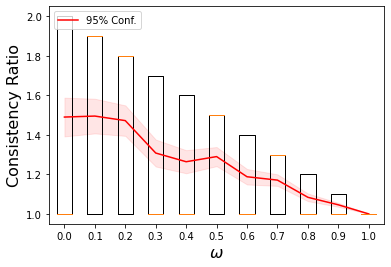

In [81]:
avg_ratio = np.mean(c_ratio, axis=1)
ci = 1.96 * np.std(c_ratio,axis=1)/np.sqrt(repeat)

plt.clf()
plt.xlabel("$\omega$", fontsize=16)
plt.ylabel("Consistency Ratio", fontsize=16)

plt.boxplot(c_ratio.transpose());
positions = np.arange(1, len(w_list)+1)

plt.plot(positions, avg_ratio, label="95% Conf.", color='r')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)


formated_list = ['%.1f' % elem for elem in w_list ]
plt.xticks(positions, formated_list);

plt.legend(loc='upper left')

### Time-deminishing Noisy Predictor 

In [122]:
reload(a); reload(i)
w_list = np.arange(0,1.1,.1)
repeat = 1000
c2_ratio = np.zeros((len(w_list), repeat))
for idx,w in enumerate(w_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50, time_dependant=True)
        alg = a.DPOA(ins, w)
        opt = a.OPT(ins)
        c2_ratio[idx, j] = alg/opt
        


<ipython-input-125-45fa195b9939>:9: RuntimeWarning: divide by zero encountered in double_scalars
  robust_ratio = [(2-w)/(1-w) for w in w_list]


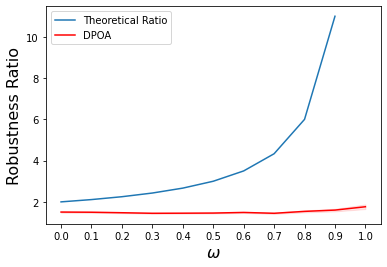

In [125]:
avg_ratio = np.mean(c2_ratio, axis=1)
ci = 1.96 * np.std(c2_ratio,axis=1)/np.sqrt(repeat)

plt.clf()
plt.xlabel("$\omega$", fontsize=16)
plt.ylabel("Robustness Ratio", fontsize=16)


robust_ratio = [(2-w)/(1-w) for w in w_list]
positions = np.arange(1, len(w_list)+1)

plt.plot(positions, robust_ratio, label= "Theoretical Ratio")
plt.plot(positions, avg_ratio, label="DPOA", color='r')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)


formated_list = ['%.1f' % elem for elem in w_list ]
plt.xticks(positions, formated_list);

plt.legend(loc='upper left')

### Time Invariant Predictor
$\sigma \in [0,2\times B]$ 

In [36]:
reload(a); reload(i)
w = 0.8
std_list = np.arange(0,100,10)
repeat = 1000
sol_ratio = np.zeros((len(std_list), repeat))
sol2_ratio = np.zeros((len(std_list), repeat))
for idx,std in enumerate(std_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50, predictor_std=std)
        alg = a.DPOA(ins, w)
        
        ins.predictor_std = ins.predictor_std * (ins.D/ins.T)
        alg2 = a.DPOA(ins, w)
        
        opt = a.OPT(ins)
        
        sol_ratio[idx, j] = alg/opt
        sol2_ratio[idx, j] = alg2/opt

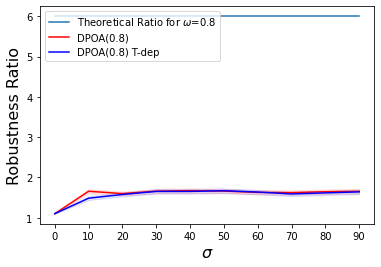

In [37]:
avg_ratio = np.mean(sol_ratio, axis=1)
ci = 1.96 * np.std(sol_ratio,axis=1)/np.sqrt(repeat)

avg2_ratio = np.mean(sol2_ratio, axis=1)
ci2 = 1.96 * np.std(sol2_ratio,axis=1)/np.sqrt(repeat)


plt.clf()
plt.xlabel("$\sigma$", fontsize=16)
plt.ylabel("Robustness Ratio", fontsize=16)

# plt.boxplot(r_ratio.transpose());
ratio_theory = (2-w)/ (1-w)
plt.plot([1, len(std_list)], [ratio_theory, ratio_theory], label = "Theoretical Ratio for $\omega$=%.1f"%w)
positions = np.arange(1, len(std_list)+1)


plt.plot(positions, avg_ratio, label="DPOA(%.1f)"%w, color='r')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)

plt.plot(positions, avg2_ratio, label="DPOA(%.1f) T-dep"%w, color='b')
plt.fill_between(positions, (avg2_ratio-ci2), (avg2_ratio+ci2), color='b', alpha=.1)

formated_list = [elem for elem in std_list ]
plt.xticks(positions, formated_list);
plt.legend(loc='upper left')


# Experiment 2: RPOA($\omega$)

In [82]:
reload(a); reload(i)
w_list = np.arange(0,1,.1)
repeat = 50
alg_reps = 50
c_ratio = np.zeros((len(w_list), repeat))
for idx,w in enumerate(w_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50)
        alg_total = 0
        for l in range(alg_reps):
            alg_total += a.RPOA(ins, w)
        opt = a.OPT(ins)
        alg_avg = alg_total/alg_reps
        c_ratio[idx, j] = alg_avg/opt

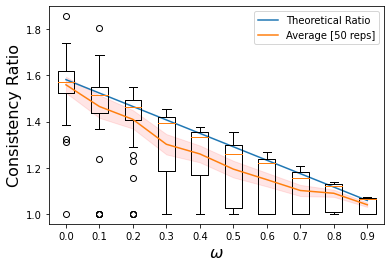

In [83]:
avg_ratio = np.mean(c_ratio, axis=1)
ci = 1.96 * np.std(c_ratio,axis=1)/np.sqrt(repeat)

plt.clf()
plt.xlabel("$\omega$", fontsize=16)
plt.ylabel("Consistency Ratio", fontsize=16)
plt.plot([1, 10], [(np.exp(1)-0)/(np.exp(1) - 1), (np.exp(1)-.9)/(np.exp(1) - 1)  ], label= "Theoretical Ratio")
plt.boxplot(c_ratio.transpose());
positions = np.arange(1, len(w_list)+1)
plt.plot(positions, avg_ratio, label = "Average [%d reps]"%alg_reps)
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)

formated_list = ['%.1f' % elem for elem in w_list ]
plt.xticks(positions, formated_list);
plt.legend()



### Time-deminishing predictor

In [118]:
w_list = np.arange(0,1,.1)
repeat = 50
alg_reps = 50
c_ratio = np.zeros((len(w_list), repeat))
for idx,w in enumerate(w_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50, time_dependant=True)
        alg_total = 0
        for l in range(alg_reps):
            alg_total += a.RPOA(ins, w)
        opt = a.OPT(ins)
        alg_avg = alg_total/alg_reps
        c_ratio[idx, j] = alg_avg/opt
        



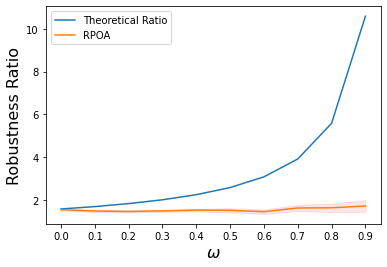

In [121]:
        
avg_ratio = np.mean(c_ratio, axis=1)
ci = 1.96 * np.std(c_ratio,axis=1)/np.sqrt(repeat)

plt.clf()
plt.xlabel("$\omega$", fontsize=16)
plt.ylabel("Robustness Ratio", fontsize=16)

robust_ratio = [(np.exp(1)-w)/((np.exp(1)-1)*(1-w)) for w in w_list]
positions = np.arange(1, len(w_list)+1)

plt.plot(positions, robust_ratio, label= "Theoretical Ratio")
plt.plot(positions, avg_ratio, label = "RPOA")
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)

formated_list = ['%.1f' % elem for elem in w_list ]
plt.xticks(positions, formated_list);
plt.legend()

### Time-invariant Noisy Predictor 
$\sigma \in [0,10, 2\times B]$ 

In [15]:
w = 0.3
std_list = np.arange(0,100,10)
repeat = 50
alg_reps = 1000
r_ratio = np.zeros((len(std_list), repeat))
for idx,std in enumerate(std_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50, predictor_std=std)
        alg_total = 0
        for l in range(alg_reps):
            alg_total += a.RPOA(ins, w)
        alg_avg = alg_total/alg_reps
        opt = a.OPT(ins)
        r_ratio[idx, j] = alg_avg/opt

[1.29640507 1.52270274 1.52714365 1.5763445  1.55262845 1.59056987
 1.66150531 1.60236463 1.53322645 1.55609905]
[0.04525667 0.07380414 0.05345063 0.05936001 0.0559097  0.06938443
 0.0637513  0.06060975 0.06260227 0.05142393]


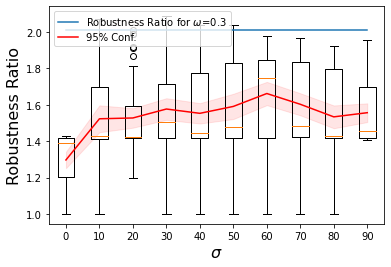

In [16]:
avg_ratio = np.mean(r_ratio, axis=1)
print(avg_ratio)
ci = 1.96 * np.std(r_ratio,axis=1)/np.sqrt(repeat)
print(ci)


plt.clf()
plt.xlabel("$\sigma$", fontsize=16)
plt.ylabel("Robustness Ratio", fontsize=16)

plt.boxplot(r_ratio.transpose());
ratio_theory = (np.exp(1)-w)/ ((np.exp(1)-1) * (1-w) )
plt.plot([1, 10], [ratio_theory, ratio_theory], label = "Robustness Ratio for $\omega$=%.1f"%w)
positions = np.arange(1, len(std_list)+1)

plt.plot(positions, avg_ratio, label="95% Conf.", color='r')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)


formated_list = [elem for elem in std_list ]
plt.xticks(positions, formated_list);
plt.legend(loc='upper left')

## Comparison: DPOA vs RLPA vs Google

In [296]:

w_list = np.linspace(0,.9999, 100)
std_list = np.arange(0,100,1)
repeat = 10000
B = 20


sol_ratio = np.zeros((len(w_list),len(std_list), repeat))
rand_ratio = np.zeros((len(w_list),len(std_list), repeat))
gsol_ratio = np.zeros((len(w_list),len(std_list), repeat))
grand_ratio = np.zeros((len(w_list),len(std_list), repeat))

t1 = time.time()
t_ = t1
for wid, w in enumerate(w_list):
    print("🔴 w = %-.2f   🕑 %4.2fs    +%-4.2fs"%(w, time.time()-t1, time.time()-t_))
    for idx,std in enumerate(std_list):
        print("std =", std)
        for j in np.arange(repeat):
            ins = i.Instance(B=B, predictor_std=std)
            opt = a.OPT(ins)
            
            sol = a.DPOA(ins, w)
            sol_ratio[wid,idx, j] = sol/opt 

            rand = a.RPOA(ins, w)
            rand_ratio[wid,idx, j] = rand/opt
            
            gsol = a_g.DPOA_google(ins, w)
            gsol_ratio[wid,idx, j] = gsol/opt 

            grand = a_g.RPOA_google(ins, w)
            grand_ratio[wid,idx, j] = grand/opt
            
           

🔴 w = 0.00   🕑 0.00s    +0.00s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
🔴 w = 0.01   🕑 283.05s    +283.05s
std = 0
std = 1
std = 2
std = 3
std = 4
std 

std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
🔴 w = 0.09   🕑 2498.69s    +2498.69s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
s

std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
🔴 w = 0.18   🕑 4827.83s    +4827.83s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
s

std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
🔴 w = 0.27   🕑 7010.99s    +7010.99s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
s

std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
🔴 w = 0.36   🕑 9047.78s    +9047.78s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
s

std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
🔴 w = 0.45   🕑 10936.30s    +10936.30s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17

std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
🔴 w = 0.54   🕑 12492.36s    +12492.36s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
🔴 w = 0.

std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
🔴 w = 0.63   🕑 14124.91s    +14124.91s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80

std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
🔴 w = 0.72   🕑 15615.02s    +15615.02s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60

std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
🔴 w = 0.81   🕑 16965.44s    +16965.44s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40

std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
🔴 w = 0.90   🕑 18216.09s    +18216.09s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20

std = 96
std = 97
std = 98
std = 99
🔴 w = 0.98   🕑 19393.38s    +19393.38s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
🔴 w = 0.99   🕑 19546.10s    +19546.

In [298]:
# np.savez("data/single-round-all", 
# w_list = w_list,
# std_list = std_list,
# repeat = repeat,
# B = B,
# sol_ratio = sol_ratio,
# rand_ratio = rand_ratio,
# gsol_ratio = gsol_ratio,
# grand_ratio = grand_ratio)

In [1]:
# sol_avg = sol_ratio.mean(axis=2)
# np.savetxt('data/dSPW-w-std.csv',sol_avg,delimiter=",")

# rand_avg = rand_ratio.mean(axis=2)
# np.savetxt('data/rSPW-w-std.csv',rand_avg,delimiter=",")

# gsol_avg = gsol_ratio.mean(axis=2)
# np.savetxt('data/dGoogle-w-std.csv',gsol_avg,delimiter=",")

# grand_avg = grand_ratio.mean(axis=2)
# np.savetxt('data/rGoogle-w-std.csv',grand_avg,delimiter=",")


In [38]:
# f = np.load("data/single-round-all.npz")
# f['std_list']


# Experiment 3: OLPA
For different values of $k$

In [228]:
reload(i); reload(a)
B = 20
epsilon = .05
std = 5
repeat = 50

theta = 2 * np.log(12 * (B/100)** 2 / epsilon)
K_bound = int(np.ceil(12 * (B/100)** 2 * theta / epsilon**2))

print("Theoretical bound: k >=", K_bound)

K = 500
k_list = np.arange(1,K+1, 1)
# k_list = np.linspace(5,K,10, dtype=int)



sol_vals = np.zeros((len(k_list), repeat))
solk_vals = np.zeros((len(k_list), repeat))
solkt_vals = np.zeros((len(k_list), repeat))
rand_vals = np.zeros((len(k_list), repeat))
randk_vals = np.zeros((len(k_list), repeat))
randkt_vals = np.zeros((len(k_list), repeat))

min_vals = np.zeros((len(k_list), repeat))

t1 = time.time()
t_ = t1
for idx,k in enumerate(k_list):
    print("🔴 k = %-7d 🕑 %-4.2fs      +%-4.2fs"%(k, time.time()-t1, time.time()-t_))
    t_ = time.time()
    for j in np.arange(repeat):
        m_ins = i.MultiInstance(K=k,B=B, normalize=True, predictor_std=std)  
        sol, min_R = a.OLPA(m_ins, W=10, e=epsilon)
        sol_vals[idx, j] = sol
        min_vals[idx, j] = min_R
        
        rand,_= a.OLPA(m_ins, W=10, e=epsilon, alg = a.RPOA)
        rand_vals[idx, j] = rand
        
        m_ins = i.MultiInstance(K=k,B=20, normalize=True, predictor_std=std, k_dependant=True) 
        solk,_ = a.OLPA(m_ins, W=10, e=epsilon)
        solk_vals[idx, j] = solk
        
        randk,_ = a.OLPA(m_ins, W=10, e=epsilon, alg=a.RPOA)
        randk_vals[idx, j] = randk

        m_ins.to_t_dependant()
        solkt,_ = a.OLPA(m_ins, W=10, e=epsilon)
        solkt_vals[idx, j] = solkt
        randkt,_ = a.OLPA(m_ins, W=10, e=epsilon, alg=a.RPOA)
        randkt_vals[idx, j] = randkt
        print(" ↳rep %2d: olpa = %1.2f olpa[k-dep] = %1.2f olpa[k+t dep] = %1.2f | rand = %1.2f k-dep. = %1.2f (k,t)-dep. = %1.2f | min = %1.2f "%(j, sol, solk, solkt, rand, randk, randkt, min_R))
    
print("Completed in %-4.2fs "%(time.time()-t1))

Theoretical bound: k >= 869
🔴 k = 1       🕑 0.00s      +0.00s
 ↳rep  0: olpa = 0.27 olpa[k-dep] = 0.36 olpa[k+t dep] = 0.38 | rand = 0.29 k-dep. = 0.29 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  1: olpa = 0.34 olpa[k-dep] = 0.38 olpa[k+t dep] = 0.40 | rand = 0.21 k-dep. = 0.30 (k,t)-dep. = 0.22 | min = 0.22 
 ↳rep  2: olpa = 0.38 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.36 | rand = 0.21 k-dep. = 0.20 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep  3: olpa = 0.38 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.34 | rand = 0.40 k-dep. = 0.29 (k,t)-dep. = 0.31 | min = 0.20 
 ↳rep  4: olpa = 0.34 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.20 | rand = 0.29 k-dep. = 0.33 (k,t)-dep. = 0.32 | min = 0.20 
 ↳rep  5: olpa = 0.40 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.20 | rand = 0.29 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep  6: olpa = 0.27 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.29 | rand = 0.30 k-dep. = 0.33 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  7: olpa = 0.20 olpa[k-dep] = 0.34 olpa[k+t dep] = 0.20 | rand = 0.20 k-dep. =

 ↳rep 37: olpa = 0.30 olpa[k-dep] = 0.21 olpa[k+t dep] = 0.19 | rand = 0.25 k-dep. = 0.15 (k,t)-dep. = 0.18 | min = 0.18 
 ↳rep 38: olpa = 0.27 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.12 | rand = 0.24 k-dep. = 0.16 (k,t)-dep. = 0.17 | min = 0.21 
 ↳rep 39: olpa = 0.25 olpa[k-dep] = 0.34 olpa[k+t dep] = 0.30 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.26 | min = 0.20 
 ↳rep 40: olpa = 0.27 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.14 | rand = 0.22 k-dep. = 0.24 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.33 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.34 | rand = 0.26 k-dep. = 0.27 (k,t)-dep. = 0.28 | min = 0.21 
 ↳rep 42: olpa = 0.22 olpa[k-dep] = 0.32 olpa[k+t dep] = 0.26 | rand = 0.28 k-dep. = 0.28 (k,t)-dep. = 0.28 | min = 0.20 
 ↳rep 43: olpa = 0.34 olpa[k-dep] = 0.38 olpa[k+t dep] = 0.30 | rand = 0.32 k-dep. = 0.25 (k,t)-dep. = 0.36 | min = 0.20 
 ↳rep 44: olpa = 0.28 olpa[k-dep] = 0.30 olpa[k+t dep] = 0.33 | rand = 0.22 k-dep. = 0.30 (k,t)-dep. = 0.29 | min = 0.20 
 ↳rep 45: olpa = 0.24 ol

 ↳rep 10: olpa = 0.33 olpa[k-dep] = 0.16 olpa[k+t dep] = 0.16 | rand = 0.28 k-dep. = 0.15 (k,t)-dep. = 0.17 | min = 0.20 
 ↳rep 11: olpa = 0.26 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.25 | rand = 0.17 k-dep. = 0.22 (k,t)-dep. = 0.25 | min = 0.16 
 ↳rep 12: olpa = 0.21 olpa[k-dep] = 0.31 olpa[k+t dep] = 0.37 | rand = 0.20 k-dep. = 0.24 (k,t)-dep. = 0.26 | min = 0.18 
 ↳rep 13: olpa = 0.31 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.29 | rand = 0.28 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 14: olpa = 0.30 olpa[k-dep] = 0.31 olpa[k+t dep] = 0.34 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.26 | min = 0.20 
 ↳rep 15: olpa = 0.26 olpa[k-dep] = 0.37 olpa[k+t dep] = 0.25 | rand = 0.27 k-dep. = 0.27 (k,t)-dep. = 0.27 | min = 0.20 
 ↳rep 16: olpa = 0.29 olpa[k-dep] = 0.32 olpa[k+t dep] = 0.30 | rand = 0.22 k-dep. = 0.27 (k,t)-dep. = 0.25 | min = 0.21 
 ↳rep 17: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.19 k-dep. = 0.28 (k,t)-dep. = 0.32 | min = 0.21 
 ↳rep 18: olpa = 0.28 ol

 ↳rep 29: olpa = 0.21 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.21 k-dep. = 0.22 (k,t)-dep. = 0.26 | min = 0.20 
 ↳rep 30: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.28 | rand = 0.26 k-dep. = 0.26 (k,t)-dep. = 0.26 | min = 0.21 
 ↳rep 31: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.32 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.19 
 ↳rep 32: olpa = 0.23 olpa[k-dep] = 0.34 olpa[k+t dep] = 0.29 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.27 | min = 0.20 
 ↳rep 33: olpa = 0.29 olpa[k-dep] = 0.18 olpa[k+t dep] = 0.20 | rand = 0.22 k-dep. = 0.17 (k,t)-dep. = 0.16 | min = 0.20 
 ↳rep 34: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.20 (k,t)-dep. = 0.20 | min = 0.17 
 ↳rep 35: olpa = 0.29 olpa[k-dep] = 0.20 olpa[k+t dep] = 0.17 | rand = 0.24 k-dep. = 0.16 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 36: olpa = 0.26 olpa[k-dep] = 0.32 olpa[k+t dep] = 0.29 | rand = 0.22 k-dep. = 0.25 (k,t)-dep. = 0.29 | min = 0.18 
 ↳rep 37: olpa = 0.31 ol

 ↳rep 48: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.20 k-dep. = 0.22 (k,t)-dep. = 0.19 | min = 0.20 
 ↳rep 49: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.21 
🔴 k = 7       🕑 5.24s      +1.48s
 ↳rep  0: olpa = 0.21 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.27 k-dep. = 0.19 (k,t)-dep. = 0.19 | min = 0.17 
 ↳rep  1: olpa = 0.23 olpa[k-dep] = 0.31 olpa[k+t dep] = 0.28 | rand = 0.18 k-dep. = 0.24 (k,t)-dep. = 0.29 | min = 0.16 
 ↳rep  2: olpa = 0.20 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.21 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.18 
 ↳rep  3: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  4: olpa = 0.30 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.26 | rand = 0.20 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.18 
 ↳rep  5: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.19 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | mi

 ↳rep 16: olpa = 0.29 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.19 | min = 0.20 
 ↳rep 17: olpa = 0.27 olpa[k-dep] = 0.30 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 18: olpa = 0.28 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 19: olpa = 0.34 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.16 (k,t)-dep. = 0.18 | min = 0.21 
 ↳rep 20: olpa = 0.23 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.24 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.17 
 ↳rep 21: olpa = 0.33 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.27 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 22: olpa = 0.28 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.30 | rand = 0.21 k-dep. = 0.27 (k,t)-dep. = 0.28 | min = 0.18 
 ↳rep 23: olpa = 0.26 olpa[k-dep] = 0.19 olpa[k+t dep] = 0.22 | rand = 0.25 k-dep. = 0.20 (k,t)-dep. = 0.18 | min = 0.20 
 ↳rep 24: olpa = 0.32 ol

 ↳rep 36: olpa = 0.28 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.33 | rand = 0.26 k-dep. = 0.32 (k,t)-dep. = 0.28 | min = 0.20 
 ↳rep 37: olpa = 0.31 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.21 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 38: olpa = 0.29 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.23 | rand = 0.28 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 39: olpa = 0.32 olpa[k-dep] = 0.32 olpa[k+t dep] = 0.29 | rand = 0.27 k-dep. = 0.26 (k,t)-dep. = 0.26 | min = 0.20 
 ↳rep 40: olpa = 0.27 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.19 | min = 0.18 
 ↳rep 41: olpa = 0.31 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.25 | rand = 0.22 k-dep. = 0.26 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.31 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 43: olpa = 0.26 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.27 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 44: olpa = 0.27 ol

 ↳rep  5: olpa = 0.32 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep  6: olpa = 0.30 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.23 | rand = 0.26 k-dep. = 0.20 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  7: olpa = 0.32 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.26 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep  8: olpa = 0.30 olpa[k-dep] = 0.33 olpa[k+t dep] = 0.29 | rand = 0.29 k-dep. = 0.25 (k,t)-dep. = 0.29 | min = 0.21 
 ↳rep  9: olpa = 0.26 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.30 | rand = 0.22 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.16 
 ↳rep 10: olpa = 0.28 olpa[k-dep] = 0.21 olpa[k+t dep] = 0.24 | rand = 0.26 k-dep. = 0.16 (k,t)-dep. = 0.18 | min = 0.20 
 ↳rep 11: olpa = 0.31 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.27 | rand = 0.28 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 12: olpa = 0.29 olpa[k-dep] = 0.20 olpa[k+t dep] = 0.20 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.18 | min = 0.21 
 ↳rep 13: olpa = 0.29 ol

 ↳rep 24: olpa = 0.27 olpa[k-dep] = 0.30 olpa[k+t dep] = 0.27 | rand = 0.22 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 25: olpa = 0.29 olpa[k-dep] = 0.33 olpa[k+t dep] = 0.26 | rand = 0.28 k-dep. = 0.25 (k,t)-dep. = 0.27 | min = 0.21 
 ↳rep 26: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.27 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.21 
 ↳rep 27: olpa = 0.25 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.26 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 28: olpa = 0.29 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.27 | rand = 0.28 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 29: olpa = 0.27 olpa[k-dep] = 0.31 olpa[k+t dep] = 0.32 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.18 
 ↳rep 30: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.20 | min = 0.19 
 ↳rep 31: olpa = 0.25 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.29 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 32: olpa = 0.23 ol

 ↳rep 42: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.28 | rand = 0.23 k-dep. = 0.26 (k,t)-dep. = 0.28 | min = 0.18 
 ↳rep 43: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.19 
 ↳rep 44: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 45: olpa = 0.29 olpa[k-dep] = 0.34 olpa[k+t dep] = 0.30 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 46: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.29 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.27 | min = 0.19 
 ↳rep 47: olpa = 0.26 olpa[k-dep] = 0.30 olpa[k+t dep] = 0.30 | rand = 0.21 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.21 
 ↳rep 48: olpa = 0.29 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.28 | rand = 0.26 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 49: olpa = 0.19 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.22 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
🔴 k = 14      🕑 22.25s  

 ↳rep 11: olpa = 0.22 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.23 | rand = 0.20 k-dep. = 0.27 (k,t)-dep. = 0.23 | min = 0.17 
 ↳rep 12: olpa = 0.30 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.29 | rand = 0.27 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 13: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.19 | min = 0.19 
 ↳rep 14: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 15: olpa = 0.30 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.28 | rand = 0.27 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 16: olpa = 0.25 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 17: olpa = 0.29 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.21 | rand = 0.27 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.19 
 ↳rep 18: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.26 | min = 0.21 
 ↳rep 19: olpa = 0.28 ol

 ↳rep 30: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 31: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.18 
 ↳rep 32: olpa = 0.24 olpa[k-dep] = 0.30 olpa[k+t dep] = 0.30 | rand = 0.21 k-dep. = 0.27 (k,t)-dep. = 0.26 | min = 0.19 
 ↳rep 33: olpa = 0.23 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.29 | rand = 0.23 k-dep. = 0.26 (k,t)-dep. = 0.25 | min = 0.17 
 ↳rep 34: olpa = 0.25 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.25 | rand = 0.27 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.22 
 ↳rep 35: olpa = 0.30 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.29 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 36: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.29 | rand = 0.27 k-dep. = 0.27 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 37: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.26 | min = 0.20 
 ↳rep 38: olpa = 0.25 ol

 ↳rep 49: olpa = 0.30 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.28 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
🔴 k = 18      🕑 37.75s      +4.18s
 ↳rep  0: olpa = 0.27 olpa[k-dep] = 0.30 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep  1: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep  2: olpa = 0.29 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.29 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  3: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.29 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.19 
 ↳rep  4: olpa = 0.27 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep  5: olpa = 0.29 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep  6: olpa = 0.27 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | m

 ↳rep 18: olpa = 0.29 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.27 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 19: olpa = 0.24 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.28 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 20: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.19 
 ↳rep 21: olpa = 0.25 olpa[k-dep] = 0.30 olpa[k+t dep] = 0.29 | rand = 0.25 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 22: olpa = 0.26 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 23: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 24: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.19 
 ↳rep 25: olpa = 0.23 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.22 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.18 
 ↳rep 26: olpa = 0.24 ol

 ↳rep 36: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.21 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.21 
 ↳rep 37: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.24 | rand = 0.22 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 38: olpa = 0.28 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.26 | min = 0.20 
 ↳rep 39: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 40: olpa = 0.29 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.21 | min = 0.21 
 ↳rep 41: olpa = 0.30 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 42: olpa = 0.30 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep 43: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.27 (k,t)-dep. = 0.24 | min = 0.19 
 ↳rep 44: olpa = 0.20 ol

 ↳rep  4: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.22 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  5: olpa = 0.27 olpa[k-dep] = 0.31 olpa[k+t dep] = 0.29 | rand = 0.27 k-dep. = 0.27 (k,t)-dep. = 0.26 | min = 0.19 
 ↳rep  6: olpa = 0.23 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.24 | rand = 0.22 k-dep. = 0.24 (k,t)-dep. = 0.25 | min = 0.19 
 ↳rep  7: olpa = 0.28 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.21 (k,t)-dep. = 0.19 | min = 0.20 
 ↳rep  8: olpa = 0.30 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  9: olpa = 0.24 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.28 | rand = 0.21 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 10: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 11: olpa = 0.22 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.18 
 ↳rep 12: olpa = 0.28 ol

 ↳rep 22: olpa = 0.23 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.19 
 ↳rep 23: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep 24: olpa = 0.30 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.26 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 25: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.26 k-dep. = 0.21 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 26: olpa = 0.30 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 27: olpa = 0.26 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.29 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.26 | min = 0.20 
 ↳rep 28: olpa = 0.27 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 29: olpa = 0.29 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 30: olpa = 0.28 ol

 ↳rep 40: olpa = 0.30 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep 41: olpa = 0.30 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 42: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 43: olpa = 0.25 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.28 | rand = 0.23 k-dep. = 0.26 (k,t)-dep. = 0.26 | min = 0.20 
 ↳rep 44: olpa = 0.30 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.21 | min = 0.21 
 ↳rep 45: olpa = 0.25 olpa[k-dep] = 0.31 olpa[k+t dep] = 0.26 | rand = 0.22 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.21 
 ↳rep 46: olpa = 0.29 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.30 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep 47: olpa = 0.24 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.21 k-dep. = 0.24 (k,t)-dep. = 0.25 | min = 0.18 
 ↳rep 48: olpa = 0.27 ol

 ↳rep  8: olpa = 0.30 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.27 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  9: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 10: olpa = 0.28 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.19 
 ↳rep 11: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.21 | min = 0.21 
 ↳rep 12: olpa = 0.27 olpa[k-dep] = 0.31 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.27 (k,t)-dep. = 0.25 | min = 0.21 
 ↳rep 13: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep 14: olpa = 0.32 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 15: olpa = 0.27 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.29 | rand = 0.25 k-dep. = 0.28 (k,t)-dep. = 0.25 | min = 0.21 
 ↳rep 16: olpa = 0.29 ol

 ↳rep 26: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.26 | min = 0.20 
 ↳rep 27: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.19 
 ↳rep 28: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.25 | min = 0.21 
 ↳rep 29: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 30: olpa = 0.30 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.23 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 31: olpa = 0.31 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 32: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 33: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 34: olpa = 0.28 ol

 ↳rep 44: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.21 
 ↳rep 45: olpa = 0.28 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.26 | min = 0.20 
 ↳rep 46: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 47: olpa = 0.30 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 48: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.27 (k,t)-dep. = 0.21 | min = 0.21 
 ↳rep 49: olpa = 0.30 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.28 | rand = 0.27 k-dep. = 0.26 (k,t)-dep. = 0.26 | min = 0.21 
🔴 k = 29      🕑 99.77s      +6.68s
 ↳rep  0: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  1: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.21 (k,t)-dep. = 0.22 | m

 ↳rep 12: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 13: olpa = 0.26 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.26 (k,t)-dep. = 0.26 | min = 0.20 
 ↳rep 14: olpa = 0.28 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.29 | rand = 0.23 k-dep. = 0.27 (k,t)-dep. = 0.27 | min = 0.20 
 ↳rep 15: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 16: olpa = 0.24 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.25 | min = 0.21 
 ↳rep 17: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 18: olpa = 0.29 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 19: olpa = 0.29 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.26 k-dep. = 0.20 (k,t)-dep. = 0.20 | min = 0.21 
 ↳rep 20: olpa = 0.32 ol

 ↳rep 30: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 31: olpa = 0.25 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 32: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 33: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 34: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 35: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 36: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 37: olpa = 0.29 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.21 
 ↳rep 38: olpa = 0.26 ol

 ↳rep 48: olpa = 0.28 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.29 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.25 | min = 0.21 
 ↳rep 49: olpa = 0.29 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.19 
🔴 k = 33      🕑 129.19s      +7.81s
 ↳rep  0: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep  1: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  2: olpa = 0.31 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep  3: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  4: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep  5: olpa = 0.29 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.25 | 

 ↳rep 16: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 17: olpa = 0.28 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep 18: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.27 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 19: olpa = 0.25 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 20: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.21 
 ↳rep 21: olpa = 0.28 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 22: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 23: olpa = 0.28 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.27 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 24: olpa = 0.28 ol

 ↳rep 34: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.21 k-dep. = 0.23 (k,t)-dep. = 0.25 | min = 0.19 
 ↳rep 35: olpa = 0.29 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 36: olpa = 0.26 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.26 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 37: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.19 
 ↳rep 38: olpa = 0.27 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 39: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.19 
 ↳rep 40: olpa = 0.28 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 41: olpa = 0.27 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 42: olpa = 0.26 ol

 ↳rep  1: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep  2: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  3: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  4: olpa = 0.29 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  5: olpa = 0.29 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.21 
 ↳rep  6: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  7: olpa = 0.29 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  8: olpa = 0.27 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  9: olpa = 0.26 ol

 ↳rep 19: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.21 
 ↳rep 20: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 21: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 22: olpa = 0.28 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 23: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.28 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep 24: olpa = 0.29 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 25: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 26: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 27: olpa = 0.25 ol

 ↳rep 37: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.19 
 ↳rep 38: olpa = 0.28 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.21 
 ↳rep 39: olpa = 0.29 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 40: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 41: olpa = 0.29 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.29 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 42: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.19 
 ↳rep 43: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 44: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.26 | min = 0.21 
 ↳rep 45: olpa = 0.28 ol

 ↳rep  5: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.21 | min = 0.21 
 ↳rep  6: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.26 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep  7: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep  8: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  9: olpa = 0.30 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 10: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.22 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 11: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep 12: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 13: olpa = 0.28 ol

 ↳rep 22: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep 23: olpa = 0.25 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.19 
 ↳rep 24: olpa = 0.26 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.19 
 ↳rep 25: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.19 
 ↳rep 26: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 27: olpa = 0.24 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.28 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 28: olpa = 0.24 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.22 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.19 
 ↳rep 29: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 30: olpa = 0.25 ol

 ↳rep 39: olpa = 0.28 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 40: olpa = 0.27 olpa[k-dep] = 0.30 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 41: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.24 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 43: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 44: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep 45: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.21 | min = 0.21 
 ↳rep 46: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 47: olpa = 0.29 ol

 ↳rep  6: olpa = 0.28 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  7: olpa = 0.28 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  8: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep  9: olpa = 0.28 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.26 (k,t)-dep. = 0.26 | min = 0.20 
 ↳rep 10: olpa = 0.26 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 11: olpa = 0.24 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.28 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.19 
 ↳rep 12: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 13: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 14: olpa = 0.29 ol

 ↳rep 23: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep 24: olpa = 0.29 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep 25: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 26: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 27: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.19 
 ↳rep 28: olpa = 0.29 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.29 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.25 | min = 0.21 
 ↳rep 29: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.25 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 30: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 31: olpa = 0.30 ol

 ↳rep 40: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 41: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 43: olpa = 0.25 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.28 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 44: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 45: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 46: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.19 
 ↳rep 47: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 48: olpa = 0.26 ol

 ↳rep  7: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep  8: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  9: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.19 
 ↳rep 10: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 11: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.19 
 ↳rep 12: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.19 
 ↳rep 13: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 14: olpa = 0.26 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.25 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 15: olpa = 0.28 ol

 ↳rep 24: olpa = 0.26 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.19 
 ↳rep 25: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 26: olpa = 0.28 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 27: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 28: olpa = 0.26 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 29: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 30: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.25 | min = 0.21 
 ↳rep 31: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 32: olpa = 0.26 ol

 ↳rep 41: olpa = 0.28 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.27 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 42: olpa = 0.29 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 43: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.25 | min = 0.19 
 ↳rep 44: olpa = 0.29 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.25 | min = 0.21 
 ↳rep 45: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 46: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 47: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 48: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 49: olpa = 0.25 ol

 ↳rep  8: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep  9: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 10: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.19 
 ↳rep 11: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.19 
 ↳rep 12: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 13: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 14: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 15: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.26 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 16: olpa = 0.25 ol

 ↳rep 25: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 26: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.19 
 ↳rep 27: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 28: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 29: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.19 
 ↳rep 30: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 31: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.21 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 32: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 33: olpa = 0.27 ol

 ↳rep 42: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.28 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 43: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 44: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep 45: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 46: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.19 
 ↳rep 47: olpa = 0.28 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 48: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 49: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.21 
🔴 k = 56      🕑 372.80s 

 ↳rep  9: olpa = 0.24 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.22 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.19 
 ↳rep 10: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 11: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 12: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.22 k-dep. = 0.24 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 13: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep 14: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 15: olpa = 0.24 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 16: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 17: olpa = 0.25 ol

 ↳rep 26: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 27: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.28 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 28: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 29: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.26 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 30: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 31: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 32: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 33: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 34: olpa = 0.27 ol

 ↳rep 43: olpa = 0.26 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.19 
 ↳rep 44: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 45: olpa = 0.26 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.19 
 ↳rep 46: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 47: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 48: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.21 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 49: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.19 
🔴 k = 60      🕑 429.40s      +14.47s
 ↳rep  0: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.24 |

 ↳rep 10: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 11: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 12: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 13: olpa = 0.26 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 14: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.22 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 15: olpa = 0.24 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 16: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 17: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 18: olpa = 0.28 ol

 ↳rep 27: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 28: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 29: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 30: olpa = 0.24 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 31: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 32: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 33: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 34: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 35: olpa = 0.26 ol

 ↳rep 44: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 45: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.19 
 ↳rep 46: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 47: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 48: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 49: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
🔴 k = 64      🕑 489.10s      +15.14s
 ↳rep  0: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  1: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 |

 ↳rep 11: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 12: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 13: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.21 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 14: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.26 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 15: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 16: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 17: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 18: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 19: olpa = 0.25 ol

 ↳rep 28: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 29: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 30: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 31: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 32: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 33: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 35: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 36: olpa = 0.25 ol

 ↳rep 45: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 46: olpa = 0.29 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 47: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 48: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 49: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.20 
🔴 k = 68      🕑 552.35s      +15.99s
 ↳rep  0: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  1: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  2: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 |

 ↳rep 12: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep 13: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 14: olpa = 0.28 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 15: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.28 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.19 
 ↳rep 16: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 17: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 18: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.19 
 ↳rep 19: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.27 ol

 ↳rep 29: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.22 | min = 0.19 
 ↳rep 30: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 31: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 32: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 33: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 34: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 35: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 36: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 37: olpa = 0.26 ol

 ↳rep 46: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 47: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 48: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 49: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
🔴 k = 72      🕑 619.44s      +16.66s
 ↳rep  0: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  1: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  2: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  3: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.21 |

 ↳rep 13: olpa = 0.24 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.19 
 ↳rep 14: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 15: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 16: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 17: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 18: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 19: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 20: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 21: olpa = 0.26 ol

 ↳rep 30: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 31: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 32: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 33: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 34: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.21 | min = 0.21 
 ↳rep 35: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 36: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 37: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 38: olpa = 0.26 ol

 ↳rep 47: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 48: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 49: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
🔴 k = 76      🕑 689.11s      +17.72s
 ↳rep  0: olpa = 0.26 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.21 
 ↳rep  1: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  2: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  3: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  4: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 |

 ↳rep 14: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 15: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 16: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 17: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 18: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 19: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep 20: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 21: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 22: olpa = 0.26 ol

 ↳rep 31: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.19 
 ↳rep 32: olpa = 0.28 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 33: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 34: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 35: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 36: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.19 
 ↳rep 37: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 38: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 39: olpa = 0.24 ol

 ↳rep 48: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 49: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
🔴 k = 80      🕑 762.74s      +18.70s
 ↳rep  0: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.19 
 ↳rep  1: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  2: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.26 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  3: olpa = 0.24 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  4: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  5: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 |

 ↳rep 15: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 16: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 17: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 18: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.19 
 ↳rep 19: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 20: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 21: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 22: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 23: olpa = 0.26 ol

 ↳rep 32: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 33: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 35: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 36: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 37: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.19 
 ↳rep 38: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 39: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep 40: olpa = 0.27 ol

 ↳rep 49: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.19 
🔴 k = 84      🕑 840.41s      +19.93s
 ↳rep  0: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  1: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  2: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep  3: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  4: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  5: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  6: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 |

 ↳rep 16: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 17: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 18: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 19: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 20: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 21: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 22: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 23: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 24: olpa = 0.26 ol

 ↳rep 33: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 35: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 36: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 37: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 38: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 39: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 40: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 41: olpa = 0.26 ol

 ↳rep  0: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  1: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  2: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  3: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  4: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  5: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  6: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  7: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  8: olpa = 0.27 ol

 ↳rep 17: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 18: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 19: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 20: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 21: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 22: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 23: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 24: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 25: olpa = 0.27 ol

 ↳rep 34: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 35: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.19 
 ↳rep 36: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 37: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.19 
 ↳rep 38: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 39: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 40: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 41: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 42: olpa = 0.26 ol

 ↳rep  1: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  2: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  3: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  4: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep  5: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  6: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  7: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  8: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  9: olpa = 0.27 ol

 ↳rep 18: olpa = 0.24 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 19: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep 20: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 21: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 22: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 23: olpa = 0.26 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 24: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 25: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 26: olpa = 0.27 ol

 ↳rep 35: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 36: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 37: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 38: olpa = 0.26 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 39: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 40: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 41: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 42: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 43: olpa = 0.24 ol

 ↳rep  2: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  3: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  4: olpa = 0.26 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  5: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  6: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  7: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.19 
 ↳rep  8: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep  9: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 10: olpa = 0.26 ol

 ↳rep 19: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 20: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 21: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep 23: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 24: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 25: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 26: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 27: olpa = 0.25 ol

 ↳rep 36: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 37: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 38: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 39: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 40: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 41: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 42: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 43: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.19 
 ↳rep 44: olpa = 0.26 ol

 ↳rep  3: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.19 
 ↳rep  4: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  5: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  6: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  7: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  8: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  9: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 10: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.22 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.19 
 ↳rep 11: olpa = 0.25 ol

 ↳rep 20: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 21: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 22: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 23: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.19 
 ↳rep 24: olpa = 0.24 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 25: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 26: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 27: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 28: olpa = 0.26 ol

 ↳rep 37: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.19 
 ↳rep 38: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 39: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 40: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 41: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 42: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 44: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 45: olpa = 0.27 ol

 ↳rep  4: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  5: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  6: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.19 
 ↳rep  7: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep  8: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  9: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 10: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 11: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 12: olpa = 0.26 ol

 ↳rep 21: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 22: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 23: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 24: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.19 
 ↳rep 25: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.19 
 ↳rep 26: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 27: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.19 
 ↳rep 28: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 29: olpa = 0.26 ol

 ↳rep 38: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 39: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 40: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 41: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 42: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.21 
 ↳rep 43: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 44: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 45: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 46: olpa = 0.26 ol

 ↳rep  5: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep  6: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  7: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  8: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  9: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 10: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 11: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 12: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 13: olpa = 0.27 ol

 ↳rep 22: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 23: olpa = 0.24 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 24: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 25: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 26: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 27: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.26 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 28: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 29: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 30: olpa = 0.25 ol

 ↳rep 39: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 40: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 41: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 43: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 44: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 45: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 46: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 47: olpa = 0.26 ol

 ↳rep  6: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  7: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  8: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  9: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 10: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.19 
 ↳rep 11: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 12: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 13: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 14: olpa = 0.25 ol

 ↳rep 23: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 24: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 25: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.21 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 26: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 27: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 28: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 29: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 30: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 31: olpa = 0.26 ol

 ↳rep 40: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 41: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.19 
 ↳rep 43: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 44: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 45: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 46: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 47: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 48: olpa = 0.26 ol

 ↳rep  7: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  8: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  9: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 10: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 11: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 12: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 13: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 14: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 15: olpa = 0.26 ol

 ↳rep 24: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 25: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 ↳rep 26: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 27: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 28: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 29: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 30: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 31: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 32: olpa = 0.27 ol

 ↳rep 41: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 42: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 43: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 44: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 45: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 46: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 47: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 48: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 49: olpa = 0.24 ol

 ↳rep  8: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  9: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 10: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 11: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 12: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 13: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 14: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 15: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 16: olpa = 0.27 ol

 ↳rep 25: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 26: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 27: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 28: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 29: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 30: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.19 
 ↳rep 31: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 32: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 33: olpa = 0.26 ol

 ↳rep 42: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 43: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 44: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 45: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 46: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 47: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 48: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.19 
 ↳rep 49: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
🔴 k = 123     🕑 1805.07s

 ↳rep  9: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 10: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 11: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 12: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 13: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 14: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 15: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 16: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 17: olpa = 0.26 ol

 ↳rep 26: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 27: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 28: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 29: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 30: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 31: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 32: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 33: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.26 ol

 ↳rep 43: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 44: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 45: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 46: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 47: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 48: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 49: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
🔴 k = 127     🕑 1922.96s      +29.80s
 ↳rep  0: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 

 ↳rep 10: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 11: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 12: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 13: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 14: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 15: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 16: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 17: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 18: olpa = 0.25 ol

 ↳rep 27: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 28: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 29: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 30: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 31: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 32: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 33: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 34: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 35: olpa = 0.25 ol

 ↳rep 44: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 45: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 46: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 47: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 48: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 49: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
🔴 k = 131     🕑 2046.27s      +31.06s
 ↳rep  0: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  1: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 

 ↳rep 11: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 12: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 13: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 14: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 15: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 16: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 17: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 18: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 19: olpa = 0.26 ol

 ↳rep 28: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 29: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 30: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 31: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 32: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 33: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 34: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 35: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 36: olpa = 0.27 ol

 ↳rep 45: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 46: olpa = 0.24 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 47: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 48: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 49: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
🔴 k = 135     🕑 2173.08s      +32.06s
 ↳rep  0: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  1: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  2: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 

 ↳rep 12: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 13: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 14: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 15: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 16: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 17: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 18: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 19: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 20: olpa = 0.26 ol

 ↳rep 29: olpa = 0.24 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 30: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 31: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 32: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 33: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 35: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 36: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 37: olpa = 0.25 ol

 ↳rep 46: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 47: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 48: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 49: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
🔴 k = 139     🕑 2302.92s      +32.51s
 ↳rep  0: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  1: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  2: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  3: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 

 ↳rep 13: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 14: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 15: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 16: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 17: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 18: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 19: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 20: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 21: olpa = 0.25 ol

 ↳rep 30: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 31: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 32: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 33: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 34: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 35: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 36: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 37: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 38: olpa = 0.26 ol

 ↳rep 47: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 48: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 49: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
🔴 k = 143     🕑 2436.66s      +33.95s
 ↳rep  0: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  1: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  2: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  3: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  4: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 

 ↳rep 14: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 15: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 16: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 17: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 18: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 19: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 20: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 21: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 22: olpa = 0.25 ol

 ↳rep 31: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 32: olpa = 0.24 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 33: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 34: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 35: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 36: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 37: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 38: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 39: olpa = 0.26 ol

 ↳rep 48: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 49: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
🔴 k = 147     🕑 2574.65s      +35.16s
 ↳rep  0: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  1: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  2: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  3: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep  4: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  5: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 

 ↳rep 15: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 16: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 17: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 18: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 19: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 20: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 21: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 22: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 23: olpa = 0.25 ol

 ↳rep 32: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 33: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 34: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 35: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 36: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 37: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 38: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 40: olpa = 0.26 ol

 ↳rep 49: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
🔴 k = 151     🕑 2717.22s      +35.82s
 ↳rep  0: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  1: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  2: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  4: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  5: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  6: olpa = 0.24 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 

 ↳rep 16: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 17: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 18: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 20: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 21: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 22: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 23: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 24: olpa = 0.26 ol

 ↳rep 33: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 34: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 35: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 36: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 37: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 38: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 39: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 40: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 41: olpa = 0.25 ol

 ↳rep  0: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  1: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  2: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  4: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  5: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  6: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  7: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep  8: olpa = 0.25 ol

 ↳rep 17: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 18: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 19: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 20: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 21: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 22: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 23: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 24: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 25: olpa = 0.26 ol

 ↳rep 34: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 35: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 36: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 37: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 38: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 39: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 40: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 41: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.25 ol

 ↳rep  1: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  2: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  3: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  4: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  5: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  6: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  7: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  8: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  9: olpa = 0.26 ol

 ↳rep 18: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 19: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 21: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 22: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 23: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 24: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 25: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 26: olpa = 0.26 ol

 ↳rep 35: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 36: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 37: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 38: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 39: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 40: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 41: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.26 ol

 ↳rep  2: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  3: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  4: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  5: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  6: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep  7: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  8: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  9: olpa = 0.26 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 10: olpa = 0.26 ol

 ↳rep 19: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 20: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 21: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 22: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 23: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 24: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 25: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 26: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 27: olpa = 0.24 ol

 ↳rep 36: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 37: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.19 
 ↳rep 38: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 39: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 40: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 41: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 44: olpa = 0.25 ol

 ↳rep  3: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  4: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  5: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  6: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  7: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  8: olpa = 0.26 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  9: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 10: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 11: olpa = 0.26 ol

 ↳rep 20: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 21: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 22: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 23: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 24: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 25: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 26: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 27: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 28: olpa = 0.25 ol

 ↳rep 37: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 38: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 39: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.19 
 ↳rep 40: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 42: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 44: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 45: olpa = 0.25 ol

 ↳rep  4: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  5: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  6: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  7: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  8: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  9: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 10: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 11: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 12: olpa = 0.25 ol

 ↳rep 21: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 22: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 23: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 24: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 25: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 26: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 27: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 28: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 29: olpa = 0.24 ol

 ↳rep 38: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 39: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 41: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 42: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 44: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 45: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 46: olpa = 0.24 ol

 ↳rep  5: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  6: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  7: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  8: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  9: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 10: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 11: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 12: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 13: olpa = 0.25 ol

 ↳rep 22: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 23: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 24: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 25: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 26: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 27: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 28: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 29: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 30: olpa = 0.25 ol

 ↳rep 39: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 40: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 41: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 43: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 44: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 45: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 46: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 47: olpa = 0.25 ol

 ↳rep  6: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  7: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.19 
 ↳rep  8: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  9: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 10: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 11: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 12: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 13: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 14: olpa = 0.25 ol

 ↳rep 23: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 24: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 25: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 26: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 27: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 28: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 29: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 30: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 31: olpa = 0.25 ol

 ↳rep 40: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 41: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 42: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 44: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 45: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 46: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 47: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 48: olpa = 0.25 ol

 ↳rep  7: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  8: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  9: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 10: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 11: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 12: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 13: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 14: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 15: olpa = 0.25 ol

 ↳rep 24: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 25: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 26: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 27: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 28: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 29: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 30: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 31: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 32: olpa = 0.25 ol

 ↳rep 41: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 43: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 44: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 45: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 46: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 47: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 48: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.19 
 ↳rep 49: olpa = 0.25 ol

 ↳rep  8: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  9: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 10: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 11: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 12: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 13: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 14: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 15: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 16: olpa = 0.24 ol

 ↳rep 25: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 26: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 27: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 28: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 29: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.22 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 30: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 31: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 32: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 33: olpa = 0.25 ol

 ↳rep 42: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 44: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 45: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 46: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 47: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 48: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 49: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
🔴 k = 190     🕑 4325.53s

 ↳rep  9: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 10: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 11: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 12: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 13: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 14: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 15: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 16: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 17: olpa = 0.25 ol

 ↳rep 26: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 27: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 28: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 29: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 30: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 31: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 ↳rep 32: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 33: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.25 ol

 ↳rep 43: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 44: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 45: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 46: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 47: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 48: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 49: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
🔴 k = 194     🕑 4506.30s      +45.07s
 ↳rep  0: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 

 ↳rep 10: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 11: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 12: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 13: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 14: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 15: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 16: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 17: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 18: olpa = 0.25 ol

 ↳rep 27: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 28: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 29: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 30: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 31: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 32: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 33: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 34: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 35: olpa = 0.26 ol

 ↳rep 44: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 45: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 46: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 47: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 48: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 49: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
🔴 k = 198     🕑 4689.66s      +46.22s
 ↳rep  0: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  1: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 

 ↳rep 11: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 12: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 13: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 14: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 15: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 16: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 17: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 18: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 19: olpa = 0.24 ol

 ↳rep 28: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 29: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 30: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 31: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 32: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.19 
 ↳rep 33: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 35: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 36: olpa = 0.25 ol

 ↳rep 45: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 46: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 47: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 48: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 49: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
🔴 k = 202     🕑 4876.92s      +47.32s
 ↳rep  0: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  1: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  2: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 

 ↳rep 12: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 13: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 ↳rep 14: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 15: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 16: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 17: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 18: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 19: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 20: olpa = 0.25 ol

 ↳rep 29: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 30: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 31: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 32: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 33: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 34: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 35: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 36: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 37: olpa = 0.24 ol

 ↳rep 46: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 47: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 48: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 49: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
🔴 k = 206     🕑 5068.48s      +47.94s
 ↳rep  0: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  1: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  2: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 

 ↳rep 13: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 14: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 15: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 16: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 17: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 18: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 19: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 20: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 21: olpa = 0.25 ol

 ↳rep 30: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 31: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 32: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 33: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 34: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 35: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 36: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 37: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 38: olpa = 0.26 ol

 ↳rep 47: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 48: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 49: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
🔴 k = 210     🕑 5263.13s      +49.08s
 ↳rep  0: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  1: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  2: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  3: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  4: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 

 ↳rep 14: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 15: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 16: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 17: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 18: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 19: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 20: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 21: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 22: olpa = 0.25 ol

 ↳rep 31: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 32: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 33: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 35: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.19 
 ↳rep 36: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 37: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 38: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 39: olpa = 0.25 ol

 ↳rep 48: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 49: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
🔴 k = 214     🕑 5460.29s      +49.52s
 ↳rep  0: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  1: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  2: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  3: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  4: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 

 ↳rep 15: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 16: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 17: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 18: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 19: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 21: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 22: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 23: olpa = 0.23 ol

 ↳rep 32: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 33: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 35: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 36: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 37: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.19 
 ↳rep 38: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 39: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 40: olpa = 0.24 ol

 ↳rep 49: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
🔴 k = 218     🕑 5661.12s      +50.64s
 ↳rep  0: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  1: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  2: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  3: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  4: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  5: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  6: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 

 ↳rep 16: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 17: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 18: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 19: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 20: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 21: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.19 
 ↳rep 22: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 23: olpa = 0.23 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 24: olpa = 0.24 ol

 ↳rep 33: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 35: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 36: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 37: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 38: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 39: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 40: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 41: olpa = 0.25 ol

 ↳rep  0: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  1: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  2: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  3: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  4: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  5: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  6: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  7: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  8: olpa = 0.25 ol

 ↳rep 17: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 18: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 19: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 20: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 21: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 22: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 23: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.21 
 ↳rep 24: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 25: olpa = 0.25 ol

 ↳rep 34: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 35: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 36: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 37: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 38: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 39: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 41: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.25 ol

 ↳rep  1: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  2: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  3: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  4: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  5: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  6: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  7: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  8: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  9: olpa = 0.24 ol

 ↳rep 18: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 19: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 20: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 21: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 22: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 23: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 24: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 25: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 26: olpa = 0.25 ol

 ↳rep 35: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 36: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 37: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 38: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 39: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 40: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 41: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.24 ol

 ↳rep  2: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  3: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  4: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  5: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  6: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  7: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  8: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  9: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 10: olpa = 0.25 ol

 ↳rep 19: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 20: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 21: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 22: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 23: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 24: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 25: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 26: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 27: olpa = 0.25 ol

 ↳rep 36: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 37: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 38: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 40: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 41: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 44: olpa = 0.25 ol

 ↳rep  3: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  4: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  5: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  6: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  7: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  8: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  9: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 10: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 11: olpa = 0.24 ol

 ↳rep 20: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 21: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 22: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 24: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 25: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 26: olpa = 0.25 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.21 
 ↳rep 27: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 28: olpa = 0.24 ol

 ↳rep 37: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 38: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 39: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 44: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 45: olpa = 0.24 ol

 ↳rep  4: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  5: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  6: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  7: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  8: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  9: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 10: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 11: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 12: olpa = 0.24 ol

 ↳rep 21: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 22: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.24 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 24: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 25: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 26: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 27: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 28: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 29: olpa = 0.24 ol

 ↳rep 38: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 39: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.19 
 ↳rep 41: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 44: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 45: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 46: olpa = 0.23 ol

 ↳rep  5: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  6: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  7: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  8: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  9: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 10: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 11: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 12: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 13: olpa = 0.24 ol

 ↳rep 22: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 23: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.22 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 24: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 25: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 26: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 27: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 28: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 29: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 30: olpa = 0.24 ol

 ↳rep 39: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 41: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 42: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 44: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 45: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 46: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 47: olpa = 0.23 ol

 ↳rep  6: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  7: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  8: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  9: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 10: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 11: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 12: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 13: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 14: olpa = 0.25 ol

 ↳rep 23: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 24: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 25: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 26: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 27: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 28: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 29: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 30: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.24 ol

 ↳rep 40: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 41: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 44: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 45: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 46: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 47: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 48: olpa = 0.24 ol

 ↳rep  7: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  8: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 10: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 11: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 12: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 14: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 15: olpa = 0.24 ol

 ↳rep 24: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 25: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 26: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 27: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 28: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 29: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 30: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 32: olpa = 0.25 ol

 ↳rep 41: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 42: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 44: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 45: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 46: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 47: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 48: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 49: olpa = 0.24 ol

 ↳rep  8: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep  9: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 10: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 11: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 12: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 14: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 15: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 16: olpa = 0.25 ol

 ↳rep 25: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 26: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 27: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 28: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 29: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 30: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 31: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 32: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 33: olpa = 0.24 ol

 ↳rep 42: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 44: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 45: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 46: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 47: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 48: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.21 
 ↳rep 49: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
🔴 k = 257     🕑 7807.48s

 ↳rep  9: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 10: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 11: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 12: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 14: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 15: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 16: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 17: olpa = 0.24 ol

 ↳rep 26: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 27: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 28: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 29: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 30: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 31: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 32: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 33: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.25 ol

 ↳rep 43: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 44: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 45: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 46: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 47: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 48: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 49: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
🔴 k = 261     🕑 8046.29s      +59.97s
 ↳rep  0: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 

 ↳rep 10: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 11: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 12: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 ↳rep 13: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 14: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 15: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 16: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 17: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 18: olpa = 0.24 ol

 ↳rep 27: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 28: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 29: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 30: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 31: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 32: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 33: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 35: olpa = 0.24 ol

 ↳rep 44: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 45: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 46: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 47: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 48: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 49: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
🔴 k = 265     🕑 8288.49s      +60.78s
 ↳rep  0: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  1: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 

 ↳rep 11: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 12: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 14: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 15: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 16: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 17: olpa = 0.25 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 18: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 19: olpa = 0.25 ol

 ↳rep 28: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 29: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 30: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 31: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 32: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 33: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 35: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 36: olpa = 0.25 ol

 ↳rep 45: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 46: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 47: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 48: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 49: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
🔴 k = 269     🕑 8534.55s      +62.18s
 ↳rep  0: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  1: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  2: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 

 ↳rep 12: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 14: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 15: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 16: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 17: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 18: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 20: olpa = 0.25 ol

 ↳rep 29: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 30: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 31: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 32: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 33: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 35: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 36: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 37: olpa = 0.24 ol

 ↳rep 46: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 47: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 48: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 49: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
🔴 k = 273     🕑 8784.53s      +63.00s
 ↳rep  0: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  1: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  2: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 

 ↳rep 13: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 14: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 15: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 16: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 17: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 18: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 19: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 20: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 21: olpa = 0.24 ol

 ↳rep 30: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 31: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 32: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 33: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 35: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 36: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 37: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 38: olpa = 0.24 ol

 ↳rep 47: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 48: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 49: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
🔴 k = 277     🕑 9039.26s      +64.27s
 ↳rep  0: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  1: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  2: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  4: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 

 ↳rep 14: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 15: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 16: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 17: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 18: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 19: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.24 ol

 ↳rep 31: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 32: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 33: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 34: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 35: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 36: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 37: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 38: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.23 ol

 ↳rep 48: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 49: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
🔴 k = 281     🕑 9298.96s      +65.41s
 ↳rep  0: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  1: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  2: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  3: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  4: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  5: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 

 ↳rep 15: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 16: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 17: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 18: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 20: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 21: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 22: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 23: olpa = 0.23 ol

 ↳rep 32: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 33: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 35: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 36: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.21 
 ↳rep 37: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 38: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 40: olpa = 0.24 ol

 ↳rep 49: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
🔴 k = 285     🕑 9563.21s      +67.02s
 ↳rep  0: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  1: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  2: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  3: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  4: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  5: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  6: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 

 ↳rep 16: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 17: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 18: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 23: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 24: olpa = 0.24 ol

 ↳rep 33: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 35: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 36: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 37: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 38: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 39: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 40: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 41: olpa = 0.23 ol

 ↳rep  0: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  1: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  2: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  3: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  4: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  6: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  7: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  8: olpa = 0.24 ol

 ↳rep 17: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 18: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 19: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 22: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 24: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 25: olpa = 0.24 ol

 ↳rep 34: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 35: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 36: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 37: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 38: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 39: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.24 ol

 ↳rep  1: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  2: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  3: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  4: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  6: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  7: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  8: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  9: olpa = 0.24 ol

 ↳rep 18: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 24: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 25: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 26: olpa = 0.23 ol

 ↳rep 35: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 36: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 37: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 38: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 39: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.23 ol

 ↳rep  2: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  3: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  4: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  6: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  7: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  8: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 10: olpa = 0.24 ol

 ↳rep 19: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 20: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 23: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 24: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 25: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 26: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 27: olpa = 0.24 ol

 ↳rep 36: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 37: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 38: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 42: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 44: olpa = 0.24 ol

 ↳rep  3: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  4: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  6: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  7: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  8: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 10: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 11: olpa = 0.24 ol

 ↳rep 20: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 24: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 25: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 26: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 27: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 28: olpa = 0.24 ol

 ↳rep 37: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 38: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 41: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 44: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 45: olpa = 0.25 ol

 ↳rep  4: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  6: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  7: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  8: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  9: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 10: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 11: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 12: olpa = 0.24 ol

 ↳rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 22: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 24: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 25: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 26: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 27: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 28: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 29: olpa = 0.24 ol

 ↳rep 38: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 42: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 44: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 45: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 46: olpa = 0.24 ol

 ↳rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  6: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep  7: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  8: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  9: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 10: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 11: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 13: olpa = 0.24 ol

 ↳rep 22: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 24: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 25: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 26: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 27: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 28: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 30: olpa = 0.24 ol

 ↳rep 39: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 42: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 44: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 45: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 46: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 47: olpa = 0.23 ol

 ↳rep  6: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  7: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  8: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 10: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 11: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 12: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 14: olpa = 0.24 ol

 ↳rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 24: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 25: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 26: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 27: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 28: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 30: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.24 ol

 ↳rep 40: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 41: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 44: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 45: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 46: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 47: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 48: olpa = 0.24 ol

 ↳rep  7: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  8: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  9: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 10: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 11: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 14: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 15: olpa = 0.23 ol

 ↳rep 24: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 26: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 27: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 28: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 30: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 31: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 32: olpa = 0.24 ol

 ↳rep 41: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 44: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 45: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 46: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 47: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 48: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 49: olpa = 0.24 ol

 ↳rep  8: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  9: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 10: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 11: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 12: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 14: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 15: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 16: olpa = 0.23 ol

 ↳rep 25: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 26: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 27: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 28: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 29: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 30: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 32: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 33: olpa = 0.23 ol

 ↳rep 42: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 43: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 44: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 45: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 46: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 47: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 48: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 49: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
🔴 k = 324     🕑 12294.90

 ↳rep  9: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 10: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 11: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 12: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.19 
 ↳rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 14: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 15: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 16: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 17: olpa = 0.24 ol

 ↳rep 26: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 27: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.19 
 ↳rep 28: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 29: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 30: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 32: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 33: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 34: olpa = 0.23 ol

 ↳rep 43: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 44: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 45: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 46: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 47: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 48: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 49: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
🔴 k = 328     🕑 12594.23s      +74.97s
 ↳rep  0: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21

 ↳rep 10: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 11: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 12: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 13: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 14: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 15: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 16: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 17: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 18: olpa = 0.24 ol

 ↳rep 27: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 28: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 29: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 30: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 31: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 32: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 33: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 35: olpa = 0.23 ol

 ↳rep 44: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 45: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 46: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 47: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 48: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 49: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
🔴 k = 332     🕑 12896.79s      +76.16s
 ↳rep  0: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  1: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22

 ↳rep 11: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 13: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 14: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 15: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 16: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 17: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 18: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 19: olpa = 0.23 ol

 ↳rep 28: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 30: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 32: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 33: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 35: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 36: olpa = 0.24 ol

 ↳rep 45: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 46: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 47: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 48: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 49: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
🔴 k = 336     🕑 13203.46s      +76.84s
 ↳rep  0: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  1: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  2: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21

 ↳rep 12: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 14: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 15: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 16: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 17: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 18: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.23 ol

 ↳rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 30: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 32: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 33: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 35: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 36: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 37: olpa = 0.24 ol

 ↳rep 46: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 47: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 48: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 49: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
🔴 k = 340     🕑 13515.85s      +79.03s
 ↳rep  0: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  1: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  2: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21

 ↳rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 14: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 15: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 16: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 17: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 18: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 19: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 21: olpa = 0.24 ol

 ↳rep 30: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 32: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 33: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 35: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 36: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 37: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 38: olpa = 0.23 ol

 ↳rep 47: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 48: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 49: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
🔴 k = 344     🕑 13834.70s      +79.91s
 ↳rep  0: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  1: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  2: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  4: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21

 ↳rep 14: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 15: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 16: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 17: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 18: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 20: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 21: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.23 ol

 ↳rep 31: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 32: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 33: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 35: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 36: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 37: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 38: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.23 ol

 ↳rep 48: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 49: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
🔴 k = 348     🕑 14152.47s      +79.40s
 ↳rep  0: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  1: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  2: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21

 ↳rep 15: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 16: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 17: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 18: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 23: olpa = 0.24 ol

 ↳rep 32: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 33: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 35: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 37: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 38: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.24 ol

 ↳rep 49: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
🔴 k = 352     🕑 14474.93s      +81.80s
 ↳rep  0: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  1: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  2: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  4: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  6: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21

 ↳rep 16: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 17: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 18: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 22: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 23: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 24: olpa = 0.24 ol

 ↳rep 33: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 34: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 35: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 36: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 37: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 38: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 41: olpa = 0.23 ol

 ↳rep  0: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  1: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  2: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  3: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  4: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  6: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  7: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  8: olpa = 0.23 ol

 ↳rep 17: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 18: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 20: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 21: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 23: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 24: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 25: olpa = 0.23 ol

 ↳rep 34: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 35: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 36: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 37: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 38: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 42: olpa = 0.23 ol

 ↳rep  1: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  2: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  6: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  7: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  8: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  9: olpa = 0.24 ol

 ↳rep 18: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 23: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 24: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 26: olpa = 0.23 ol

 ↳rep 35: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 36: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 37: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 38: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 42: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 43: olpa = 0.24 ol

 ↳rep  2: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  4: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  6: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  7: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  8: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  9: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 10: olpa = 0.23 ol

 ↳rep 19: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 23: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 24: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 26: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 27: olpa = 0.23 ol

 ↳rep 36: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 37: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 38: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 41: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 42: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 43: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 44: olpa = 0.24 ol

 ↳rep  3: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  4: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  5: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  6: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  7: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  8: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 10: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 11: olpa = 0.23 ol

 ↳rep 20: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 21: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 24: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 25: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 26: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 27: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 28: olpa = 0.24 ol

 ↳rep 37: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 38: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 43: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 44: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 45: olpa = 0.24 ol

 ↳rep  4: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  5: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  6: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  7: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  8: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 10: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 11: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 12: olpa = 0.24 ol

 ↳rep 21: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 24: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 26: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 27: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 28: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 29: olpa = 0.24 ol

 ↳rep 38: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 39: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 43: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 44: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 45: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 46: olpa = 0.23 ol

 ↳rep  5: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  6: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  7: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  8: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  9: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 10: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 11: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 13: olpa = 0.23 ol

 ↳rep 22: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 24: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 26: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 27: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 28: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 29: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 30: olpa = 0.23 ol

 ↳rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 41: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 43: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 44: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 45: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 46: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 47: olpa = 0.23 ol

 ↳rep  6: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  7: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  8: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 10: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 11: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 12: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 13: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 14: olpa = 0.23 ol

 ↳rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 24: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 25: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 26: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 27: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 28: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 30: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.24 ol

 ↳rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 42: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 44: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 45: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 46: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 47: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 48: olpa = 0.23 ol

 ↳rep  7: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  8: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 10: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 11: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 12: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 13: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 14: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 15: olpa = 0.23 ol

 ↳rep 24: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 26: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 27: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 28: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 30: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 32: olpa = 0.23 ol

 ↳rep 41: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 42: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 43: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 44: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 45: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 46: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 47: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 48: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 49: olpa = 0.23 ol

 ↳rep  8: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 10: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 11: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 13: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 14: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 15: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 16: olpa = 0.23 ol

 ↳rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 26: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 27: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 28: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 30: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 32: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 33: olpa = 0.23 ol

 ↳rep 42: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 43: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 44: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 45: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 46: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 47: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 48: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 49: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
🔴 k = 391     🕑 17824.60

 ↳rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 10: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 11: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 14: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 15: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 16: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 17: olpa = 0.24 ol

 ↳rep 26: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 27: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 28: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 29: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 30: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 32: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 33: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 34: olpa = 0.23 ol

 ↳rep 43: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 44: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 45: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 46: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 47: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 48: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 49: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
🔴 k = 395     🕑 18186.11s      +90.55s
 ↳rep  0: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21

 ↳rep 10: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 11: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 12: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 13: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 14: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 15: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 16: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 17: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 18: olpa = 0.23 ol

 ↳rep 27: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 28: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 29: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 30: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.21 
 ↳rep 32: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 33: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 34: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 35: olpa = 0.23 ol

 ↳rep 44: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 45: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 46: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 47: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 48: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 49: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
🔴 k = 399     🕑 18548.61s      +90.37s
 ↳rep  0: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  1: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21

 ↳rep 11: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 13: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 14: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 15: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 16: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 17: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 18: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.23 ol

 ↳rep 28: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 29: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 30: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 32: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 33: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 34: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 35: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 36: olpa = 0.24 ol

 ↳rep 45: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 46: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 47: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 48: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 49: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
🔴 k = 403     🕑 18913.83s      +91.64s
 ↳rep  0: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  1: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  2: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21

 ↳rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 13: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 14: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 15: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 16: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 17: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 18: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 19: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.23 ol

 ↳rep 29: olpa = 0.23 olpa[k-dep] = 0.21 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 30: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 32: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 33: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 34: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 35: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 37: olpa = 0.23 ol

 ↳rep 46: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 47: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 48: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 49: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
🔴 k = 407     🕑 19282.15s      +92.70s
 ↳rep  0: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  1: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  2: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21

 ↳rep 13: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 14: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 15: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 16: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 17: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 18: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 21: olpa = 0.23 ol

 ↳rep 30: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 32: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 33: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 34: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 35: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 36: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 37: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 38: olpa = 0.23 ol

 ↳rep 47: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 48: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 49: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
🔴 k = 411     🕑 19654.13s      +92.84s
 ↳rep  0: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  1: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  2: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21

 ↳rep 14: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 15: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 16: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 17: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 18: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 21: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.23 ol

 ↳rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 32: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 33: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 34: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 35: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 36: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 38: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.23 ol

 ↳rep 48: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 49: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
🔴 k = 415     🕑 20027.07s      +93.67s
 ↳rep  0: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  1: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  2: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  4: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  5: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22

 ↳rep 15: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 16: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 17: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 18: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 21: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 22: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 23: olpa = 0.24 ol

 ↳rep 32: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 33: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 34: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 35: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 36: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 37: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 38: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.23 ol

 ↳rep 49: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
🔴 k = 419     🕑 20403.89s      +94.10s
 ↳rep  0: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  1: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  2: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  5: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  6: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21

 ↳rep 16: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 17: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 18: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 20: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 21: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 23: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 24: olpa = 0.23 ol

 ↳rep 33: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 34: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 35: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.21 
 ↳rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 38: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.23 ol

 ↳rep  0: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  1: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  2: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  5: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep  6: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  7: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  8: olpa = 0.23 ol

 ↳rep 17: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 18: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 23: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 24: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 25: olpa = 0.23 ol

 ↳rep 34: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 35: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 36: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 38: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 42: olpa = 0.23 ol

 ↳rep  1: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep  2: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  4: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  5: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  6: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  7: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  8: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  9: olpa = 0.23 ol

 ↳rep 18: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 21: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 23: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 24: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 25: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 26: olpa = 0.23 ol

 ↳rep 35: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 38: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 42: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 43: olpa = 0.23 ol

 ↳rep  2: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  5: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  6: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  7: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  8: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 10: olpa = 0.23 ol

 ↳rep 19: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 21: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 23: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 24: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 26: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 27: olpa = 0.23 ol

 ↳rep 36: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 38: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 42: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 43: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 44: olpa = 0.23 ol

 ↳rep  3: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  5: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  6: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  7: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  8: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  9: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 10: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 11: olpa = 0.23 ol

 ↳rep 20: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 21: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 23: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 24: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 26: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 27: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 28: olpa = 0.23 ol

 ↳rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 38: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 42: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 43: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 44: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 45: olpa = 0.23 ol

 ↳rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  5: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  6: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  7: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  8: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  9: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 10: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 11: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 12: olpa = 0.23 ol

 ↳rep 21: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 23: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 24: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 26: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 27: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 28: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 29: olpa = 0.23 ol

 ↳rep 38: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 42: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 43: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 44: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 45: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 46: olpa = 0.23 ol

 ↳rep  5: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  6: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  7: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  8: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 10: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 ↳rep 11: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 13: olpa = 0.24 ol

 ↳rep 22: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 23: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 24: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 26: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 27: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 28: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 29: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 30: olpa = 0.23 ol

 ↳rep 39: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 42: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 43: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 44: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 45: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 46: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 47: olpa = 0.23 ol

 ↳rep  6: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  7: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  8: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  9: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 10: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 11: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 13: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 14: olpa = 0.24 ol

 ↳rep 23: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 24: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 26: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 27: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 28: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 29: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 30: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.23 ol

 ↳rep 40: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 42: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 43: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 44: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 45: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 46: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 47: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 48: olpa = 0.23 ol

 ↳rep  7: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep  8: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 10: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 11: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 12: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 13: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 14: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 15: olpa = 0.23 ol

 ↳rep 24: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 25: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 26: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 27: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 28: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 30: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 32: olpa = 0.23 ol

 ↳rep 41: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 42: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 43: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 44: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 45: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 46: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 47: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 48: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 49: olpa = 0.23 ol

 ↳rep  8: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  9: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 10: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 11: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 13: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 14: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 15: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 16: olpa = 0.23 ol

 ↳rep 25: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 26: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 27: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 28: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 29: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 30: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 32: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 33: olpa = 0.23 ol

 ↳rep 42: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 43: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 44: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 45: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 46: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 47: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 48: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 49: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
🔴 k = 458     🕑 24282.54

 ↳rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 10: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 11: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 13: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 14: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 15: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 16: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 17: olpa = 0.23 ol

 ↳rep 26: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 27: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 28: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 29: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 30: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 32: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 33: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 34: olpa = 0.23 ol

 ↳rep 43: olpa = 0.22 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 44: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 45: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 46: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 47: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 48: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 49: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
🔴 k = 462     🕑 24720.83s      +111.86s
 ↳rep  0: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.2

 ↳rep 10: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 11: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 12: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 13: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 14: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 15: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 16: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 17: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 18: olpa = 0.23 ol

 ↳rep 27: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 28: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 30: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 32: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 33: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 34: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 35: olpa = 0.22 ol

 ↳rep 44: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 45: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 46: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 47: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.20 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 48: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 49: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
🔴 k = 466     🕑 25166.89s      +110.54s
 ↳rep  0: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep  1: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.2

 ↳rep 11: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 12: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 13: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 14: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 15: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 16: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 17: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 18: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.23 ol

 ↳rep 28: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 30: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 32: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.21 
 ↳rep 33: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 34: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 35: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 36: olpa = 0.23 ol

 ↳rep 45: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 46: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 47: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 48: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 49: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
🔴 k = 470     🕑 25606.43s      +106.99s
 ↳rep  0: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  1: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  2: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.2

 ↳rep 12: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 13: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 14: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 15: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 16: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 17: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 18: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.23 ol

 ↳rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 30: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 32: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 33: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 34: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 35: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 37: olpa = 0.23 ol

 ↳rep 46: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 47: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 48: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 49: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
🔴 k = 474     🕑 26032.86s      +106.72s
 ↳rep  0: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  1: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  2: olpa = 0.22 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.2

 ↳rep 13: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 14: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 15: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 16: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 17: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 18: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 21: olpa = 0.23 ol

 ↳rep 30: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 32: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 33: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 34: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 35: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 38: olpa = 0.23 ol

 ↳rep 47: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 48: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 49: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
🔴 k = 478     🕑 26461.67s      +107.50s
 ↳rep  0: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  1: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  2: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.2

 ↳rep 14: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 15: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 16: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 17: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.20 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 18: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 21: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.20 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 22: olpa = 0.23 ol

 ↳rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 32: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 33: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 34: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 35: olpa = 0.22 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 38: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.23 ol

 ↳rep 48: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 49: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
🔴 k = 482     🕑 26893.65s      +108.21s
 ↳rep  0: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep  1: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep  2: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  5: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.2

 ↳rep 15: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 16: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 17: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 18: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 19: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 21: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.22 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 23: olpa = 0.22 ol

 ↳rep 32: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 33: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 34: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 35: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 38: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.23 ol

 ↳rep 49: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
🔴 k = 486     🕑 27332.03s      +110.26s
 ↳rep  0: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  1: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  2: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  5: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  6: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.2

 ↳rep 16: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 17: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 18: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 19: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 21: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 23: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 24: olpa = 0.22 ol

 ↳rep 33: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 34: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 35: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 38: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 39: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.23 ol

 ↳rep  0: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  1: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep  2: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep  3: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep  4: olpa = 0.23 olpa[k-dep] = 0.21 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep  5: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep  6: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  7: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  8: olpa = 0.23 ol

 ↳rep 17: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 18: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 20: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 21: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 23: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 24: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 25: olpa = 0.23 ol

 ↳rep 34: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 35: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 38: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 42: olpa = 0.23 ol

 ↳rep  1: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  2: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  5: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  6: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  7: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  8: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  9: olpa = 0.23 ol

 ↳rep 18: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 19: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 20: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 21: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 23: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 24: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 25: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 26: olpa = 0.23 ol

 ↳rep 35: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 38: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 40: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 42: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 43: olpa = 0.23 ol

 ↳rep  2: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  3: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  5: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  6: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  7: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  8: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep  9: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 10: olpa = 0.23 ol

 ↳rep 19: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 20: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 21: olpa = 0.22 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 22: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 23: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 24: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 25: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 26: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 27: olpa = 0.23 ol

 ↳rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 ↳rep 38: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 40: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 41: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 42: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 43: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 ↳rep 44: olpa = 0.23 ol

In [279]:
# np.savez("data/olpa-k-500points", sol_vals = sol_vals, solk_vals = solk_vals, solkt_vals = solkt_vals, rand_vals = rand_vals, randk_vals = randk_vals, randkt_vals = randkt_vals,min_vals = min_vals, k_list = k_list, B=B, std=std, epsilon=epsilon, K_bound = K_bound)

In [60]:
f = np.load("data/olpa-k-500points.npz")
sol_vals = f["sol_vals"]
solk_vals = f["solk_vals"]
solkt_vals = f["solkt_vals"]
rand_vals = f["rand_vals"]
randk_vals = f["randk_vals"]
randkt_vals = f["randkt_vals"]
min_vals = f["min_vals"]
k_list = f["k_list"]
B= f["B"]
std= f["std"]
epsilon= f["epsilon"]
K_bound = f["K_bound"]

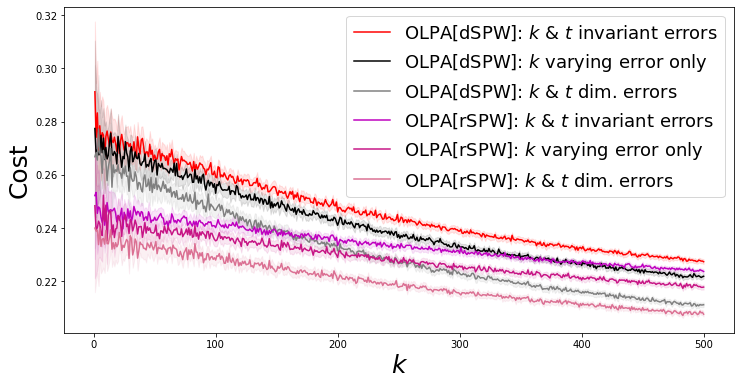

In [61]:
avg_sol = np.mean(sol_vals, axis=1)
ci_sol = 1.96 * np.std(sol_vals,axis=1)/np.sqrt(repeat)

avg_solk = np.mean(solk_vals, axis=1)
ci_solk = 1.96 * np.std(solk_vals,axis=1)/np.sqrt(repeat)

avg_solkt = np.mean(solkt_vals, axis=1)
ci_solkt = 1.96 * np.std(solkt_vals,axis=1)/np.sqrt(repeat)

avg_rand = np.mean(rand_vals, axis=1)
ci_rand = 1.96 * np.std(rand_vals,axis=1)/np.sqrt(repeat)

avg_randk = np.mean(randk_vals, axis=1)
ci_randk = 1.96 * np.std(randk_vals,axis=1)/np.sqrt(repeat)

avg_randkt = np.mean(randkt_vals, axis=1)
ci_randkt = 1.96 * np.std(randkt_vals,axis=1)/np.sqrt(repeat)

avg_min = np.mean(min_vals, axis=1)
ci_min = 1.96 * np.std(min_vals,axis=1)/np.sqrt(repeat)


plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams["figure.figsize"] = (6,4)

plt.clf()


# plt.boxplot(r_ratio.transpose());

positions = k_list # np.arange(1, len(k_list)+1)

# plt.plot(positions, avg_sol, label="Round & time invariant error", color='r')
plt.plot(positions, avg_sol, label="OLPA[dSPW]: $k$ & $t$ invariant errors", color='r')
plt.fill_between(positions, (avg_sol-ci_sol), (avg_sol+ci_sol), color='r', alpha=.1)

plt.plot(positions, avg_solk, label="OLPA[dSPW]: $k$ varying error only", color='k')
plt.fill_between(positions, (avg_solk-ci_solk), (avg_solk+ci_solk), color='k', alpha=.1)

plt.plot(positions, avg_solkt, label="OLPA[dSPW]: $k$ & $t$ dim. errors", color='grey')
plt.fill_between(positions, (avg_solkt-ci_solkt), (avg_solkt+ci_solkt), color='grey', alpha=.1)


plt.plot(positions, avg_rand, label="OLPA[rSPW]: $k$ & $t$ invariant errors", color='m')
plt.fill_between(positions, (avg_rand-ci_rand), (avg_rand+ci_rand), color='m', alpha=.1)

plt.plot(positions, avg_randk, label="OLPA[rSPW]: $k$ varying error only", color='mediumvioletred')
plt.fill_between(positions, (avg_randk-ci_randk), (avg_randk+ci_randk), color='mediumvioletred', alpha=.1)

plt.plot(positions, avg_randkt, label="OLPA[rSPW]: $k$ & $t$ dim. errors", color='palevioletred')
plt.fill_between(positions, (avg_randkt-ci_randkt), (avg_randkt+ci_randkt), color='palevioletred', alpha=.1)


# plt.plot(positions, avg_min, label="Min.", color='b')
# plt.fill_between(positions, (avg_min-ci_min), (avg_min+ci_min), color='b', alpha=.1)

# plt.plot(positions, avg_min + epsilon, label="Min. + $\epsilon$", color='g')
# plt.fill_between(positions, (avg_min+epsilon-ci_min), (avg_min+epsilon+ci_min), color='g', alpha=.1)

# formated_list = [elem for elem in k_list ]
# plt.xticks(positions, formated_list);
# plt.xlim([-1,500])
# plt.ylim([0.15,0.35])
plt.xlabel("$k$", fontsize=25)
plt.ylabel("Cost", fontsize=25)

plt.legend(loc='upper right', fontsize=18)
plt.savefig("plots/olpa-all.pdf", bbox_inches='tight')


# Experiment 4: MOLPA
## compared with Google with two epochs [Neurips 2021]


In [68]:
reload(i); reload(a); reload(a_g)
epsilon = .05
K = 500
S = 5
repeat = 23 #30
k_list = np.linspace(1,K,K, dtype=int)



# setting for epoch 1
B = 50
predictor_std_range=[0,100]
time_dependant=False
time_dim_func = "linear"
k_dependant=False

# setting for epoch 2
B_e2 = 50
predictor_std_range_e2=[0,100]
time_dependant_e2=True
time_dim_func_e2 = "1/t^2"
k_dependant_e2=False

# B = .5
# theta = 2 * np.log(12 * B ** 2 / epsilon)
# K = int(np.ceil(12 * B ** 2 * theta / epsilon**2))
# print("Theoretical bound: k >=", K)


sol_vals = np.zeros((len(k_list), repeat))
solg_vals = np.zeros((len(k_list), repeat)) # using google's algorithm
solm_vals = np.zeros((len(k_list), repeat)) # using both determinstic algorithms

min_vals = np.zeros((len(k_list), repeat))
ming_vals = np.zeros((len(k_list), repeat))
minm_vals = np.zeros((len(k_list), repeat))

# epoch 2
sol_vals_e2 = np.zeros((len(k_list), repeat))
solg_vals_e2 = np.zeros((len(k_list), repeat)) # using google's algorithm
solm_vals_e2 = np.zeros((len(k_list), repeat)) # using both determinstic algorithms




t1 = time.time()
t_ = t1
for idx,k in enumerate(k_list):
    print("🔴 k = %-7d 🕑 %-4.2fs      +%-4.2fs"%(k, time.time()-t1, time.time()-t_))
    t_ = time.time()
    for j in np.arange(repeat):
        p_ins = i.MultiPredictInstance(B=B,K=k, S=S,predictor_std_range=predictor_std_range, normalize=True,k_dependant=k_dependant, time_dependant=time_dependant, time_dim_func =  time_dim_func)  
        sol, min_R = a.MOLPA(p_ins, W=10, e=epsilon)
        sol_vals[idx, j] = sol
        min_vals[idx, j] = min_R
    
        solg, min_R_google = a.MOLPA(p_ins,alg=a_g.DPOA_google, W=10, e=epsilon)
        solg_vals[idx, j] = solg
        ming_vals[idx, j] = min_R_google

    
        solm, min_R_mixed = a.MOLPA_mult_algs(p_ins, W=10, e=epsilon)
        solm_vals[idx, j] = solm
        minm_vals[idx, j] = min_R_mixed
        print(" ↳rep %2d: molpa = %-3.2f   Google = %-3.2f    Mixed = %-3.2f  | Min = %3.2f    Google min = %3.2f   Mixed min = %3.2f "%(j, sol, solg, solm,min_R, min_R_google, min_R_mixed))

        #### Epoch 2
        p_ins_e2 = i.MultiPredictInstance(B=B_e2,K=k, S=S,predictor_std_range=predictor_std_range_e2, normalize=True,k_dependant=k_dependant_e2, time_dependant=time_dependant_e2, time_dim_func =  time_dim_func_e2)  

        sol, _ = a.MOLPA(p_ins_e2, W=10, e=epsilon)
        sol_vals_e2[idx, j] = sol
    
        solg, _ = a.MOLPA(p_ins_e2,alg=a_g.DPOA_google, W=10, e=epsilon)
        solg_vals_e2[idx, j] = solg

    
        solm, _ = a.MOLPA_mult_algs(p_ins_e2, W=10, e=epsilon)
        solm_vals_e2[idx, j] = solm

        print(" ↳rep %2d: Epoch 2: molpa = %-3.2f   Google = %-3.2f    Mixed = %-3.2f  | Min = %3.2f    Google min = %3.2f   Mixed min = %3.2f "%(j, sol, solg, solm,min_R, min_R_google, min_R_mixed))
    
print("Completed in %-4.2fs "%(time.time()-t1))

🔴 k = 1       🕑 0.00s      +0.00s
 ↳rep  0: molpa = 0.56   Google = 0.66    Mixed = 1.39  | Min = 0.50    Google min = 0.93   Mixed min = 0.93 
 ↳rep  0: Epoch 2: molpa = 0.78   Google = 0.01    Mixed = 0.01  | Min = 0.50    Google min = 0.93   Mixed min = 0.93 
 ↳rep  1: molpa = 0.73   Google = 0.94    Mixed = 0.95  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep  1: Epoch 2: molpa = 0.46   Google = 0.04    Mixed = 0.49  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep  2: molpa = 0.53   Google = 0.50    Mixed = 0.61  | Min = 0.22    Google min = 0.22   Mixed min = 0.22 
 ↳rep  2: Epoch 2: molpa = 0.09   Google = 0.09    Mixed = 0.09  | Min = 0.22    Google min = 0.22   Mixed min = 0.22 
 ↳rep  3: molpa = 0.15   Google = 0.55    Mixed = 0.64  | Min = 0.43    Google min = 0.43   Mixed min = 0.43 
 ↳rep  3: Epoch 2: molpa = 0.89   Google = 0.94    Mixed = 0.95  | Min = 0.43    Google min = 0.43   Mixed min = 0.43 
 ↳rep  4: molpa = 0.95   Google = 0.77    Mixed = 

 ↳rep 12: Epoch 2: molpa = 0.68   Google = 0.77    Mixed = 0.36  | Min = 0.51    Google min = 0.68   Mixed min = 0.68 
 ↳rep 13: molpa = 0.39   Google = 0.66    Mixed = 0.73  | Min = 0.29    Google min = 0.29   Mixed min = 0.29 
 ↳rep 13: Epoch 2: molpa = 0.28   Google = 0.39    Mixed = 0.28  | Min = 0.29    Google min = 0.29   Mixed min = 0.29 
 ↳rep 14: molpa = 0.73   Google = 0.77    Mixed = 0.80  | Min = 0.51    Google min = 0.38   Mixed min = 0.38 
 ↳rep 14: Epoch 2: molpa = 0.65   Google = 0.96    Mixed = 0.34  | Min = 0.51    Google min = 0.38   Mixed min = 0.38 
 ↳rep 15: molpa = 0.52   Google = 0.70    Mixed = 0.61  | Min = 0.50    Google min = 0.78   Mixed min = 0.78 
 ↳rep 15: Epoch 2: molpa = 0.40   Google = 0.08    Mixed = 0.59  | Min = 0.50    Google min = 0.78   Mixed min = 0.78 
 ↳rep 16: molpa = 0.65   Google = 0.65    Mixed = 0.49  | Min = 0.51    Google min = 0.38   Mixed min = 0.38 
 ↳rep 16: Epoch 2: molpa = 0.35   Google = 0.91    Mixed = 0.78  | Min = 0.51    Goo

 ↳rep  3: Epoch 2: molpa = 0.28   Google = 0.67    Mixed = 0.53  | Min = 0.50    Google min = 0.51   Mixed min = 0.51 
 ↳rep  4: molpa = 0.76   Google = 0.55    Mixed = 0.74  | Min = 0.43    Google min = 0.41   Mixed min = 0.41 
 ↳rep  4: Epoch 2: molpa = 0.72   Google = 0.42    Mixed = 0.55  | Min = 0.43    Google min = 0.41   Mixed min = 0.41 
 ↳rep  5: molpa = 0.40   Google = 0.42    Mixed = 0.41  | Min = 0.51    Google min = 0.53   Mixed min = 0.53 
 ↳rep  5: Epoch 2: molpa = 0.43   Google = 0.37    Mixed = 0.39  | Min = 0.51    Google min = 0.53   Mixed min = 0.53 
 ↳rep  6: molpa = 0.46   Google = 0.35    Mixed = 0.55  | Min = 0.43    Google min = 0.43   Mixed min = 0.43 
 ↳rep  6: Epoch 2: molpa = 0.49   Google = 0.31    Mixed = 0.47  | Min = 0.43    Google min = 0.43   Mixed min = 0.43 
 ↳rep  7: molpa = 0.83   Google = 0.39    Mixed = 0.59  | Min = 0.50    Google min = 0.38   Mixed min = 0.38 
 ↳rep  7: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.58  | Min = 0.50    Goo

 ↳rep 17: molpa = 0.45   Google = 0.57    Mixed = 0.74  | Min = 0.50    Google min = 0.55   Mixed min = 0.55 
 ↳rep 17: Epoch 2: molpa = 0.65   Google = 0.60    Mixed = 0.77  | Min = 0.50    Google min = 0.55   Mixed min = 0.55 
 ↳rep 18: molpa = 0.55   Google = 0.52    Mixed = 0.74  | Min = 0.41    Google min = 0.38   Mixed min = 0.38 
 ↳rep 18: Epoch 2: molpa = 0.60   Google = 0.57    Mixed = 0.68  | Min = 0.41    Google min = 0.38   Mixed min = 0.38 
 ↳rep 19: molpa = 0.38   Google = 0.46    Mixed = 0.53  | Min = 0.43    Google min = 0.37   Mixed min = 0.37 
 ↳rep 19: Epoch 2: molpa = 0.42   Google = 0.44    Mixed = 0.56  | Min = 0.43    Google min = 0.37   Mixed min = 0.37 
 ↳rep 20: molpa = 0.52   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.52   Mixed min = 0.52 
 ↳rep 20: Epoch 2: molpa = 0.44   Google = 0.45    Mixed = 0.35  | Min = 0.50    Google min = 0.52   Mixed min = 0.52 
 ↳rep 21: molpa = 0.70   Google = 0.43    Mixed = 0.58  | Min = 0.42    Google min =

 ↳rep  6: Epoch 2: molpa = 0.44   Google = 0.65    Mixed = 0.55  | Min = 0.50    Google min = 0.41   Mixed min = 0.41 
 ↳rep  7: molpa = 0.60   Google = 0.42    Mixed = 0.65  | Min = 0.51    Google min = 0.64   Mixed min = 0.64 
 ↳rep  7: Epoch 2: molpa = 0.41   Google = 0.32    Mixed = 0.50  | Min = 0.51    Google min = 0.64   Mixed min = 0.64 
 ↳rep  8: molpa = 0.48   Google = 0.56    Mixed = 0.57  | Min = 0.46    Google min = 0.51   Mixed min = 0.51 
 ↳rep  8: Epoch 2: molpa = 0.56   Google = 0.44    Mixed = 0.48  | Min = 0.46    Google min = 0.51   Mixed min = 0.51 
 ↳rep  9: molpa = 0.61   Google = 0.31    Mixed = 0.38  | Min = 0.37    Google min = 0.42   Mixed min = 0.42 
 ↳rep  9: Epoch 2: molpa = 0.64   Google = 0.65    Mixed = 0.47  | Min = 0.37    Google min = 0.42   Mixed min = 0.42 
 ↳rep 10: molpa = 0.35   Google = 0.45    Mixed = 0.38  | Min = 0.50    Google min = 0.63   Mixed min = 0.63 
 ↳rep 10: Epoch 2: molpa = 0.38   Google = 0.32    Mixed = 0.34  | Min = 0.50    Goo

 ↳rep 20: molpa = 0.53   Google = 0.42    Mixed = 0.47  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 20: Epoch 2: molpa = 0.45   Google = 0.69    Mixed = 0.33  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 21: molpa = 0.47   Google = 0.48    Mixed = 0.56  | Min = 0.49    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: Epoch 2: molpa = 0.46   Google = 0.56    Mixed = 0.36  | Min = 0.49    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: molpa = 0.52   Google = 0.67    Mixed = 0.50  | Min = 0.50    Google min = 0.51   Mixed min = 0.51 
 ↳rep 22: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.44  | Min = 0.50    Google min = 0.51   Mixed min = 0.51 
🔴 k = 9       🕑 24.55s      +5.36s
 ↳rep  0: molpa = 0.60   Google = 0.59    Mixed = 0.45  | Min = 0.39    Google min = 0.34   Mixed min = 0.34 
 ↳rep  0: Epoch 2: molpa = 0.41   Google = 0.35    Mixed = 0.62  | Min = 0.39    Google min = 0.34   Mixed min = 0.34 
 ↳rep  1: molpa = 0.50   Google = 0.57    Mixed =

 ↳rep 10: molpa = 0.60   Google = 0.47    Mixed = 0.48  | Min = 0.49    Google min = 0.38   Mixed min = 0.38 
 ↳rep 10: Epoch 2: molpa = 0.43   Google = 0.55    Mixed = 0.43  | Min = 0.49    Google min = 0.38   Mixed min = 0.38 
 ↳rep 11: molpa = 0.51   Google = 0.33    Mixed = 0.59  | Min = 0.46    Google min = 0.49   Mixed min = 0.49 
 ↳rep 11: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.43  | Min = 0.46    Google min = 0.49   Mixed min = 0.49 
 ↳rep 12: molpa = 0.70   Google = 0.52    Mixed = 0.54  | Min = 0.44    Google min = 0.42   Mixed min = 0.42 
 ↳rep 12: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.41  | Min = 0.44    Google min = 0.42   Mixed min = 0.42 
 ↳rep 13: molpa = 0.80   Google = 0.68    Mixed = 0.50  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep 13: Epoch 2: molpa = 0.33   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep 14: molpa = 0.50   Google = 0.57    Mixed = 0.46  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.61   Google = 0.56    Mixed = 0.50  | Min = 0.51    Google min = 0.41   Mixed min = 0.41 
 ↳rep  0: Epoch 2: molpa = 0.55   Google = 0.41    Mixed = 0.70  | Min = 0.51    Google min = 0.41   Mixed min = 0.41 
 ↳rep  1: molpa = 0.66   Google = 0.55    Mixed = 0.39  | Min = 0.49    Google min = 0.42   Mixed min = 0.42 
 ↳rep  1: Epoch 2: molpa = 0.52   Google = 0.54    Mixed = 0.58  | Min = 0.49    Google min = 0.42   Mixed min = 0.42 
 ↳rep  2: molpa = 0.47   Google = 0.47    Mixed = 0.44  | Min = 0.43    Google min = 0.42   Mixed min = 0.42 
 ↳rep  2: Epoch 2: molpa = 0.52   Google = 0.48    Mixed = 0.34  | Min = 0.43    Google min = 0.42   Mixed min = 0.42 
 ↳rep  3: molpa = 0.54   Google = 0.52    Mixed = 0.63  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep  3: Epoch 2: molpa = 0.61   Google = 0.52    Mixed = 0.41  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep  4: molpa = 0.52   Google = 0.41    Mixed = 0.40  | Min = 0.47    Google min =

 ↳rep 13: Epoch 2: molpa = 0.59   Google = 0.56    Mixed = 0.74  | Min = 0.45    Google min = 0.35   Mixed min = 0.35 
 ↳rep 14: molpa = 0.59   Google = 0.53    Mixed = 0.67  | Min = 0.51    Google min = 0.52   Mixed min = 0.52 
 ↳rep 14: Epoch 2: molpa = 0.43   Google = 0.63    Mixed = 0.40  | Min = 0.51    Google min = 0.52   Mixed min = 0.52 
 ↳rep 15: molpa = 0.67   Google = 0.56    Mixed = 0.56  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 15: Epoch 2: molpa = 0.48   Google = 0.61    Mixed = 0.41  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: molpa = 0.56   Google = 0.50    Mixed = 0.51  | Min = 0.47    Google min = 0.41   Mixed min = 0.41 
 ↳rep 16: Epoch 2: molpa = 0.51   Google = 0.69    Mixed = 0.47  | Min = 0.47    Google min = 0.41   Mixed min = 0.41 
 ↳rep 17: molpa = 0.74   Google = 0.60    Mixed = 0.56  | Min = 0.51    Google min = 0.42   Mixed min = 0.42 
 ↳rep 17: Epoch 2: molpa = 0.48   Google = 0.66    Mixed = 0.31  | Min = 0.51    Goo

 ↳rep  3: Epoch 2: molpa = 0.71   Google = 0.48    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  4: molpa = 0.43   Google = 0.65    Mixed = 0.54  | Min = 0.47    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: Epoch 2: molpa = 0.51   Google = 0.41    Mixed = 0.39  | Min = 0.47    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: molpa = 0.54   Google = 0.44    Mixed = 0.56  | Min = 0.51    Google min = 0.42   Mixed min = 0.42 
 ↳rep  5: Epoch 2: molpa = 0.49   Google = 0.59    Mixed = 0.42  | Min = 0.51    Google min = 0.42   Mixed min = 0.42 
 ↳rep  6: molpa = 0.59   Google = 0.54    Mixed = 0.51  | Min = 0.51    Google min = 0.60   Mixed min = 0.60 
 ↳rep  6: Epoch 2: molpa = 0.54   Google = 0.39    Mixed = 0.54  | Min = 0.51    Google min = 0.60   Mixed min = 0.60 
 ↳rep  7: molpa = 0.53   Google = 0.46    Mixed = 0.48  | Min = 0.51    Google min = 0.44   Mixed min = 0.44 
 ↳rep  7: Epoch 2: molpa = 0.49   Google = 0.47    Mixed = 0.50  | Min = 0.51    Goo

 ↳rep 16: Epoch 2: molpa = 0.57   Google = 0.58    Mixed = 0.59  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: molpa = 0.51   Google = 0.52    Mixed = 0.48  | Min = 0.47    Google min = 0.38   Mixed min = 0.38 
 ↳rep 17: Epoch 2: molpa = 0.41   Google = 0.58    Mixed = 0.44  | Min = 0.47    Google min = 0.38   Mixed min = 0.38 
 ↳rep 18: molpa = 0.60   Google = 0.59    Mixed = 0.47  | Min = 0.45    Google min = 0.42   Mixed min = 0.42 
 ↳rep 18: Epoch 2: molpa = 0.52   Google = 0.52    Mixed = 0.47  | Min = 0.45    Google min = 0.42   Mixed min = 0.42 
 ↳rep 19: molpa = 0.63   Google = 0.54    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: Epoch 2: molpa = 0.55   Google = 0.61    Mixed = 0.59  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 20: molpa = 0.48   Google = 0.44    Mixed = 0.58  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 20: Epoch 2: molpa = 0.61   Google = 0.55    Mixed = 0.55  | Min = 0.50    Goo

 ↳rep  6: molpa = 0.57   Google = 0.45    Mixed = 0.57  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  6: Epoch 2: molpa = 0.37   Google = 0.47    Mixed = 0.47  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  7: molpa = 0.66   Google = 0.47    Mixed = 0.72  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep  7: Epoch 2: molpa = 0.47   Google = 0.37    Mixed = 0.45  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep  8: molpa = 0.44   Google = 0.67    Mixed = 0.46  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: Epoch 2: molpa = 0.58   Google = 0.57    Mixed = 0.54  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: molpa = 0.64   Google = 0.54    Mixed = 0.63  | Min = 0.47    Google min = 0.41   Mixed min = 0.41 
 ↳rep  9: Epoch 2: molpa = 0.44   Google = 0.57    Mixed = 0.46  | Min = 0.47    Google min = 0.41   Mixed min = 0.41 
 ↳rep 10: molpa = 0.62   Google = 0.48    Mixed = 0.56  | Min = 0.47    Google min =

 ↳rep 19: molpa = 0.57   Google = 0.55    Mixed = 0.66  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: Epoch 2: molpa = 0.55   Google = 0.52    Mixed = 0.31  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 20: molpa = 0.64   Google = 0.46    Mixed = 0.42  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep 20: Epoch 2: molpa = 0.44   Google = 0.47    Mixed = 0.49  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep 21: molpa = 0.60   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.41   Mixed min = 0.41 
 ↳rep 21: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.46  | Min = 0.50    Google min = 0.41   Mixed min = 0.41 
 ↳rep 22: molpa = 0.60   Google = 0.54    Mixed = 0.54  | Min = 0.51    Google min = 0.51   Mixed min = 0.51 
 ↳rep 22: Epoch 2: molpa = 0.47   Google = 0.56    Mixed = 0.61  | Min = 0.51    Google min = 0.51   Mixed min = 0.51 
🔴 k = 20      🕑 129.56s      +13.24s
 ↳rep  0: molpa = 0.46   Google = 0.52    Mixed

 ↳rep  8: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.36  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  9: molpa = 0.60   Google = 0.44    Mixed = 0.46  | Min = 0.51    Google min = 0.41   Mixed min = 0.41 
 ↳rep  9: Epoch 2: molpa = 0.50   Google = 0.61    Mixed = 0.41  | Min = 0.51    Google min = 0.41   Mixed min = 0.41 
 ↳rep 10: molpa = 0.48   Google = 0.48    Mixed = 0.55  | Min = 0.49    Google min = 0.50   Mixed min = 0.50 
 ↳rep 10: Epoch 2: molpa = 0.54   Google = 0.54    Mixed = 0.56  | Min = 0.49    Google min = 0.50   Mixed min = 0.50 
 ↳rep 11: molpa = 0.60   Google = 0.58    Mixed = 0.63  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: Epoch 2: molpa = 0.55   Google = 0.46    Mixed = 0.58  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 12: molpa = 0.54   Google = 0.45    Mixed = 0.56  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: Epoch 2: molpa = 0.67   Google = 0.56    Mixed = 0.59  | Min = 0.51    Goo

 ↳rep 21: Epoch 2: molpa = 0.40   Google = 0.47    Mixed = 0.46  | Min = 0.48    Google min = 0.48   Mixed min = 0.48 
 ↳rep 22: molpa = 0.43   Google = 0.56    Mixed = 0.52  | Min = 0.48    Google min = 0.45   Mixed min = 0.45 
 ↳rep 22: Epoch 2: molpa = 0.44   Google = 0.51    Mixed = 0.60  | Min = 0.48    Google min = 0.45   Mixed min = 0.45 
🔴 k = 23      🕑 173.33s      +15.49s
 ↳rep  0: molpa = 0.47   Google = 0.53    Mixed = 0.53  | Min = 0.48    Google min = 0.43   Mixed min = 0.43 
 ↳rep  0: Epoch 2: molpa = 0.49   Google = 0.60    Mixed = 0.54  | Min = 0.48    Google min = 0.43   Mixed min = 0.43 
 ↳rep  1: molpa = 0.61   Google = 0.54    Mixed = 0.49  | Min = 0.51    Google min = 0.42   Mixed min = 0.42 
 ↳rep  1: Epoch 2: molpa = 0.48   Google = 0.55    Mixed = 0.51  | Min = 0.51    Google min = 0.42   Mixed min = 0.42 
 ↳rep  2: molpa = 0.61   Google = 0.39    Mixed = 0.63  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep  2: Epoch 2: molpa = 0.59   Google = 0.60

 ↳rep 11: molpa = 0.55   Google = 0.58    Mixed = 0.57  | Min = 0.49    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: Epoch 2: molpa = 0.44   Google = 0.59    Mixed = 0.50  | Min = 0.49    Google min = 0.48   Mixed min = 0.48 
 ↳rep 12: molpa = 0.49   Google = 0.40    Mixed = 0.63  | Min = 0.47    Google min = 0.45   Mixed min = 0.45 
 ↳rep 12: Epoch 2: molpa = 0.56   Google = 0.49    Mixed = 0.54  | Min = 0.47    Google min = 0.45   Mixed min = 0.45 
 ↳rep 13: molpa = 0.56   Google = 0.54    Mixed = 0.54  | Min = 0.51    Google min = 0.42   Mixed min = 0.42 
 ↳rep 13: Epoch 2: molpa = 0.45   Google = 0.47    Mixed = 0.52  | Min = 0.51    Google min = 0.42   Mixed min = 0.42 
 ↳rep 14: molpa = 0.58   Google = 0.54    Mixed = 0.53  | Min = 0.49    Google min = 0.40   Mixed min = 0.40 
 ↳rep 14: Epoch 2: molpa = 0.53   Google = 0.52    Mixed = 0.47  | Min = 0.49    Google min = 0.40   Mixed min = 0.40 
 ↳rep 15: molpa = 0.60   Google = 0.52    Mixed = 0.57  | Min = 0.48    Google min =

 ↳rep  0: Epoch 2: molpa = 0.54   Google = 0.59    Mixed = 0.50  | Min = 0.51    Google min = 0.44   Mixed min = 0.44 
 ↳rep  1: molpa = 0.68   Google = 0.48    Mixed = 0.59  | Min = 0.50    Google min = 0.51   Mixed min = 0.51 
 ↳rep  1: Epoch 2: molpa = 0.56   Google = 0.57    Mixed = 0.52  | Min = 0.50    Google min = 0.51   Mixed min = 0.51 
 ↳rep  2: molpa = 0.48   Google = 0.51    Mixed = 0.54  | Min = 0.47    Google min = 0.43   Mixed min = 0.43 
 ↳rep  2: Epoch 2: molpa = 0.53   Google = 0.58    Mixed = 0.47  | Min = 0.47    Google min = 0.43   Mixed min = 0.43 
 ↳rep  3: molpa = 0.53   Google = 0.51    Mixed = 0.52  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep  3: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.59  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep  4: molpa = 0.59   Google = 0.57    Mixed = 0.48  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep  4: Epoch 2: molpa = 0.43   Google = 0.52    Mixed = 0.59  | Min = 0.50    Goo

 ↳rep 13: Epoch 2: molpa = 0.50   Google = 0.51    Mixed = 0.58  | Min = 0.50    Google min = 0.41   Mixed min = 0.41 
 ↳rep 14: molpa = 0.44   Google = 0.59    Mixed = 0.52  | Min = 0.46    Google min = 0.42   Mixed min = 0.42 
 ↳rep 14: Epoch 2: molpa = 0.51   Google = 0.58    Mixed = 0.42  | Min = 0.46    Google min = 0.42   Mixed min = 0.42 
 ↳rep 15: molpa = 0.51   Google = 0.54    Mixed = 0.44  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 15: Epoch 2: molpa = 0.49   Google = 0.65    Mixed = 0.57  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: molpa = 0.50   Google = 0.54    Mixed = 0.60  | Min = 0.51    Google min = 0.52   Mixed min = 0.52 
 ↳rep 16: Epoch 2: molpa = 0.54   Google = 0.48    Mixed = 0.53  | Min = 0.51    Google min = 0.52   Mixed min = 0.52 
 ↳rep 17: molpa = 0.49   Google = 0.54    Mixed = 0.64  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: Epoch 2: molpa = 0.48   Google = 0.48    Mixed = 0.49  | Min = 0.50    Goo

 ↳rep  3: molpa = 0.52   Google = 0.49    Mixed = 0.60  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep  3: Epoch 2: molpa = 0.47   Google = 0.46    Mixed = 0.49  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep  4: molpa = 0.52   Google = 0.50    Mixed = 0.54  | Min = 0.43    Google min = 0.37   Mixed min = 0.37 
 ↳rep  4: Epoch 2: molpa = 0.57   Google = 0.53    Mixed = 0.50  | Min = 0.43    Google min = 0.37   Mixed min = 0.37 
 ↳rep  5: molpa = 0.57   Google = 0.49    Mixed = 0.51  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: Epoch 2: molpa = 0.44   Google = 0.53    Mixed = 0.50  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: molpa = 0.52   Google = 0.66    Mixed = 0.60  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  6: Epoch 2: molpa = 0.51   Google = 0.56    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  7: molpa = 0.61   Google = 0.51    Mixed = 0.59  | Min = 0.49    Google min =

 ↳rep 16: molpa = 0.52   Google = 0.46    Mixed = 0.53  | Min = 0.50    Google min = 0.40   Mixed min = 0.40 
 ↳rep 16: Epoch 2: molpa = 0.54   Google = 0.52    Mixed = 0.60  | Min = 0.50    Google min = 0.40   Mixed min = 0.40 
 ↳rep 17: molpa = 0.53   Google = 0.61    Mixed = 0.54  | Min = 0.46    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: Epoch 2: molpa = 0.52   Google = 0.46    Mixed = 0.49  | Min = 0.46    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: molpa = 0.52   Google = 0.48    Mixed = 0.55  | Min = 0.51    Google min = 0.54   Mixed min = 0.54 
 ↳rep 18: Epoch 2: molpa = 0.47   Google = 0.57    Mixed = 0.46  | Min = 0.51    Google min = 0.54   Mixed min = 0.54 
 ↳rep 19: molpa = 0.48   Google = 0.57    Mixed = 0.50  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: Epoch 2: molpa = 0.56   Google = 0.55    Mixed = 0.53  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 20: molpa = 0.49   Google = 0.53    Mixed = 0.57  | Min = 0.48    Google min =

 ↳rep  5: Epoch 2: molpa = 0.56   Google = 0.49    Mixed = 0.49  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep  6: molpa = 0.46   Google = 0.59    Mixed = 0.57  | Min = 0.51    Google min = 0.53   Mixed min = 0.53 
 ↳rep  6: Epoch 2: molpa = 0.42   Google = 0.60    Mixed = 0.50  | Min = 0.51    Google min = 0.53   Mixed min = 0.53 
 ↳rep  7: molpa = 0.60   Google = 0.51    Mixed = 0.47  | Min = 0.51    Google min = 0.42   Mixed min = 0.42 
 ↳rep  7: Epoch 2: molpa = 0.54   Google = 0.52    Mixed = 0.49  | Min = 0.51    Google min = 0.42   Mixed min = 0.42 
 ↳rep  8: molpa = 0.58   Google = 0.50    Mixed = 0.57  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep  8: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.46  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep  9: molpa = 0.45   Google = 0.58    Mixed = 0.50  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  9: Epoch 2: molpa = 0.52   Google = 0.48    Mixed = 0.51  | Min = 0.50    Goo

 ↳rep 18: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: molpa = 0.58   Google = 0.54    Mixed = 0.52  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep 19: Epoch 2: molpa = 0.44   Google = 0.65    Mixed = 0.49  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep 20: molpa = 0.53   Google = 0.63    Mixed = 0.59  | Min = 0.50    Google min = 0.51   Mixed min = 0.51 
 ↳rep 20: Epoch 2: molpa = 0.49   Google = 0.50    Mixed = 0.57  | Min = 0.50    Google min = 0.51   Mixed min = 0.51 
 ↳rep 21: molpa = 0.52   Google = 0.60    Mixed = 0.52  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: Epoch 2: molpa = 0.49   Google = 0.48    Mixed = 0.55  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: molpa = 0.55   Google = 0.50    Mixed = 0.52  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: Epoch 2: molpa = 0.47   Google = 0.47    Mixed = 0.54  | Min = 0.51    Goo

 ↳rep  8: molpa = 0.54   Google = 0.55    Mixed = 0.51  | Min = 0.49    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: Epoch 2: molpa = 0.53   Google = 0.62    Mixed = 0.42  | Min = 0.49    Google min = 0.48   Mixed min = 0.48 
 ↳rep  9: molpa = 0.61   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  9: Epoch 2: molpa = 0.48   Google = 0.49    Mixed = 0.49  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 10: molpa = 0.57   Google = 0.59    Mixed = 0.64  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep 10: Epoch 2: molpa = 0.54   Google = 0.57    Mixed = 0.52  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep 11: molpa = 0.61   Google = 0.57    Mixed = 0.70  | Min = 0.49    Google min = 0.52   Mixed min = 0.52 
 ↳rep 11: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.50  | Min = 0.49    Google min = 0.52   Mixed min = 0.52 
 ↳rep 12: molpa = 0.50   Google = 0.55    Mixed = 0.58  | Min = 0.49    Google min =

 ↳rep 21: molpa = 0.55   Google = 0.46    Mixed = 0.54  | Min = 0.51    Google min = 0.44   Mixed min = 0.44 
 ↳rep 21: Epoch 2: molpa = 0.53   Google = 0.57    Mixed = 0.54  | Min = 0.51    Google min = 0.44   Mixed min = 0.44 
 ↳rep 22: molpa = 0.58   Google = 0.57    Mixed = 0.55  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: Epoch 2: molpa = 0.54   Google = 0.55    Mixed = 0.54  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
🔴 k = 37      🕑 455.64s      +24.93s
 ↳rep  0: molpa = 0.57   Google = 0.55    Mixed = 0.65  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  0: Epoch 2: molpa = 0.50   Google = 0.45    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: molpa = 0.56   Google = 0.45    Mixed = 0.47  | Min = 0.51    Google min = 0.43   Mixed min = 0.43 
 ↳rep  1: Epoch 2: molpa = 0.55   Google = 0.64    Mixed = 0.52  | Min = 0.51    Google min = 0.43   Mixed min = 0.43 
 ↳rep  2: molpa = 0.62   Google = 0.60    Mixed

 ↳rep 10: Epoch 2: molpa = 0.43   Google = 0.55    Mixed = 0.51  | Min = 0.51    Google min = 0.52   Mixed min = 0.52 
 ↳rep 11: molpa = 0.55   Google = 0.54    Mixed = 0.47  | Min = 0.51    Google min = 0.53   Mixed min = 0.53 
 ↳rep 11: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.57  | Min = 0.51    Google min = 0.53   Mixed min = 0.53 
 ↳rep 12: molpa = 0.49   Google = 0.56    Mixed = 0.58  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep 12: Epoch 2: molpa = 0.51   Google = 0.57    Mixed = 0.48  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep 13: molpa = 0.48   Google = 0.55    Mixed = 0.53  | Min = 0.51    Google min = 0.42   Mixed min = 0.42 
 ↳rep 13: Epoch 2: molpa = 0.48   Google = 0.56    Mixed = 0.47  | Min = 0.51    Google min = 0.42   Mixed min = 0.42 
 ↳rep 14: molpa = 0.59   Google = 0.54    Mixed = 0.60  | Min = 0.51    Google min = 0.55   Mixed min = 0.55 
 ↳rep 14: Epoch 2: molpa = 0.53   Google = 0.59    Mixed = 0.55  | Min = 0.51    Goo

 ↳rep  0: molpa = 0.60   Google = 0.51    Mixed = 0.60  | Min = 0.51    Google min = 0.53   Mixed min = 0.53 
 ↳rep  0: Epoch 2: molpa = 0.54   Google = 0.49    Mixed = 0.55  | Min = 0.51    Google min = 0.53   Mixed min = 0.53 
 ↳rep  1: molpa = 0.58   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep  1: Epoch 2: molpa = 0.53   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep  2: molpa = 0.52   Google = 0.56    Mixed = 0.54  | Min = 0.49    Google min = 0.49   Mixed min = 0.49 
 ↳rep  2: Epoch 2: molpa = 0.47   Google = 0.43    Mixed = 0.41  | Min = 0.49    Google min = 0.49   Mixed min = 0.49 
 ↳rep  3: molpa = 0.51   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  3: Epoch 2: molpa = 0.53   Google = 0.53    Mixed = 0.49  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  4: molpa = 0.63   Google = 0.54    Mixed = 0.56  | Min = 0.51    Google min =

 ↳rep 13: molpa = 0.53   Google = 0.55    Mixed = 0.54  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 13: Epoch 2: molpa = 0.48   Google = 0.55    Mixed = 0.57  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 14: molpa = 0.55   Google = 0.52    Mixed = 0.54  | Min = 0.49    Google min = 0.43   Mixed min = 0.43 
 ↳rep 14: Epoch 2: molpa = 0.44   Google = 0.51    Mixed = 0.51  | Min = 0.49    Google min = 0.43   Mixed min = 0.43 
 ↳rep 15: molpa = 0.53   Google = 0.55    Mixed = 0.58  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep 15: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.54  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep 16: molpa = 0.47   Google = 0.46    Mixed = 0.50  | Min = 0.51    Google min = 0.42   Mixed min = 0.42 
 ↳rep 16: Epoch 2: molpa = 0.62   Google = 0.47    Mixed = 0.58  | Min = 0.51    Google min = 0.42   Mixed min = 0.42 
 ↳rep 17: molpa = 0.52   Google = 0.55    Mixed = 0.53  | Min = 0.49    Google min =

 ↳rep  2: Epoch 2: molpa = 0.51   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: molpa = 0.53   Google = 0.52    Mixed = 0.60  | Min = 0.49    Google min = 0.43   Mixed min = 0.43 
 ↳rep  3: Epoch 2: molpa = 0.51   Google = 0.55    Mixed = 0.49  | Min = 0.49    Google min = 0.43   Mixed min = 0.43 
 ↳rep  4: molpa = 0.45   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep  4: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep  5: molpa = 0.58   Google = 0.58    Mixed = 0.57  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  5: Epoch 2: molpa = 0.53   Google = 0.49    Mixed = 0.58  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  6: molpa = 0.58   Google = 0.56    Mixed = 0.61  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: Epoch 2: molpa = 0.48   Google = 0.46    Mixed = 0.51  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.50   Google = 0.49    Mixed = 0.51  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: molpa = 0.54   Google = 0.48    Mixed = 0.57  | Min = 0.50    Google min = 0.42   Mixed min = 0.42 
 ↳rep 16: Epoch 2: molpa = 0.44   Google = 0.56    Mixed = 0.54  | Min = 0.50    Google min = 0.42   Mixed min = 0.42 
 ↳rep 17: molpa = 0.53   Google = 0.42    Mixed = 0.50  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep 17: Epoch 2: molpa = 0.50   Google = 0.48    Mixed = 0.55  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep 18: molpa = 0.57   Google = 0.62    Mixed = 0.53  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep 18: Epoch 2: molpa = 0.49   Google = 0.55    Mixed = 0.57  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep 19: molpa = 0.58   Google = 0.56    Mixed = 0.48  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: Epoch 2: molpa = 0.45   Google = 0.48    Mixed = 0.49  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.59   Google = 0.49    Mixed = 0.54  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep  5: Epoch 2: molpa = 0.56   Google = 0.56    Mixed = 0.46  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep  6: molpa = 0.54   Google = 0.50    Mixed = 0.60  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: Epoch 2: molpa = 0.53   Google = 0.53    Mixed = 0.61  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  7: molpa = 0.59   Google = 0.51    Mixed = 0.53  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep  7: Epoch 2: molpa = 0.49   Google = 0.56    Mixed = 0.52  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep  8: molpa = 0.58   Google = 0.56    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: Epoch 2: molpa = 0.52   Google = 0.56    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: molpa = 0.57   Google = 0.51    Mixed = 0.58  | Min = 0.51    Google min =

 ↳rep 18: molpa = 0.64   Google = 0.53    Mixed = 0.60  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep 18: Epoch 2: molpa = 0.54   Google = 0.51    Mixed = 0.49  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep 19: molpa = 0.55   Google = 0.60    Mixed = 0.55  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 19: Epoch 2: molpa = 0.43   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 20: molpa = 0.55   Google = 0.48    Mixed = 0.49  | Min = 0.51    Google min = 0.44   Mixed min = 0.44 
 ↳rep 20: Epoch 2: molpa = 0.48   Google = 0.47    Mixed = 0.45  | Min = 0.51    Google min = 0.44   Mixed min = 0.44 
 ↳rep 21: molpa = 0.55   Google = 0.61    Mixed = 0.57  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: Epoch 2: molpa = 0.49   Google = 0.48    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: molpa = 0.56   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.51   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: molpa = 0.54   Google = 0.48    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  8: Epoch 2: molpa = 0.59   Google = 0.56    Mixed = 0.56  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  9: molpa = 0.56   Google = 0.51    Mixed = 0.49  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: Epoch 2: molpa = 0.54   Google = 0.55    Mixed = 0.57  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: molpa = 0.57   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 10: Epoch 2: molpa = 0.61   Google = 0.57    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: molpa = 0.60   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: Epoch 2: molpa = 0.49   Google = 0.45    Mixed = 0.53  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.53   Google = 0.55    Mixed = 0.53  | Min = 0.51    Google min = 0.44   Mixed min = 0.44 
 ↳rep 21: molpa = 0.58   Google = 0.50    Mixed = 0.54  | Min = 0.51    Google min = 0.51   Mixed min = 0.51 
 ↳rep 21: Epoch 2: molpa = 0.56   Google = 0.62    Mixed = 0.56  | Min = 0.51    Google min = 0.51   Mixed min = 0.51 
 ↳rep 22: molpa = 0.58   Google = 0.58    Mixed = 0.50  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 22: Epoch 2: molpa = 0.55   Google = 0.49    Mixed = 0.47  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
🔴 k = 51      🕑 870.27s      +34.18s
 ↳rep  0: molpa = 0.57   Google = 0.49    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  0: Epoch 2: molpa = 0.53   Google = 0.57    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: molpa = 0.60   Google = 0.52    Mixed = 0.60  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: Epoch 2: molpa = 0.50   Google = 0.44

 ↳rep 10: molpa = 0.53   Google = 0.48    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 10: Epoch 2: molpa = 0.44   Google = 0.48    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 11: molpa = 0.59   Google = 0.55    Mixed = 0.58  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: Epoch 2: molpa = 0.48   Google = 0.55    Mixed = 0.51  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 12: molpa = 0.42   Google = 0.57    Mixed = 0.57  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 12: Epoch 2: molpa = 0.57   Google = 0.57    Mixed = 0.56  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 13: molpa = 0.56   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 13: Epoch 2: molpa = 0.55   Google = 0.56    Mixed = 0.55  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 14: molpa = 0.66   Google = 0.57    Mixed = 0.56  | Min = 0.51    Google min =

 ↳rep  0: molpa = 0.64   Google = 0.57    Mixed = 0.53  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep  0: Epoch 2: molpa = 0.48   Google = 0.56    Mixed = 0.45  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep  1: molpa = 0.54   Google = 0.49    Mixed = 0.54  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: Epoch 2: molpa = 0.46   Google = 0.55    Mixed = 0.48  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  2: molpa = 0.58   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  2: Epoch 2: molpa = 0.53   Google = 0.55    Mixed = 0.56  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  3: molpa = 0.51   Google = 0.48    Mixed = 0.53  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep  3: Epoch 2: molpa = 0.51   Google = 0.47    Mixed = 0.55  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep  4: molpa = 0.61   Google = 0.58    Mixed = 0.52  | Min = 0.51    Google min =

 ↳rep 13: molpa = 0.55   Google = 0.47    Mixed = 0.53  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep 13: Epoch 2: molpa = 0.58   Google = 0.56    Mixed = 0.54  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep 14: molpa = 0.51   Google = 0.45    Mixed = 0.58  | Min = 0.50    Google min = 0.40   Mixed min = 0.40 
 ↳rep 14: Epoch 2: molpa = 0.55   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.40   Mixed min = 0.40 
 ↳rep 15: molpa = 0.58   Google = 0.43    Mixed = 0.63  | Min = 0.50    Google min = 0.42   Mixed min = 0.42 
 ↳rep 15: Epoch 2: molpa = 0.54   Google = 0.55    Mixed = 0.52  | Min = 0.50    Google min = 0.42   Mixed min = 0.42 
 ↳rep 16: molpa = 0.57   Google = 0.50    Mixed = 0.51  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep 16: Epoch 2: molpa = 0.54   Google = 0.56    Mixed = 0.49  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep 17: molpa = 0.59   Google = 0.54    Mixed = 0.59  | Min = 0.51    Google min =

 ↳rep  2: Epoch 2: molpa = 0.51   Google = 0.54    Mixed = 0.56  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep  3: molpa = 0.59   Google = 0.46    Mixed = 0.57  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: Epoch 2: molpa = 0.52   Google = 0.56    Mixed = 0.46  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: molpa = 0.61   Google = 0.49    Mixed = 0.53  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  4: Epoch 2: molpa = 0.50   Google = 0.54    Mixed = 0.55  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  5: molpa = 0.59   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: Epoch 2: molpa = 0.63   Google = 0.50    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: molpa = 0.58   Google = 0.49    Mixed = 0.54  | Min = 0.50    Google min = 0.51   Mixed min = 0.51 
 ↳rep  6: Epoch 2: molpa = 0.49   Google = 0.50    Mixed = 0.45  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.45   Google = 0.57    Mixed = 0.43  | Min = 0.51    Google min = 0.51   Mixed min = 0.51 
 ↳rep 16: molpa = 0.59   Google = 0.53    Mixed = 0.48  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: Epoch 2: molpa = 0.56   Google = 0.54    Mixed = 0.48  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: molpa = 0.62   Google = 0.54    Mixed = 0.56  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep 17: Epoch 2: molpa = 0.53   Google = 0.48    Mixed = 0.49  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep 18: molpa = 0.58   Google = 0.52    Mixed = 0.50  | Min = 0.51    Google min = 0.44   Mixed min = 0.44 
 ↳rep 18: Epoch 2: molpa = 0.52   Google = 0.54    Mixed = 0.47  | Min = 0.51    Google min = 0.44   Mixed min = 0.44 
 ↳rep 19: molpa = 0.55   Google = 0.51    Mixed = 0.59  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep 19: Epoch 2: molpa = 0.58   Google = 0.53    Mixed = 0.59  | Min = 0.51    Goo

 ↳rep  5: molpa = 0.62   Google = 0.54    Mixed = 0.56  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: Epoch 2: molpa = 0.49   Google = 0.50    Mixed = 0.47  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: molpa = 0.59   Google = 0.52    Mixed = 0.56  | Min = 0.51    Google min = 0.51   Mixed min = 0.51 
 ↳rep  6: Epoch 2: molpa = 0.57   Google = 0.52    Mixed = 0.51  | Min = 0.51    Google min = 0.51   Mixed min = 0.51 
 ↳rep  7: molpa = 0.58   Google = 0.54    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  7: Epoch 2: molpa = 0.50   Google = 0.55    Mixed = 0.57  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: molpa = 0.59   Google = 0.47    Mixed = 0.54  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: Epoch 2: molpa = 0.56   Google = 0.53    Mixed = 0.43  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: molpa = 0.53   Google = 0.59    Mixed = 0.59  | Min = 0.51    Google min =

 ↳rep 18: molpa = 0.55   Google = 0.55    Mixed = 0.54  | Min = 0.48    Google min = 0.43   Mixed min = 0.43 
 ↳rep 18: Epoch 2: molpa = 0.51   Google = 0.51    Mixed = 0.53  | Min = 0.48    Google min = 0.43   Mixed min = 0.43 
 ↳rep 19: molpa = 0.60   Google = 0.50    Mixed = 0.59  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep 19: Epoch 2: molpa = 0.51   Google = 0.60    Mixed = 0.43  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep 20: molpa = 0.62   Google = 0.60    Mixed = 0.57  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 20: Epoch 2: molpa = 0.43   Google = 0.52    Mixed = 0.50  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: molpa = 0.53   Google = 0.48    Mixed = 0.49  | Min = 0.47    Google min = 0.43   Mixed min = 0.43 
 ↳rep 21: Epoch 2: molpa = 0.46   Google = 0.48    Mixed = 0.51  | Min = 0.47    Google min = 0.43   Mixed min = 0.43 
 ↳rep 22: molpa = 0.57   Google = 0.47    Mixed = 0.51  | Min = 0.48    Google min =

 ↳rep  7: Epoch 2: molpa = 0.47   Google = 0.42    Mixed = 0.46  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep  8: molpa = 0.60   Google = 0.54    Mixed = 0.58  | Min = 0.51    Google min = 0.51   Mixed min = 0.51 
 ↳rep  8: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.48  | Min = 0.51    Google min = 0.51   Mixed min = 0.51 
 ↳rep  9: molpa = 0.57   Google = 0.48    Mixed = 0.52  | Min = 0.49    Google min = 0.43   Mixed min = 0.43 
 ↳rep  9: Epoch 2: molpa = 0.54   Google = 0.49    Mixed = 0.54  | Min = 0.49    Google min = 0.43   Mixed min = 0.43 
 ↳rep 10: molpa = 0.55   Google = 0.54    Mixed = 0.55  | Min = 0.49    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: Epoch 2: molpa = 0.54   Google = 0.60    Mixed = 0.56  | Min = 0.49    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: molpa = 0.56   Google = 0.53    Mixed = 0.60  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 11: Epoch 2: molpa = 0.50   Google = 0.54    Mixed = 0.53  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.50   Google = 0.49    Mixed = 0.52  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: molpa = 0.47   Google = 0.54    Mixed = 0.58  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: Epoch 2: molpa = 0.48   Google = 0.47    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: molpa = 0.50   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep 22: Epoch 2: molpa = 0.50   Google = 0.47    Mixed = 0.52  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
🔴 k = 65      🕑 1417.42s      +42.84s
 ↳rep  0: molpa = 0.58   Google = 0.50    Mixed = 0.54  | Min = 0.51    Google min = 0.43   Mixed min = 0.43 
 ↳rep  0: Epoch 2: molpa = 0.50   Google = 0.54    Mixed = 0.52  | Min = 0.51    Google min = 0.43   Mixed min = 0.43 
 ↳rep  1: molpa = 0.60   Google = 0.52    Mixed = 0.54  | Min = 0.49    Google min = 0.49   Mixed min = 0.49 
 ↳rep  1: Epoch 2: molpa = 0.53   Google = 0.5

 ↳rep 10: molpa = 0.60   Google = 0.52    Mixed = 0.56  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: Epoch 2: molpa = 0.55   Google = 0.55    Mixed = 0.54  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: molpa = 0.59   Google = 0.55    Mixed = 0.54  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.53  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: molpa = 0.61   Google = 0.53    Mixed = 0.55  | Min = 0.51    Google min = 0.53   Mixed min = 0.53 
 ↳rep 12: Epoch 2: molpa = 0.50   Google = 0.54    Mixed = 0.53  | Min = 0.51    Google min = 0.53   Mixed min = 0.53 
 ↳rep 13: molpa = 0.61   Google = 0.54    Mixed = 0.53  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep 13: Epoch 2: molpa = 0.37   Google = 0.50    Mixed = 0.46  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep 14: molpa = 0.51   Google = 0.49    Mixed = 0.52  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.57   Google = 0.61    Mixed = 0.60  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  0: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.50  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  1: molpa = 0.52   Google = 0.43    Mixed = 0.55  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep  1: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.52  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep  2: molpa = 0.55   Google = 0.56    Mixed = 0.59  | Min = 0.50    Google min = 0.51   Mixed min = 0.51 
 ↳rep  2: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.51   Mixed min = 0.51 
 ↳rep  3: molpa = 0.62   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.54   Mixed min = 0.54 
 ↳rep  3: Epoch 2: molpa = 0.48   Google = 0.57    Mixed = 0.48  | Min = 0.50    Google min = 0.54   Mixed min = 0.54 
 ↳rep  4: molpa = 0.49   Google = 0.52    Mixed = 0.57  | Min = 0.49    Google min =

 ↳rep 13: molpa = 0.56   Google = 0.56    Mixed = 0.50  | Min = 0.51    Google min = 0.43   Mixed min = 0.43 
 ↳rep 13: Epoch 2: molpa = 0.46   Google = 0.49    Mixed = 0.48  | Min = 0.51    Google min = 0.43   Mixed min = 0.43 
 ↳rep 14: molpa = 0.55   Google = 0.49    Mixed = 0.57  | Min = 0.48    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: Epoch 2: molpa = 0.52   Google = 0.53    Mixed = 0.47  | Min = 0.48    Google min = 0.47   Mixed min = 0.47 
 ↳rep 15: molpa = 0.53   Google = 0.56    Mixed = 0.53  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 15: Epoch 2: molpa = 0.45   Google = 0.48    Mixed = 0.51  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: molpa = 0.60   Google = 0.49    Mixed = 0.47  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: Epoch 2: molpa = 0.48   Google = 0.46    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 17: molpa = 0.67   Google = 0.59    Mixed = 0.60  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.54   Google = 0.50    Mixed = 0.48  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep  3: molpa = 0.56   Google = 0.50    Mixed = 0.51  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep  3: Epoch 2: molpa = 0.50   Google = 0.55    Mixed = 0.56  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep  4: molpa = 0.62   Google = 0.56    Mixed = 0.57  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  4: Epoch 2: molpa = 0.55   Google = 0.54    Mixed = 0.48  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  5: molpa = 0.57   Google = 0.52    Mixed = 0.58  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep  5: Epoch 2: molpa = 0.51   Google = 0.56    Mixed = 0.51  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep  6: molpa = 0.56   Google = 0.56    Mixed = 0.55  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  6: Epoch 2: molpa = 0.50   Google = 0.56    Mixed = 0.50  | Min = 0.51    Goo

 ↳rep 15: Epoch 2: molpa = 0.50   Google = 0.56    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: molpa = 0.54   Google = 0.49    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 16: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 17: molpa = 0.57   Google = 0.57    Mixed = 0.51  | Min = 0.49    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: Epoch 2: molpa = 0.52   Google = 0.51    Mixed = 0.45  | Min = 0.49    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: molpa = 0.57   Google = 0.60    Mixed = 0.59  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: Epoch 2: molpa = 0.52   Google = 0.53    Mixed = 0.53  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: molpa = 0.54   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: Epoch 2: molpa = 0.51   Google = 0.54    Mixed = 0.54  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.53   Google = 0.47    Mixed = 0.52  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: Epoch 2: molpa = 0.52   Google = 0.51    Mixed = 0.54  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: molpa = 0.57   Google = 0.52    Mixed = 0.53  | Min = 0.51    Google min = 0.44   Mixed min = 0.44 
 ↳rep  6: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.49  | Min = 0.51    Google min = 0.44   Mixed min = 0.44 
 ↳rep  7: molpa = 0.57   Google = 0.55    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  7: Epoch 2: molpa = 0.43   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: molpa = 0.59   Google = 0.51    Mixed = 0.60  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  8: Epoch 2: molpa = 0.53   Google = 0.56    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  9: molpa = 0.54   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.58   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 18: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.57  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 19: molpa = 0.57   Google = 0.58    Mixed = 0.57  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 19: Epoch 2: molpa = 0.51   Google = 0.49    Mixed = 0.48  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 20: molpa = 0.51   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep 20: Epoch 2: molpa = 0.44   Google = 0.57    Mixed = 0.51  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep 21: molpa = 0.59   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: Epoch 2: molpa = 0.53   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: molpa = 0.54   Google = 0.57    Mixed = 0.54  | Min = 0.51    Google min =

 ↳rep  7: Epoch 2: molpa = 0.49   Google = 0.48    Mixed = 0.56  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: molpa = 0.53   Google = 0.54    Mixed = 0.56  | Min = 0.48    Google min = 0.41   Mixed min = 0.41 
 ↳rep  8: Epoch 2: molpa = 0.49   Google = 0.57    Mixed = 0.55  | Min = 0.48    Google min = 0.41   Mixed min = 0.41 
 ↳rep  9: molpa = 0.54   Google = 0.59    Mixed = 0.47  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: Epoch 2: molpa = 0.50   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 10: molpa = 0.58   Google = 0.54    Mixed = 0.55  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 10: Epoch 2: molpa = 0.44   Google = 0.55    Mixed = 0.56  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: molpa = 0.57   Google = 0.57    Mixed = 0.56  | Min = 0.50    Google min = 0.52   Mixed min = 0.52 
 ↳rep 11: Epoch 2: molpa = 0.56   Google = 0.56    Mixed = 0.45  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.51   Google = 0.57    Mixed = 0.51  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: molpa = 0.50   Google = 0.55    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 21: Epoch 2: molpa = 0.48   Google = 0.57    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 22: molpa = 0.57   Google = 0.61    Mixed = 0.55  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep 22: Epoch 2: molpa = 0.51   Google = 0.49    Mixed = 0.50  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
🔴 k = 79      🕑 2093.90s      +53.23s
 ↳rep  0: molpa = 0.55   Google = 0.55    Mixed = 0.52  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  0: Epoch 2: molpa = 0.55   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  1: molpa = 0.55   Google = 0.53    Mixed = 0.60  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: Epoch 2: molpa = 0.50   Google = 0.4

 ↳rep 10: molpa = 0.57   Google = 0.53    Mixed = 0.54  | Min = 0.49    Google min = 0.50   Mixed min = 0.50 
 ↳rep 10: Epoch 2: molpa = 0.45   Google = 0.55    Mixed = 0.48  | Min = 0.49    Google min = 0.50   Mixed min = 0.50 
 ↳rep 11: molpa = 0.57   Google = 0.60    Mixed = 0.47  | Min = 0.49    Google min = 0.41   Mixed min = 0.41 
 ↳rep 11: Epoch 2: molpa = 0.43   Google = 0.59    Mixed = 0.53  | Min = 0.49    Google min = 0.41   Mixed min = 0.41 
 ↳rep 12: molpa = 0.61   Google = 0.56    Mixed = 0.61  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: Epoch 2: molpa = 0.52   Google = 0.56    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: molpa = 0.55   Google = 0.51    Mixed = 0.54  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.48   Google = 0.55    Mixed = 0.52  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.56   Google = 0.47    Mixed = 0.51  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.58   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  0: Epoch 2: molpa = 0.50   Google = 0.50    Mixed = 0.48  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: molpa = 0.56   Google = 0.55    Mixed = 0.52  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep  1: Epoch 2: molpa = 0.45   Google = 0.46    Mixed = 0.44  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep  2: molpa = 0.59   Google = 0.55    Mixed = 0.62  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep  2: Epoch 2: molpa = 0.41   Google = 0.46    Mixed = 0.51  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep  3: molpa = 0.53   Google = 0.51    Mixed = 0.56  | Min = 0.44    Google min = 0.38   Mixed min = 0.38 
 ↳rep  3: Epoch 2: molpa = 0.55   Google = 0.54    Mixed = 0.52  | Min = 0.44    Google min = 0.38   Mixed min = 0.38 
 ↳rep  4: molpa = 0.61   Google = 0.53    Mixed = 0.60  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.59   Google = 0.51    Mixed = 0.50  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.55   Google = 0.52    Mixed = 0.56  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.60   Google = 0.55    Mixed = 0.53  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep 14: Epoch 2: molpa = 0.52   Google = 0.52    Mixed = 0.49  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep 15: molpa = 0.53   Google = 0.58    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 15: Epoch 2: molpa = 0.55   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: molpa = 0.56   Google = 0.59    Mixed = 0.55  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.56  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 17: molpa = 0.59   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.52   Google = 0.46    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: molpa = 0.58   Google = 0.53    Mixed = 0.54  | Min = 0.51    Google min = 0.44   Mixed min = 0.44 
 ↳rep  3: Epoch 2: molpa = 0.52   Google = 0.54    Mixed = 0.56  | Min = 0.51    Google min = 0.44   Mixed min = 0.44 
 ↳rep  4: molpa = 0.58   Google = 0.55    Mixed = 0.56  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep  4: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.50  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep  5: molpa = 0.51   Google = 0.51    Mixed = 0.56  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep  5: Epoch 2: molpa = 0.55   Google = 0.58    Mixed = 0.51  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep  6: molpa = 0.53   Google = 0.49    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: Epoch 2: molpa = 0.56   Google = 0.55    Mixed = 0.47  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.51   Google = 0.53    Mixed = 0.57  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: molpa = 0.56   Google = 0.53    Mixed = 0.50  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep 16: Epoch 2: molpa = 0.47   Google = 0.50    Mixed = 0.56  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep 17: molpa = 0.57   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: Epoch 2: molpa = 0.53   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: molpa = 0.56   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep 18: Epoch 2: molpa = 0.50   Google = 0.51    Mixed = 0.56  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep 19: molpa = 0.56   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 19: Epoch 2: molpa = 0.53   Google = 0.58    Mixed = 0.50  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.58   Google = 0.56    Mixed = 0.53  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep  5: Epoch 2: molpa = 0.52   Google = 0.53    Mixed = 0.52  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep  6: molpa = 0.53   Google = 0.47    Mixed = 0.52  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep  6: Epoch 2: molpa = 0.55   Google = 0.63    Mixed = 0.51  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep  7: molpa = 0.58   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  7: Epoch 2: molpa = 0.46   Google = 0.48    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: molpa = 0.53   Google = 0.54    Mixed = 0.54  | Min = 0.49    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.50  | Min = 0.49    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: molpa = 0.54   Google = 0.49    Mixed = 0.48  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.58   Google = 0.46    Mixed = 0.49  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 18: Epoch 2: molpa = 0.47   Google = 0.57    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 19: molpa = 0.55   Google = 0.50    Mixed = 0.56  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep 19: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.47  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep 20: molpa = 0.58   Google = 0.56    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 20: Epoch 2: molpa = 0.46   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 21: molpa = 0.58   Google = 0.56    Mixed = 0.57  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: Epoch 2: molpa = 0.51   Google = 0.58    Mixed = 0.49  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 22: molpa = 0.53   Google = 0.54    Mixed = 0.55  | Min = 0.51    Google min =

 ↳rep  7: Epoch 2: molpa = 0.44   Google = 0.54    Mixed = 0.50  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: molpa = 0.58   Google = 0.54    Mixed = 0.51  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: Epoch 2: molpa = 0.53   Google = 0.60    Mixed = 0.50  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  9: molpa = 0.52   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: molpa = 0.49   Google = 0.55    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 10: Epoch 2: molpa = 0.48   Google = 0.61    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: molpa = 0.56   Google = 0.54    Mixed = 0.59  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: Epoch 2: molpa = 0.52   Google = 0.55    Mixed = 0.53  | Min = 0.51    Goo

 ↳rep 20: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep 21: molpa = 0.54   Google = 0.57    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: Epoch 2: molpa = 0.50   Google = 0.55    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: molpa = 0.59   Google = 0.55    Mixed = 0.54  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 22: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.47  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
🔴 k = 93      🕑 2906.95s      +62.33s
 ↳rep  0: molpa = 0.56   Google = 0.57    Mixed = 0.59  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  0: Epoch 2: molpa = 0.53   Google = 0.57    Mixed = 0.54  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: molpa = 0.54   Google = 0.58    Mixed = 0.52  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: Epoch 2: molpa = 0.48   Google = 0.5

 ↳rep 10: molpa = 0.58   Google = 0.51    Mixed = 0.61  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 10: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.55  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: molpa = 0.55   Google = 0.51    Mixed = 0.50  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: Epoch 2: molpa = 0.51   Google = 0.54    Mixed = 0.50  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: molpa = 0.57   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.46  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: molpa = 0.56   Google = 0.55    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 13: Epoch 2: molpa = 0.50   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 14: molpa = 0.57   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.61   Google = 0.57    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  0: Epoch 2: molpa = 0.46   Google = 0.56    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: molpa = 0.55   Google = 0.55    Mixed = 0.55  | Min = 0.50    Google min = 0.41   Mixed min = 0.41 
 ↳rep  1: Epoch 2: molpa = 0.52   Google = 0.56    Mixed = 0.53  | Min = 0.50    Google min = 0.41   Mixed min = 0.41 
 ↳rep  2: molpa = 0.56   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  2: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: molpa = 0.50   Google = 0.55    Mixed = 0.55  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  3: Epoch 2: molpa = 0.51   Google = 0.50    Mixed = 0.49  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  4: molpa = 0.59   Google = 0.53    Mixed = 0.57  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.56   Google = 0.51    Mixed = 0.61  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 13: Epoch 2: molpa = 0.53   Google = 0.53    Mixed = 0.46  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 14: molpa = 0.54   Google = 0.49    Mixed = 0.55  | Min = 0.49    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: Epoch 2: molpa = 0.48   Google = 0.55    Mixed = 0.53  | Min = 0.49    Google min = 0.47   Mixed min = 0.47 
 ↳rep 15: molpa = 0.54   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 15: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: molpa = 0.58   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: Epoch 2: molpa = 0.52   Google = 0.57    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: molpa = 0.57   Google = 0.48    Mixed = 0.52  | Min = 0.51    Google min =

 ↳rep  2: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep  3: molpa = 0.57   Google = 0.48    Mixed = 0.55  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep  3: Epoch 2: molpa = 0.53   Google = 0.54    Mixed = 0.51  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep  4: molpa = 0.55   Google = 0.51    Mixed = 0.54  | Min = 0.49    Google min = 0.48   Mixed min = 0.48 
 ↳rep  4: Epoch 2: molpa = 0.50   Google = 0.54    Mixed = 0.52  | Min = 0.49    Google min = 0.48   Mixed min = 0.48 
 ↳rep  5: molpa = 0.54   Google = 0.52    Mixed = 0.56  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.52  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: molpa = 0.61   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep  6: Epoch 2: molpa = 0.45   Google = 0.53    Mixed = 0.50  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.50   Google = 0.50    Mixed = 0.47  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep 16: molpa = 0.60   Google = 0.58    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: molpa = 0.57   Google = 0.46    Mixed = 0.57  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 17: Epoch 2: molpa = 0.50   Google = 0.51    Mixed = 0.53  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 18: molpa = 0.55   Google = 0.50    Mixed = 0.61  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: Epoch 2: molpa = 0.48   Google = 0.58    Mixed = 0.56  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: molpa = 0.54   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 19: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.54  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.60   Google = 0.55    Mixed = 0.58  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep  5: Epoch 2: molpa = 0.51   Google = 0.51    Mixed = 0.47  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep  6: molpa = 0.53   Google = 0.53    Mixed = 0.55  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: Epoch 2: molpa = 0.50   Google = 0.49    Mixed = 0.55  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  7: molpa = 0.55   Google = 0.57    Mixed = 0.57  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep  7: Epoch 2: molpa = 0.53   Google = 0.49    Mixed = 0.51  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep  8: molpa = 0.56   Google = 0.53    Mixed = 0.53  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: Epoch 2: molpa = 0.49   Google = 0.58    Mixed = 0.52  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: molpa = 0.55   Google = 0.54    Mixed = 0.56  | Min = 0.49    Google min =

 ↳rep 18: molpa = 0.55   Google = 0.53    Mixed = 0.52  | Min = 0.48    Google min = 0.42   Mixed min = 0.42 
 ↳rep 18: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.53  | Min = 0.48    Google min = 0.42   Mixed min = 0.42 
 ↳rep 19: molpa = 0.58   Google = 0.59    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: Epoch 2: molpa = 0.55   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 20: molpa = 0.57   Google = 0.53    Mixed = 0.58  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep 20: Epoch 2: molpa = 0.50   Google = 0.51    Mixed = 0.51  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep 21: molpa = 0.59   Google = 0.58    Mixed = 0.57  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: Epoch 2: molpa = 0.50   Google = 0.54    Mixed = 0.46  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: molpa = 0.58   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.48   Google = 0.49    Mixed = 0.52  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: molpa = 0.51   Google = 0.55    Mixed = 0.47  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: Epoch 2: molpa = 0.50   Google = 0.60    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: molpa = 0.60   Google = 0.53    Mixed = 0.59  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: molpa = 0.52   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 10: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.46  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: molpa = 0.53   Google = 0.54    Mixed = 0.54  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: Epoch 2: molpa = 0.52   Google = 0.48    Mixed = 0.55  | Min = 0.51    Goo

 ↳rep 20: Epoch 2: molpa = 0.50   Google = 0.50    Mixed = 0.61  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: molpa = 0.56   Google = 0.54    Mixed = 0.52  | Min = 0.49    Google min = 0.44   Mixed min = 0.44 
 ↳rep 21: Epoch 2: molpa = 0.51   Google = 0.54    Mixed = 0.53  | Min = 0.49    Google min = 0.44   Mixed min = 0.44 
 ↳rep 22: molpa = 0.55   Google = 0.54    Mixed = 0.57  | Min = 0.51    Google min = 0.43   Mixed min = 0.43 
 ↳rep 22: Epoch 2: molpa = 0.47   Google = 0.56    Mixed = 0.47  | Min = 0.51    Google min = 0.43   Mixed min = 0.43 
🔴 k = 107     🕑 3846.97s      +71.34s
 ↳rep  0: molpa = 0.63   Google = 0.49    Mixed = 0.61  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  0: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.51  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: molpa = 0.57   Google = 0.56    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: Epoch 2: molpa = 0.50   Google = 0.5

 ↳rep 10: molpa = 0.56   Google = 0.57    Mixed = 0.57  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: Epoch 2: molpa = 0.51   Google = 0.50    Mixed = 0.54  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: molpa = 0.54   Google = 0.51    Mixed = 0.56  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 11: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 12: molpa = 0.59   Google = 0.57    Mixed = 0.59  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 12: Epoch 2: molpa = 0.54   Google = 0.56    Mixed = 0.56  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 13: molpa = 0.57   Google = 0.58    Mixed = 0.59  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.57   Google = 0.52    Mixed = 0.57  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.59   Google = 0.45    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.56   Google = 0.51    Mixed = 0.56  | Min = 0.49    Google min = 0.44   Mixed min = 0.44 
 ↳rep  0: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.53  | Min = 0.49    Google min = 0.44   Mixed min = 0.44 
 ↳rep  1: molpa = 0.53   Google = 0.52    Mixed = 0.49  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: Epoch 2: molpa = 0.52   Google = 0.49    Mixed = 0.55  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  2: molpa = 0.59   Google = 0.60    Mixed = 0.58  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  2: Epoch 2: molpa = 0.52   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: molpa = 0.55   Google = 0.51    Mixed = 0.58  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  3: Epoch 2: molpa = 0.55   Google = 0.50    Mixed = 0.57  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  4: molpa = 0.58   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.55   Google = 0.46    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.43   Google = 0.55    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.58   Google = 0.56    Mixed = 0.61  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep 14: Epoch 2: molpa = 0.53   Google = 0.53    Mixed = 0.48  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep 15: molpa = 0.52   Google = 0.50    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 15: Epoch 2: molpa = 0.50   Google = 0.50    Mixed = 0.47  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: molpa = 0.58   Google = 0.50    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: molpa = 0.55   Google = 0.50    Mixed = 0.56  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.51   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: molpa = 0.57   Google = 0.51    Mixed = 0.56  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  3: Epoch 2: molpa = 0.50   Google = 0.56    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  4: molpa = 0.62   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  4: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: molpa = 0.51   Google = 0.48    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  5: Epoch 2: molpa = 0.47   Google = 0.47    Mixed = 0.56  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  6: molpa = 0.55   Google = 0.53    Mixed = 0.54  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: Epoch 2: molpa = 0.49   Google = 0.48    Mixed = 0.51  | Min = 0.51    Goo

 ↳rep 15: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.49  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: molpa = 0.55   Google = 0.55    Mixed = 0.54  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep 16: Epoch 2: molpa = 0.49   Google = 0.56    Mixed = 0.57  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep 17: molpa = 0.56   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 17: Epoch 2: molpa = 0.50   Google = 0.46    Mixed = 0.51  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 18: molpa = 0.55   Google = 0.47    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: Epoch 2: molpa = 0.52   Google = 0.53    Mixed = 0.58  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: molpa = 0.61   Google = 0.52    Mixed = 0.57  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 19: Epoch 2: molpa = 0.50   Google = 0.55    Mixed = 0.55  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.59   Google = 0.53    Mixed = 0.53  | Min = 0.49    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: Epoch 2: molpa = 0.53   Google = 0.54    Mixed = 0.57  | Min = 0.49    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: molpa = 0.53   Google = 0.48    Mixed = 0.51  | Min = 0.51    Google min = 0.44   Mixed min = 0.44 
 ↳rep  6: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.55  | Min = 0.51    Google min = 0.44   Mixed min = 0.44 
 ↳rep  7: molpa = 0.56   Google = 0.50    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  7: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: molpa = 0.54   Google = 0.49    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  8: Epoch 2: molpa = 0.50   Google = 0.49    Mixed = 0.60  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  9: molpa = 0.52   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.57   Google = 0.54    Mixed = 0.54  | Min = 0.49    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.49  | Min = 0.49    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: molpa = 0.51   Google = 0.49    Mixed = 0.49  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 19: Epoch 2: molpa = 0.50   Google = 0.55    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 20: molpa = 0.52   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 20: Epoch 2: molpa = 0.49   Google = 0.55    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: molpa = 0.58   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 21: Epoch 2: molpa = 0.50   Google = 0.47    Mixed = 0.49  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 22: molpa = 0.56   Google = 0.51    Mixed = 0.57  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.47   Google = 0.50    Mixed = 0.59  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep  8: molpa = 0.58   Google = 0.53    Mixed = 0.57  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: molpa = 0.59   Google = 0.54    Mixed = 0.56  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep  9: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.47  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep 10: molpa = 0.55   Google = 0.52    Mixed = 0.57  | Min = 0.49    Google min = 0.44   Mixed min = 0.44 
 ↳rep 10: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.54  | Min = 0.49    Google min = 0.44   Mixed min = 0.44 
 ↳rep 11: molpa = 0.51   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 11: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.47  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.50   Google = 0.47    Mixed = 0.48  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 21: molpa = 0.56   Google = 0.56    Mixed = 0.55  | Min = 0.51    Google min = 0.43   Mixed min = 0.43 
 ↳rep 21: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.53  | Min = 0.51    Google min = 0.43   Mixed min = 0.43 
 ↳rep 22: molpa = 0.50   Google = 0.49    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: Epoch 2: molpa = 0.53   Google = 0.57    Mixed = 0.57  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
🔴 k = 121     🕑 4919.34s      +81.61s
 ↳rep  0: molpa = 0.55   Google = 0.49    Mixed = 0.58  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  0: Epoch 2: molpa = 0.52   Google = 0.49    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: molpa = 0.60   Google = 0.54    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: Epoch 2: molpa = 0.51   Google = 0.4

 ↳rep 10: molpa = 0.56   Google = 0.52    Mixed = 0.56  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep 10: Epoch 2: molpa = 0.49   Google = 0.59    Mixed = 0.48  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep 11: molpa = 0.52   Google = 0.49    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: Epoch 2: molpa = 0.51   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 12: molpa = 0.53   Google = 0.49    Mixed = 0.53  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 12: Epoch 2: molpa = 0.44   Google = 0.54    Mixed = 0.50  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 13: molpa = 0.55   Google = 0.51    Mixed = 0.50  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep 13: Epoch 2: molpa = 0.50   Google = 0.57    Mixed = 0.50  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep 14: molpa = 0.56   Google = 0.55    Mixed = 0.58  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.58   Google = 0.55    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  0: Epoch 2: molpa = 0.45   Google = 0.52    Mixed = 0.47  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: molpa = 0.52   Google = 0.54    Mixed = 0.50  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep  1: Epoch 2: molpa = 0.52   Google = 0.52    Mixed = 0.54  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep  2: molpa = 0.56   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  2: Epoch 2: molpa = 0.52   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  3: molpa = 0.53   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  3: Epoch 2: molpa = 0.48   Google = 0.56    Mixed = 0.49  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  4: molpa = 0.54   Google = 0.49    Mixed = 0.57  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.59   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 13: Epoch 2: molpa = 0.52   Google = 0.52    Mixed = 0.57  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 14: molpa = 0.57   Google = 0.51    Mixed = 0.56  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 14: Epoch 2: molpa = 0.47   Google = 0.55    Mixed = 0.49  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 15: molpa = 0.57   Google = 0.54    Mixed = 0.54  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 15: Epoch 2: molpa = 0.54   Google = 0.54    Mixed = 0.53  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: molpa = 0.60   Google = 0.53    Mixed = 0.55  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: Epoch 2: molpa = 0.55   Google = 0.57    Mixed = 0.52  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: molpa = 0.54   Google = 0.54    Mixed = 0.58  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: molpa = 0.54   Google = 0.53    Mixed = 0.55  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep  3: Epoch 2: molpa = 0.52   Google = 0.58    Mixed = 0.52  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep  4: molpa = 0.57   Google = 0.53    Mixed = 0.58  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  4: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.47  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  5: molpa = 0.59   Google = 0.53    Mixed = 0.54  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: Epoch 2: molpa = 0.49   Google = 0.58    Mixed = 0.55  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: molpa = 0.57   Google = 0.55    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: Epoch 2: molpa = 0.54   Google = 0.55    Mixed = 0.55  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.52   Google = 0.55    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: molpa = 0.57   Google = 0.54    Mixed = 0.55  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: Epoch 2: molpa = 0.53   Google = 0.52    Mixed = 0.51  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 17: molpa = 0.52   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep 17: Epoch 2: molpa = 0.52   Google = 0.54    Mixed = 0.56  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep 18: molpa = 0.58   Google = 0.53    Mixed = 0.47  | Min = 0.51    Google min = 0.43   Mixed min = 0.43 
 ↳rep 18: Epoch 2: molpa = 0.45   Google = 0.54    Mixed = 0.52  | Min = 0.51    Google min = 0.43   Mixed min = 0.43 
 ↳rep 19: molpa = 0.55   Google = 0.49    Mixed = 0.51  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 19: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.56  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.59   Google = 0.57    Mixed = 0.57  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep  5: Epoch 2: molpa = 0.50   Google = 0.54    Mixed = 0.53  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep  6: molpa = 0.55   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: Epoch 2: molpa = 0.54   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  7: molpa = 0.60   Google = 0.53    Mixed = 0.58  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  7: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.59  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: molpa = 0.59   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: Epoch 2: molpa = 0.44   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: molpa = 0.56   Google = 0.51    Mixed = 0.56  | Min = 0.51    Google min =

 ↳rep 18: molpa = 0.53   Google = 0.48    Mixed = 0.57  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 18: Epoch 2: molpa = 0.51   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 19: molpa = 0.57   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: Epoch 2: molpa = 0.52   Google = 0.56    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 20: molpa = 0.49   Google = 0.51    Mixed = 0.53  | Min = 0.49    Google min = 0.46   Mixed min = 0.46 
 ↳rep 20: Epoch 2: molpa = 0.53   Google = 0.57    Mixed = 0.52  | Min = 0.49    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: molpa = 0.55   Google = 0.47    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: Epoch 2: molpa = 0.46   Google = 0.49    Mixed = 0.43  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: molpa = 0.55   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.51   Google = 0.54    Mixed = 0.48  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  8: molpa = 0.52   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  9: molpa = 0.55   Google = 0.52    Mixed = 0.53  | Min = 0.49    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: Epoch 2: molpa = 0.45   Google = 0.53    Mixed = 0.55  | Min = 0.49    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: molpa = 0.57   Google = 0.52    Mixed = 0.53  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 10: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.54  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: molpa = 0.59   Google = 0.54    Mixed = 0.56  | Min = 0.51    Google min = 0.44   Mixed min = 0.44 
 ↳rep 11: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.47  | Min = 0.51    Goo

 ↳rep 20: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.49  | Min = 0.51    Google min = 0.44   Mixed min = 0.44 
 ↳rep 21: molpa = 0.56   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: molpa = 0.55   Google = 0.53    Mixed = 0.51  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: Epoch 2: molpa = 0.51   Google = 0.56    Mixed = 0.50  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
🔴 k = 135     🕑 6129.05s      +91.34s
 ↳rep  0: molpa = 0.57   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  0: Epoch 2: molpa = 0.51   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: molpa = 0.57   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  1: Epoch 2: molpa = 0.44   Google = 0.5

 ↳rep 10: molpa = 0.57   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 10: Epoch 2: molpa = 0.52   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: molpa = 0.61   Google = 0.53    Mixed = 0.59  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.57  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: molpa = 0.55   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 12: Epoch 2: molpa = 0.51   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 13: molpa = 0.54   Google = 0.52    Mixed = 0.50  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.50  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.60   Google = 0.55    Mixed = 0.52  | Min = 0.51    Google min =

 ↳rep  0: molpa = 0.54   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  0: Epoch 2: molpa = 0.49   Google = 0.57    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: molpa = 0.56   Google = 0.50    Mixed = 0.54  | Min = 0.49    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: Epoch 2: molpa = 0.51   Google = 0.54    Mixed = 0.53  | Min = 0.49    Google min = 0.46   Mixed min = 0.46 
 ↳rep  2: molpa = 0.56   Google = 0.54    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  2: Epoch 2: molpa = 0.54   Google = 0.59    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: molpa = 0.54   Google = 0.55    Mixed = 0.55  | Min = 0.49    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: Epoch 2: molpa = 0.46   Google = 0.49    Mixed = 0.53  | Min = 0.49    Google min = 0.48   Mixed min = 0.48 
 ↳rep  4: molpa = 0.54   Google = 0.53    Mixed = 0.55  | Min = 0.51    Google min =

 ↳rep 13: molpa = 0.58   Google = 0.57    Mixed = 0.53  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.53   Google = 0.52    Mixed = 0.50  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.55   Google = 0.55    Mixed = 0.57  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 14: Epoch 2: molpa = 0.46   Google = 0.54    Mixed = 0.52  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 15: molpa = 0.55   Google = 0.57    Mixed = 0.51  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 15: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.50  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: molpa = 0.58   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: Epoch 2: molpa = 0.48   Google = 0.48    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: molpa = 0.58   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.49  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep  3: molpa = 0.55   Google = 0.46    Mixed = 0.50  | Min = 0.49    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.57  | Min = 0.49    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: molpa = 0.57   Google = 0.55    Mixed = 0.55  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  4: Epoch 2: molpa = 0.50   Google = 0.55    Mixed = 0.49  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: molpa = 0.54   Google = 0.49    Mixed = 0.53  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  5: Epoch 2: molpa = 0.51   Google = 0.50    Mixed = 0.52  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  6: molpa = 0.54   Google = 0.49    Mixed = 0.54  | Min = 0.49    Google min = 0.44   Mixed min = 0.44 
 ↳rep  6: Epoch 2: molpa = 0.52   Google = 0.49    Mixed = 0.52  | Min = 0.49    Goo

 ↳rep 15: Epoch 2: molpa = 0.50   Google = 0.51    Mixed = 0.48  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 16: molpa = 0.54   Google = 0.57    Mixed = 0.55  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 16: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.47  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 17: molpa = 0.57   Google = 0.50    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: molpa = 0.60   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 18: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 19: molpa = 0.54   Google = 0.57    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: Epoch 2: molpa = 0.49   Google = 0.59    Mixed = 0.50  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.59   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  5: Epoch 2: molpa = 0.51   Google = 0.51    Mixed = 0.48  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  6: molpa = 0.54   Google = 0.55    Mixed = 0.53  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep  6: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.53  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep  7: molpa = 0.58   Google = 0.53    Mixed = 0.54  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  7: Epoch 2: molpa = 0.52   Google = 0.56    Mixed = 0.53  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: molpa = 0.54   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: Epoch 2: molpa = 0.52   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: molpa = 0.50   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.54   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 18: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 19: molpa = 0.59   Google = 0.53    Mixed = 0.52  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep 19: Epoch 2: molpa = 0.48   Google = 0.49    Mixed = 0.51  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep 20: molpa = 0.52   Google = 0.55    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 20: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.47  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: molpa = 0.57   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: Epoch 2: molpa = 0.48   Google = 0.55    Mixed = 0.48  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: molpa = 0.56   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.49  | Min = 0.49    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: molpa = 0.58   Google = 0.51    Mixed = 0.54  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.51  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: molpa = 0.55   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: Epoch 2: molpa = 0.52   Google = 0.55    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: molpa = 0.53   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 10: Epoch 2: molpa = 0.51   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: molpa = 0.57   Google = 0.54    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.50  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.48   Google = 0.56    Mixed = 0.51  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep 21: molpa = 0.58   Google = 0.53    Mixed = 0.52  | Min = 0.49    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: Epoch 2: molpa = 0.52   Google = 0.56    Mixed = 0.50  | Min = 0.49    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: molpa = 0.58   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 22: Epoch 2: molpa = 0.45   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
🔴 k = 149     🕑 7489.59s      +101.90s
 ↳rep  0: molpa = 0.56   Google = 0.52    Mixed = 0.57  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep  0: Epoch 2: molpa = 0.44   Google = 0.52    Mixed = 0.50  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep  1: molpa = 0.54   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: Epoch 2: molpa = 0.54   Google = 0.

 ↳rep 10: molpa = 0.56   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 10: Epoch 2: molpa = 0.52   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: molpa = 0.59   Google = 0.54    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: Epoch 2: molpa = 0.53   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 12: molpa = 0.56   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 12: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 13: molpa = 0.55   Google = 0.54    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.56   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.52   Google = 0.53    Mixed = 0.54  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  0: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.48  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: molpa = 0.56   Google = 0.58    Mixed = 0.56  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.53  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  2: molpa = 0.60   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  2: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  3: molpa = 0.59   Google = 0.49    Mixed = 0.56  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep  3: Epoch 2: molpa = 0.45   Google = 0.50    Mixed = 0.48  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep  4: molpa = 0.58   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.58   Google = 0.55    Mixed = 0.57  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 13: Epoch 2: molpa = 0.51   Google = 0.48    Mixed = 0.52  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 14: molpa = 0.58   Google = 0.47    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 14: Epoch 2: molpa = 0.51   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 15: molpa = 0.59   Google = 0.52    Mixed = 0.56  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 15: Epoch 2: molpa = 0.52   Google = 0.56    Mixed = 0.54  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: molpa = 0.56   Google = 0.48    Mixed = 0.53  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 16: Epoch 2: molpa = 0.47   Google = 0.50    Mixed = 0.52  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 17: molpa = 0.53   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.50   Google = 0.56    Mixed = 0.54  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: molpa = 0.56   Google = 0.54    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: Epoch 2: molpa = 0.51   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  4: molpa = 0.59   Google = 0.51    Mixed = 0.52  | Min = 0.49    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.51  | Min = 0.49    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: molpa = 0.57   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  5: Epoch 2: molpa = 0.52   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  6: molpa = 0.56   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: Epoch 2: molpa = 0.51   Google = 0.52    Mixed = 0.49  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.48   Google = 0.55    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 16: molpa = 0.59   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep 16: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep 17: molpa = 0.56   Google = 0.52    Mixed = 0.57  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: molpa = 0.53   Google = 0.55    Mixed = 0.51  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep 18: Epoch 2: molpa = 0.52   Google = 0.48    Mixed = 0.54  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep 19: molpa = 0.58   Google = 0.56    Mixed = 0.52  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep 19: Epoch 2: molpa = 0.46   Google = 0.54    Mixed = 0.48  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.59   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep  5: Epoch 2: molpa = 0.46   Google = 0.56    Mixed = 0.49  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep  6: molpa = 0.59   Google = 0.50    Mixed = 0.54  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: Epoch 2: molpa = 0.46   Google = 0.54    Mixed = 0.52  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  7: molpa = 0.55   Google = 0.50    Mixed = 0.48  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  7: Epoch 2: molpa = 0.50   Google = 0.55    Mixed = 0.55  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: molpa = 0.53   Google = 0.54    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: molpa = 0.58   Google = 0.55    Mixed = 0.56  | Min = 0.51    Google min =

 ↳rep 18: molpa = 0.57   Google = 0.52    Mixed = 0.53  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: Epoch 2: molpa = 0.51   Google = 0.53    Mixed = 0.53  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: molpa = 0.58   Google = 0.51    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: Epoch 2: molpa = 0.51   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 20: molpa = 0.55   Google = 0.50    Mixed = 0.54  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep 20: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.54  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep 21: molpa = 0.56   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.48  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: molpa = 0.52   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.49  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: molpa = 0.57   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep  8: Epoch 2: molpa = 0.49   Google = 0.56    Mixed = 0.49  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep  9: molpa = 0.56   Google = 0.56    Mixed = 0.57  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.49  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: molpa = 0.58   Google = 0.51    Mixed = 0.56  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 10: Epoch 2: molpa = 0.47   Google = 0.58    Mixed = 0.53  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: molpa = 0.53   Google = 0.55    Mixed = 0.56  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 11: Epoch 2: molpa = 0.48   Google = 0.48    Mixed = 0.54  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.50   Google = 0.54    Mixed = 0.47  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: molpa = 0.58   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: Epoch 2: molpa = 0.51   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: molpa = 0.55   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: Epoch 2: molpa = 0.51   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
🔴 k = 163     🕑 8959.88s      +108.71s
 ↳rep  0: molpa = 0.54   Google = 0.56    Mixed = 0.57  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  0: Epoch 2: molpa = 0.50   Google = 0.55    Mixed = 0.53  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: molpa = 0.58   Google = 0.52    Mixed = 0.57  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  1: Epoch 2: molpa = 0.49   Google = 0.

 ↳rep 10: molpa = 0.60   Google = 0.49    Mixed = 0.57  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep 10: Epoch 2: molpa = 0.51   Google = 0.50    Mixed = 0.52  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep 11: molpa = 0.56   Google = 0.53    Mixed = 0.58  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: Epoch 2: molpa = 0.48   Google = 0.57    Mixed = 0.53  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: molpa = 0.56   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: Epoch 2: molpa = 0.50   Google = 0.56    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: molpa = 0.58   Google = 0.55    Mixed = 0.54  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 13: Epoch 2: molpa = 0.50   Google = 0.55    Mixed = 0.54  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 14: molpa = 0.54   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.56   Google = 0.57    Mixed = 0.57  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  0: Epoch 2: molpa = 0.45   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: molpa = 0.58   Google = 0.52    Mixed = 0.50  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep  1: Epoch 2: molpa = 0.48   Google = 0.49    Mixed = 0.51  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep  2: molpa = 0.58   Google = 0.51    Mixed = 0.57  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  2: Epoch 2: molpa = 0.51   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  3: molpa = 0.55   Google = 0.49    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  4: molpa = 0.59   Google = 0.54    Mixed = 0.56  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.51   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 13: Epoch 2: molpa = 0.51   Google = 0.55    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 14: molpa = 0.59   Google = 0.54    Mixed = 0.60  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 14: Epoch 2: molpa = 0.52   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 15: molpa = 0.57   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 15: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: molpa = 0.54   Google = 0.52    Mixed = 0.55  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep 16: Epoch 2: molpa = 0.45   Google = 0.53    Mixed = 0.53  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep 17: molpa = 0.59   Google = 0.51    Mixed = 0.57  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.47   Google = 0.48    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: molpa = 0.60   Google = 0.48    Mixed = 0.56  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep  3: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep  4: molpa = 0.61   Google = 0.53    Mixed = 0.57  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: molpa = 0.59   Google = 0.49    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: molpa = 0.55   Google = 0.51    Mixed = 0.57  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: Epoch 2: molpa = 0.52   Google = 0.52    Mixed = 0.50  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep 16: molpa = 0.56   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: Epoch 2: molpa = 0.47   Google = 0.48    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 17: molpa = 0.56   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep 17: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep 18: molpa = 0.56   Google = 0.51    Mixed = 0.53  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep 18: Epoch 2: molpa = 0.54   Google = 0.53    Mixed = 0.52  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep 19: molpa = 0.58   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 19: Epoch 2: molpa = 0.50   Google = 0.49    Mixed = 0.54  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.60   Google = 0.57    Mixed = 0.57  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: Epoch 2: molpa = 0.48   Google = 0.57    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: molpa = 0.54   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep  6: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep  7: molpa = 0.59   Google = 0.51    Mixed = 0.57  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  7: Epoch 2: molpa = 0.51   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  8: molpa = 0.55   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep  8: Epoch 2: molpa = 0.49   Google = 0.49    Mixed = 0.48  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep  9: molpa = 0.57   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.61   Google = 0.56    Mixed = 0.54  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 18: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.49  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 19: molpa = 0.58   Google = 0.55    Mixed = 0.55  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 19: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.49  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 20: molpa = 0.59   Google = 0.56    Mixed = 0.56  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep 20: Epoch 2: molpa = 0.49   Google = 0.50    Mixed = 0.51  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep 21: molpa = 0.60   Google = 0.59    Mixed = 0.53  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.48  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: molpa = 0.55   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.46   Google = 0.50    Mixed = 0.47  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep  8: molpa = 0.55   Google = 0.58    Mixed = 0.55  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  8: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  9: molpa = 0.59   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: molpa = 0.62   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 10: Epoch 2: molpa = 0.50   Google = 0.55    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: molpa = 0.57   Google = 0.57    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: Epoch 2: molpa = 0.50   Google = 0.54    Mixed = 0.52  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: molpa = 0.51   Google = 0.49    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: molpa = 0.59   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: Epoch 2: molpa = 0.48   Google = 0.49    Mixed = 0.48  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
🔴 k = 177     🕑 10550.51s      +114.37s
 ↳rep  0: molpa = 0.56   Google = 0.53    Mixed = 0.55  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  0: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.54  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: molpa = 0.58   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: Epoch 2: molpa = 0.51   Google = 0

 ↳rep 10: molpa = 0.59   Google = 0.55    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 10: Epoch 2: molpa = 0.53   Google = 0.56    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 11: molpa = 0.56   Google = 0.54    Mixed = 0.53  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.52  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 12: molpa = 0.55   Google = 0.51    Mixed = 0.58  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 12: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.49  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 13: molpa = 0.54   Google = 0.55    Mixed = 0.52  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.50   Google = 0.54    Mixed = 0.54  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.58   Google = 0.51    Mixed = 0.57  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.56   Google = 0.55    Mixed = 0.55  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  0: Epoch 2: molpa = 0.50   Google = 0.54    Mixed = 0.52  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: molpa = 0.57   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: Epoch 2: molpa = 0.44   Google = 0.50    Mixed = 0.48  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  2: molpa = 0.55   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  2: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  3: molpa = 0.58   Google = 0.56    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: Epoch 2: molpa = 0.47   Google = 0.48    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: molpa = 0.59   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.59   Google = 0.53    Mixed = 0.55  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep 13: Epoch 2: molpa = 0.54   Google = 0.53    Mixed = 0.52  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep 14: molpa = 0.56   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 14: Epoch 2: molpa = 0.51   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 15: molpa = 0.58   Google = 0.54    Mixed = 0.57  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep 15: Epoch 2: molpa = 0.46   Google = 0.50    Mixed = 0.51  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep 16: molpa = 0.55   Google = 0.52    Mixed = 0.54  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.50  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: molpa = 0.59   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: molpa = 0.56   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: Epoch 2: molpa = 0.52   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: molpa = 0.57   Google = 0.49    Mixed = 0.56  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  4: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  5: molpa = 0.55   Google = 0.55    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.48  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: molpa = 0.55   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: Epoch 2: molpa = 0.52   Google = 0.53    Mixed = 0.55  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.49   Google = 0.49    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 16: molpa = 0.56   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep 16: Epoch 2: molpa = 0.49   Google = 0.56    Mixed = 0.55  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep 17: molpa = 0.56   Google = 0.54    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 17: Epoch 2: molpa = 0.51   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 18: molpa = 0.57   Google = 0.55    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: Epoch 2: molpa = 0.50   Google = 0.56    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: molpa = 0.56   Google = 0.55    Mixed = 0.52  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: Epoch 2: molpa = 0.51   Google = 0.57    Mixed = 0.51  | Min = 0.51    Goo

 ↳rep  5: molpa = 0.56   Google = 0.56    Mixed = 0.60  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  5: Epoch 2: molpa = 0.45   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  6: molpa = 0.57   Google = 0.55    Mixed = 0.52  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  6: Epoch 2: molpa = 0.45   Google = 0.55    Mixed = 0.52  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  7: molpa = 0.56   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  7: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: molpa = 0.59   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: Epoch 2: molpa = 0.48   Google = 0.45    Mixed = 0.47  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: molpa = 0.58   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.58   Google = 0.52    Mixed = 0.57  | Min = 0.51    Google min = 0.51   Mixed min = 0.51 
 ↳rep 18: Epoch 2: molpa = 0.50   Google = 0.57    Mixed = 0.53  | Min = 0.51    Google min = 0.51   Mixed min = 0.51 
 ↳rep 19: molpa = 0.55   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: Epoch 2: molpa = 0.45   Google = 0.53    Mixed = 0.48  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 20: molpa = 0.52   Google = 0.51    Mixed = 0.54  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 20: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.49  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: molpa = 0.55   Google = 0.55    Mixed = 0.57  | Min = 0.49    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.53  | Min = 0.49    Google min = 0.48   Mixed min = 0.48 
 ↳rep 22: molpa = 0.54   Google = 0.50    Mixed = 0.49  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.50   Google = 0.54    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: molpa = 0.58   Google = 0.53    Mixed = 0.55  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: Epoch 2: molpa = 0.46   Google = 0.55    Mixed = 0.50  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: molpa = 0.56   Google = 0.53    Mixed = 0.57  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  9: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.47  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 10: molpa = 0.57   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 10: Epoch 2: molpa = 0.51   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 11: molpa = 0.56   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 11: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.50  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: molpa = 0.54   Google = 0.52    Mixed = 0.57  | Min = 0.51    Google min = 0.44   Mixed min = 0.44 
 ↳rep 21: Epoch 2: molpa = 0.49   Google = 0.55    Mixed = 0.50  | Min = 0.51    Google min = 0.44   Mixed min = 0.44 
 ↳rep 22: molpa = 0.56   Google = 0.48    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
🔴 k = 191     🕑 12225.45s      +123.78s
 ↳rep  0: molpa = 0.56   Google = 0.55    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  0: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: molpa = 0.58   Google = 0.56    Mixed = 0.54  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: Epoch 2: molpa = 0.49   Google = 0

 ↳rep 10: molpa = 0.57   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 10: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: molpa = 0.58   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep 11: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep 12: molpa = 0.58   Google = 0.50    Mixed = 0.57  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 12: Epoch 2: molpa = 0.50   Google = 0.55    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 13: molpa = 0.55   Google = 0.52    Mixed = 0.55  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.53  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.57   Google = 0.56    Mixed = 0.51  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.56   Google = 0.54    Mixed = 0.56  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  0: Epoch 2: molpa = 0.51   Google = 0.55    Mixed = 0.51  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  1: molpa = 0.55   Google = 0.49    Mixed = 0.56  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  1: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  2: molpa = 0.55   Google = 0.52    Mixed = 0.56  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  2: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.52  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: molpa = 0.57   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  4: molpa = 0.55   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.55   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 13: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 14: molpa = 0.56   Google = 0.52    Mixed = 0.57  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 14: Epoch 2: molpa = 0.49   Google = 0.56    Mixed = 0.51  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 15: molpa = 0.57   Google = 0.48    Mixed = 0.55  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 15: Epoch 2: molpa = 0.48   Google = 0.55    Mixed = 0.56  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 16: molpa = 0.55   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 17: molpa = 0.56   Google = 0.56    Mixed = 0.51  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.51   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: molpa = 0.56   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: Epoch 2: molpa = 0.50   Google = 0.55    Mixed = 0.47  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  4: molpa = 0.58   Google = 0.53    Mixed = 0.52  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  4: Epoch 2: molpa = 0.51   Google = 0.54    Mixed = 0.54  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  5: molpa = 0.56   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  5: Epoch 2: molpa = 0.50   Google = 0.50    Mixed = 0.51  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  6: molpa = 0.56   Google = 0.51    Mixed = 0.50  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: Epoch 2: molpa = 0.51   Google = 0.53    Mixed = 0.55  | Min = 0.51    Goo

 ↳rep 15: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: molpa = 0.59   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: Epoch 2: molpa = 0.52   Google = 0.51    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 17: molpa = 0.55   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 17: Epoch 2: molpa = 0.50   Google = 0.56    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 18: molpa = 0.56   Google = 0.57    Mixed = 0.57  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: Epoch 2: molpa = 0.52   Google = 0.55    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: molpa = 0.56   Google = 0.49    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 19: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.53  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.55   Google = 0.50    Mixed = 0.55  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  5: Epoch 2: molpa = 0.51   Google = 0.51    Mixed = 0.53  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  6: molpa = 0.57   Google = 0.51    Mixed = 0.57  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep  6: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.48  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep  7: molpa = 0.56   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  7: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: molpa = 0.59   Google = 0.52    Mixed = 0.53  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.50  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: molpa = 0.55   Google = 0.50    Mixed = 0.56  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.55   Google = 0.56    Mixed = 0.58  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: molpa = 0.56   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: Epoch 2: molpa = 0.49   Google = 0.55    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 20: molpa = 0.54   Google = 0.54    Mixed = 0.53  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 20: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.52  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: molpa = 0.55   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 21: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 22: molpa = 0.56   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.51   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: molpa = 0.56   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: molpa = 0.54   Google = 0.52    Mixed = 0.54  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: Epoch 2: molpa = 0.51   Google = 0.54    Mixed = 0.50  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: molpa = 0.56   Google = 0.49    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: Epoch 2: molpa = 0.45   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: molpa = 0.54   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: Epoch 2: molpa = 0.51   Google = 0.56    Mixed = 0.54  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.50   Google = 0.55    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: molpa = 0.56   Google = 0.53    Mixed = 0.57  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: Epoch 2: molpa = 0.49   Google = 0.56    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: molpa = 0.56   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 22: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
🔴 k = 205     🕑 14021.53s      +133.43s
 ↳rep  0: molpa = 0.56   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  0: Epoch 2: molpa = 0.52   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  1: molpa = 0.56   Google = 0.50    Mixed = 0.52  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: Epoch 2: molpa = 0.50   Google = 0

 ↳rep 10: molpa = 0.53   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 10: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: molpa = 0.56   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: molpa = 0.54   Google = 0.58    Mixed = 0.53  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 12: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.54  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 13: molpa = 0.56   Google = 0.53    Mixed = 0.52  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.51   Google = 0.50    Mixed = 0.51  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.54   Google = 0.55    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.54   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  0: Epoch 2: molpa = 0.49   Google = 0.56    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: molpa = 0.54   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  2: molpa = 0.58   Google = 0.50    Mixed = 0.58  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  2: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.48  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  3: molpa = 0.56   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: Epoch 2: molpa = 0.53   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  4: molpa = 0.57   Google = 0.53    Mixed = 0.58  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.59   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 13: Epoch 2: molpa = 0.46   Google = 0.49    Mixed = 0.48  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 14: molpa = 0.58   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 14: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 15: molpa = 0.55   Google = 0.55    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 15: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: molpa = 0.57   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 16: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 17: molpa = 0.58   Google = 0.53    Mixed = 0.52  | Min = 0.49    Google min =

 ↳rep  2: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: molpa = 0.55   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: Epoch 2: molpa = 0.51   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: molpa = 0.53   Google = 0.54    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  4: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  5: molpa = 0.56   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  5: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  6: molpa = 0.52   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  6: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.51  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: molpa = 0.58   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 16: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 17: molpa = 0.55   Google = 0.51    Mixed = 0.57  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 17: Epoch 2: molpa = 0.50   Google = 0.56    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 18: molpa = 0.57   Google = 0.52    Mixed = 0.50  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.46  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: molpa = 0.55   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: Epoch 2: molpa = 0.50   Google = 0.55    Mixed = 0.47  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.57   Google = 0.49    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  5: Epoch 2: molpa = 0.52   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  6: molpa = 0.53   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  6: Epoch 2: molpa = 0.52   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  7: molpa = 0.54   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  7: Epoch 2: molpa = 0.50   Google = 0.55    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: molpa = 0.59   Google = 0.52    Mixed = 0.56  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: Epoch 2: molpa = 0.46   Google = 0.50    Mixed = 0.48  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: molpa = 0.58   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.53   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: molpa = 0.59   Google = 0.56    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 19: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 20: molpa = 0.57   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 20: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: molpa = 0.59   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: Epoch 2: molpa = 0.46   Google = 0.56    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: molpa = 0.56   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.49   Google = 0.55    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: molpa = 0.54   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: Epoch 2: molpa = 0.52   Google = 0.55    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: molpa = 0.53   Google = 0.51    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  9: Epoch 2: molpa = 0.49   Google = 0.55    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 10: molpa = 0.51   Google = 0.53    Mixed = 0.55  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep 10: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.48  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep 11: molpa = 0.58   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: Epoch 2: molpa = 0.50   Google = 0.51    Mixed = 0.52  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.48  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: molpa = 0.56   Google = 0.51    Mixed = 0.53  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep 21: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.52  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep 22: molpa = 0.54   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
🔴 k = 219     🕑 15944.84s      +142.15s
 ↳rep  0: molpa = 0.57   Google = 0.54    Mixed = 0.57  | Min = 0.50    Google min = 0.51   Mixed min = 0.51 
 ↳rep  0: Epoch 2: molpa = 0.45   Google = 0.49    Mixed = 0.48  | Min = 0.50    Google min = 0.51   Mixed min = 0.51 
 ↳rep  1: molpa = 0.57   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: Epoch 2: molpa = 0.46   Google = 0

 ↳rep 10: molpa = 0.57   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: molpa = 0.54   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 12: molpa = 0.56   Google = 0.49    Mixed = 0.55  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 12: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 13: molpa = 0.54   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 13: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.48  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 14: molpa = 0.54   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.56   Google = 0.49    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  0: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.48  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: molpa = 0.58   Google = 0.51    Mixed = 0.57  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep  1: Epoch 2: molpa = 0.53   Google = 0.56    Mixed = 0.54  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep  2: molpa = 0.56   Google = 0.53    Mixed = 0.59  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  2: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: molpa = 0.56   Google = 0.54    Mixed = 0.55  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  3: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.48  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  4: molpa = 0.58   Google = 0.53    Mixed = 0.56  | Min = 0.51    Google min =

 ↳rep 13: molpa = 0.60   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 13: Epoch 2: molpa = 0.49   Google = 0.57    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 14: molpa = 0.57   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 14: Epoch 2: molpa = 0.53   Google = 0.50    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 15: molpa = 0.55   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 15: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: molpa = 0.61   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: molpa = 0.56   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: molpa = 0.55   Google = 0.51    Mixed = 0.54  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.50  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  4: molpa = 0.56   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  4: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.48  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  5: molpa = 0.55   Google = 0.47    Mixed = 0.53  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep  5: Epoch 2: molpa = 0.47   Google = 0.50    Mixed = 0.49  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep  6: molpa = 0.57   Google = 0.52    Mixed = 0.56  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep  6: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.52  | Min = 0.51    Goo

 ↳rep 15: Epoch 2: molpa = 0.47   Google = 0.48    Mixed = 0.51  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: molpa = 0.54   Google = 0.55    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: Epoch 2: molpa = 0.51   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: molpa = 0.56   Google = 0.54    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: Epoch 2: molpa = 0.45   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: molpa = 0.54   Google = 0.55    Mixed = 0.53  | Min = 0.50    Google min = 0.51   Mixed min = 0.51 
 ↳rep 18: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.51   Mixed min = 0.51 
 ↳rep 19: molpa = 0.56   Google = 0.50    Mixed = 0.57  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: Epoch 2: molpa = 0.45   Google = 0.50    Mixed = 0.51  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.57   Google = 0.51    Mixed = 0.57  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  5: Epoch 2: molpa = 0.52   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  6: molpa = 0.56   Google = 0.54    Mixed = 0.58  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  6: Epoch 2: molpa = 0.51   Google = 0.50    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  7: molpa = 0.58   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep  7: Epoch 2: molpa = 0.48   Google = 0.47    Mixed = 0.50  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep  8: molpa = 0.57   Google = 0.56    Mixed = 0.58  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: Epoch 2: molpa = 0.51   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: molpa = 0.55   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.57   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 18: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 19: molpa = 0.59   Google = 0.52    Mixed = 0.54  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep 19: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.50  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep 20: molpa = 0.56   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 20: Epoch 2: molpa = 0.47   Google = 0.55    Mixed = 0.48  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 21: molpa = 0.55   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: molpa = 0.58   Google = 0.57    Mixed = 0.55  | Min = 0.51    Google min =

 ↳rep  7: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: molpa = 0.56   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  8: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  9: molpa = 0.54   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  9: Epoch 2: molpa = 0.49   Google = 0.49    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 10: molpa = 0.53   Google = 0.50    Mixed = 0.55  | Min = 0.49    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.52  | Min = 0.49    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: molpa = 0.57   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.49  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.52   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: molpa = 0.56   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: molpa = 0.58   Google = 0.50    Mixed = 0.51  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 22: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
🔴 k = 233     🕑 18001.06s      +150.89s
 ↳rep  0: molpa = 0.56   Google = 0.51    Mixed = 0.54  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep  0: Epoch 2: molpa = 0.45   Google = 0.52    Mixed = 0.48  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep  1: molpa = 0.56   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: Epoch 2: molpa = 0.48   Google = 0

 ↳rep 10: molpa = 0.55   Google = 0.53    Mixed = 0.59  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: molpa = 0.57   Google = 0.55    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: Epoch 2: molpa = 0.48   Google = 0.55    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 12: molpa = 0.56   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 12: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 13: molpa = 0.57   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 13: Epoch 2: molpa = 0.47   Google = 0.55    Mixed = 0.49  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 14: molpa = 0.58   Google = 0.51    Mixed = 0.58  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.54   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  0: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: molpa = 0.54   Google = 0.54    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: Epoch 2: molpa = 0.49   Google = 0.48    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  2: molpa = 0.58   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  2: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  3: molpa = 0.57   Google = 0.48    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: Epoch 2: molpa = 0.48   Google = 0.55    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  4: molpa = 0.61   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.54   Google = 0.52    Mixed = 0.57  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 13: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 14: molpa = 0.53   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 14: Epoch 2: molpa = 0.50   Google = 0.55    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 15: molpa = 0.54   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 15: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: molpa = 0.55   Google = 0.54    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: molpa = 0.57   Google = 0.56    Mixed = 0.55  | Min = 0.51    Google min =

 ↳rep  2: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.48  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  3: molpa = 0.55   Google = 0.51    Mixed = 0.59  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: Epoch 2: molpa = 0.47   Google = 0.50    Mixed = 0.48  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  4: molpa = 0.56   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  4: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: molpa = 0.55   Google = 0.50    Mixed = 0.51  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  5: Epoch 2: molpa = 0.51   Google = 0.55    Mixed = 0.51  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  6: molpa = 0.58   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: Epoch 2: molpa = 0.50   Google = 0.57    Mixed = 0.51  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.52   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: molpa = 0.55   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 16: Epoch 2: molpa = 0.50   Google = 0.54    Mixed = 0.48  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 17: molpa = 0.57   Google = 0.51    Mixed = 0.57  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.50  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: molpa = 0.57   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: Epoch 2: molpa = 0.50   Google = 0.57    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: molpa = 0.54   Google = 0.53    Mixed = 0.55  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 19: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.52  | Min = 0.51    Goo

 ↳rep  5: molpa = 0.57   Google = 0.52    Mixed = 0.55  | Min = 0.49    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: Epoch 2: molpa = 0.50   Google = 0.54    Mixed = 0.52  | Min = 0.49    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: molpa = 0.57   Google = 0.55    Mixed = 0.53  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  6: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  7: molpa = 0.55   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  7: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  8: molpa = 0.54   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: molpa = 0.57   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.57   Google = 0.53    Mixed = 0.55  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 18: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.50  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 19: molpa = 0.55   Google = 0.50    Mixed = 0.51  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 19: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 20: molpa = 0.55   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 20: Epoch 2: molpa = 0.51   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: molpa = 0.57   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: molpa = 0.56   Google = 0.51    Mixed = 0.56  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: molpa = 0.54   Google = 0.55    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: Epoch 2: molpa = 0.46   Google = 0.47    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  9: molpa = 0.56   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: molpa = 0.54   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: molpa = 0.56   Google = 0.53    Mixed = 0.55  | Min = 0.49    Google min = 0.45   Mixed min = 0.45 
 ↳rep 11: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.50  | Min = 0.49    Goo

 ↳rep 20: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: molpa = 0.56   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 21: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.49  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 22: molpa = 0.54   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
🔴 k = 247     🕑 20184.25s      +159.50s
 ↳rep  0: molpa = 0.60   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  0: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.49  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: molpa = 0.54   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: Epoch 2: molpa = 0.51   Google = 0

 ↳rep 10: molpa = 0.54   Google = 0.56    Mixed = 0.55  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 10: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 11: molpa = 0.54   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: Epoch 2: molpa = 0.50   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 12: molpa = 0.57   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 12: Epoch 2: molpa = 0.46   Google = 0.54    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 13: molpa = 0.55   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 13: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 14: molpa = 0.56   Google = 0.50    Mixed = 0.51  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.56   Google = 0.55    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  0: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: molpa = 0.55   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  2: molpa = 0.56   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  2: Epoch 2: molpa = 0.49   Google = 0.49    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: molpa = 0.55   Google = 0.50    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: molpa = 0.58   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.55   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 13: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.47  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 14: molpa = 0.54   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 14: Epoch 2: molpa = 0.50   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 15: molpa = 0.55   Google = 0.53    Mixed = 0.53  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 15: Epoch 2: molpa = 0.51   Google = 0.51    Mixed = 0.56  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: molpa = 0.55   Google = 0.54    Mixed = 0.57  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 16: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.48  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 17: molpa = 0.55   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.51   Google = 0.51    Mixed = 0.48  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: molpa = 0.56   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep  3: Epoch 2: molpa = 0.51   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.50   Mixed min = 0.50 
 ↳rep  4: molpa = 0.57   Google = 0.52    Mixed = 0.57  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: molpa = 0.54   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: Epoch 2: molpa = 0.44   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: molpa = 0.55   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.51  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.44   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: molpa = 0.56   Google = 0.55    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: molpa = 0.57   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep 17: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep 18: molpa = 0.55   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: molpa = 0.55   Google = 0.54    Mixed = 0.57  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 19: Epoch 2: molpa = 0.49   Google = 0.49    Mixed = 0.49  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.58   Google = 0.54    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  5: Epoch 2: molpa = 0.49   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  6: molpa = 0.56   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  6: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  7: molpa = 0.56   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  7: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.47  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: molpa = 0.55   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.48  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: molpa = 0.57   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.56   Google = 0.56    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 18: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 19: molpa = 0.57   Google = 0.53    Mixed = 0.54  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: Epoch 2: molpa = 0.47   Google = 0.49    Mixed = 0.49  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 20: molpa = 0.53   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 20: Epoch 2: molpa = 0.47   Google = 0.50    Mixed = 0.48  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: molpa = 0.58   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: Epoch 2: molpa = 0.47   Google = 0.50    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: molpa = 0.55   Google = 0.56    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.48  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  8: molpa = 0.55   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: Epoch 2: molpa = 0.49   Google = 0.50    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: molpa = 0.55   Google = 0.54    Mixed = 0.55  | Min = 0.49    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.50  | Min = 0.49    Google min = 0.46   Mixed min = 0.46 
 ↳rep 10: molpa = 0.52   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.48  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: molpa = 0.55   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: Epoch 2: molpa = 0.49   Google = 0.50    Mixed = 0.48  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: molpa = 0.57   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: Epoch 2: molpa = 0.51   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: molpa = 0.56   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 22: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
🔴 k = 261     🕑 22486.69s      +168.43s
 ↳rep  0: molpa = 0.53   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  0: Epoch 2: molpa = 0.45   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: molpa = 0.54   Google = 0.56    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: Epoch 2: molpa = 0.49   Google = 0

 ↳rep 10: molpa = 0.57   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 10: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.48  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 11: molpa = 0.58   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: Epoch 2: molpa = 0.50   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 12: molpa = 0.55   Google = 0.55    Mixed = 0.53  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep 12: Epoch 2: molpa = 0.49   Google = 0.55    Mixed = 0.51  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep 13: molpa = 0.57   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 13: Epoch 2: molpa = 0.50   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 14: molpa = 0.57   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.54   Google = 0.50    Mixed = 0.52  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  0: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.47  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: molpa = 0.58   Google = 0.54    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: Epoch 2: molpa = 0.48   Google = 0.49    Mixed = 0.49  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  2: molpa = 0.55   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  2: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  3: molpa = 0.58   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  4: molpa = 0.56   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.56   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 13: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 14: molpa = 0.52   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 14: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 15: molpa = 0.58   Google = 0.51    Mixed = 0.57  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 15: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: molpa = 0.57   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 17: molpa = 0.58   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.48  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  3: molpa = 0.54   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  3: Epoch 2: molpa = 0.50   Google = 0.56    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  4: molpa = 0.56   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  4: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: molpa = 0.58   Google = 0.55    Mixed = 0.55  | Min = 0.49    Google min = 0.48   Mixed min = 0.48 
 ↳rep  5: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.51  | Min = 0.49    Google min = 0.48   Mixed min = 0.48 
 ↳rep  6: molpa = 0.55   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  6: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.51  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.45   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: molpa = 0.55   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: Epoch 2: molpa = 0.50   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: molpa = 0.55   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: molpa = 0.56   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 18: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 19: molpa = 0.55   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: Epoch 2: molpa = 0.50   Google = 0.55    Mixed = 0.49  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.57   Google = 0.50    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: molpa = 0.59   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  6: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  7: molpa = 0.57   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  7: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: molpa = 0.57   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.48  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: molpa = 0.56   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.58   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 18: Epoch 2: molpa = 0.50   Google = 0.55    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 19: molpa = 0.53   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.49  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 20: molpa = 0.55   Google = 0.54    Mixed = 0.57  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 20: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: molpa = 0.54   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 21: Epoch 2: molpa = 0.50   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 22: molpa = 0.55   Google = 0.49    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.48  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: molpa = 0.53   Google = 0.54    Mixed = 0.55  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  8: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.50  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  9: molpa = 0.56   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: Epoch 2: molpa = 0.52   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 10: molpa = 0.55   Google = 0.55    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 10: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 11: molpa = 0.57   Google = 0.54    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.52  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.51   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 21: molpa = 0.55   Google = 0.52    Mixed = 0.51  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.54  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: molpa = 0.58   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
🔴 k = 275     🕑 24918.29s      +177.26s
 ↳rep  0: molpa = 0.59   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  0: Epoch 2: molpa = 0.50   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: molpa = 0.55   Google = 0.49    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: Epoch 2: molpa = 0.49   Google = 0

 ↳rep 10: molpa = 0.57   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 10: Epoch 2: molpa = 0.49   Google = 0.55    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: molpa = 0.53   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 11: Epoch 2: molpa = 0.50   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 12: molpa = 0.56   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 12: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 13: molpa = 0.55   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 13: Epoch 2: molpa = 0.50   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 14: molpa = 0.54   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.56   Google = 0.52    Mixed = 0.55  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  0: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.51  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: molpa = 0.57   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: Epoch 2: molpa = 0.52   Google = 0.55    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  2: molpa = 0.55   Google = 0.55    Mixed = 0.55  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  2: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  3: molpa = 0.59   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: Epoch 2: molpa = 0.50   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  4: molpa = 0.56   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.54   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 13: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 14: molpa = 0.55   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 14: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 15: molpa = 0.58   Google = 0.55    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 15: Epoch 2: molpa = 0.47   Google = 0.56    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: molpa = 0.56   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 16: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.48  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 17: molpa = 0.57   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.51   Google = 0.53    Mixed = 0.51  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep  3: molpa = 0.57   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  4: molpa = 0.53   Google = 0.54    Mixed = 0.57  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: molpa = 0.57   Google = 0.51    Mixed = 0.55  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.51  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: molpa = 0.55   Google = 0.52    Mixed = 0.58  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  6: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.51  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.49   Google = 0.50    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: molpa = 0.57   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 16: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 17: molpa = 0.55   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 17: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 18: molpa = 0.53   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: molpa = 0.57   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.53  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.58   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: molpa = 0.56   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  7: molpa = 0.58   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  7: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.49  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  8: molpa = 0.53   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: molpa = 0.55   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.55   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: Epoch 2: molpa = 0.50   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: molpa = 0.58   Google = 0.49    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 20: molpa = 0.56   Google = 0.49    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 20: Epoch 2: molpa = 0.46   Google = 0.55    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: molpa = 0.54   Google = 0.54    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: Epoch 2: molpa = 0.51   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: molpa = 0.55   Google = 0.49    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: molpa = 0.57   Google = 0.55    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: molpa = 0.55   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: Epoch 2: molpa = 0.49   Google = 0.55    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: molpa = 0.59   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 10: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 11: molpa = 0.56   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: Epoch 2: molpa = 0.48   Google = 0.49    Mixed = 0.49  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.49  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: molpa = 0.57   Google = 0.49    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: molpa = 0.57   Google = 0.49    Mixed = 0.53  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.49  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
🔴 k = 289     🕑 27473.23s      +186.28s
 ↳rep  0: molpa = 0.56   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  0: Epoch 2: molpa = 0.49   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: molpa = 0.55   Google = 0.50    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: Epoch 2: molpa = 0.49   Google = 0

 ↳rep 10: molpa = 0.57   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 10: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: molpa = 0.56   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 11: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 12: molpa = 0.56   Google = 0.55    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 12: Epoch 2: molpa = 0.48   Google = 0.56    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 13: molpa = 0.56   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 13: Epoch 2: molpa = 0.45   Google = 0.50    Mixed = 0.49  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 14: molpa = 0.57   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.53   Google = 0.54    Mixed = 0.55  | Min = 0.51    Google min = 0.44   Mixed min = 0.44 
 ↳rep  0: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.51  | Min = 0.51    Google min = 0.44   Mixed min = 0.44 
 ↳rep  1: molpa = 0.54   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  2: molpa = 0.54   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  2: Epoch 2: molpa = 0.50   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  3: molpa = 0.55   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  3: Epoch 2: molpa = 0.47   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  4: molpa = 0.53   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.56   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.56   Google = 0.53    Mixed = 0.57  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 14: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 15: molpa = 0.54   Google = 0.55    Mixed = 0.59  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 15: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: molpa = 0.57   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: molpa = 0.57   Google = 0.50    Mixed = 0.55  | Min = 0.51    Google min =

 ↳rep  2: Epoch 2: molpa = 0.46   Google = 0.55    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: molpa = 0.56   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  3: Epoch 2: molpa = 0.52   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  4: molpa = 0.54   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: molpa = 0.55   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: Epoch 2: molpa = 0.50   Google = 0.54    Mixed = 0.48  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: molpa = 0.54   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: Epoch 2: molpa = 0.50   Google = 0.54    Mixed = 0.51  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.48   Google = 0.55    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: molpa = 0.57   Google = 0.55    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: molpa = 0.56   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: Epoch 2: molpa = 0.46   Google = 0.54    Mixed = 0.48  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: molpa = 0.53   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: Epoch 2: molpa = 0.49   Google = 0.50    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: molpa = 0.55   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.48  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.55   Google = 0.55    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: Epoch 2: molpa = 0.46   Google = 0.55    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: molpa = 0.53   Google = 0.49    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  7: molpa = 0.57   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  7: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: molpa = 0.56   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  8: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  9: molpa = 0.55   Google = 0.55    Mixed = 0.56  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.58   Google = 0.52    Mixed = 0.55  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep 18: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.49  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep 19: molpa = 0.57   Google = 0.55    Mixed = 0.57  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 20: molpa = 0.55   Google = 0.51    Mixed = 0.54  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 20: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.50  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: molpa = 0.58   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: Epoch 2: molpa = 0.48   Google = 0.49    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: molpa = 0.52   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: molpa = 0.57   Google = 0.53    Mixed = 0.55  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: Epoch 2: molpa = 0.50   Google = 0.51    Mixed = 0.50  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  9: molpa = 0.55   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: Epoch 2: molpa = 0.45   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: molpa = 0.56   Google = 0.49    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: Epoch 2: molpa = 0.48   Google = 0.49    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: molpa = 0.55   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: Epoch 2: molpa = 0.48   Google = 0.55    Mixed = 0.50  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: molpa = 0.57   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep 21: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.43   Mixed min = 0.43 
 ↳rep 22: molpa = 0.54   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
🔴 k = 303     🕑 30158.44s      +196.01s
 ↳rep  0: molpa = 0.56   Google = 0.54    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  0: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: molpa = 0.55   Google = 0.54    Mixed = 0.57  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: Epoch 2: molpa = 0.48   Google = 0

 ↳rep 10: molpa = 0.56   Google = 0.55    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: molpa = 0.55   Google = 0.53    Mixed = 0.55  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep 11: Epoch 2: molpa = 0.51   Google = 0.54    Mixed = 0.54  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep 12: molpa = 0.54   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 12: Epoch 2: molpa = 0.49   Google = 0.49    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 13: molpa = 0.57   Google = 0.55    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 13: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 14: molpa = 0.57   Google = 0.53    Mixed = 0.57  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.57   Google = 0.50    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  0: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  1: molpa = 0.60   Google = 0.52    Mixed = 0.55  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep  1: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.50  | Min = 0.51    Google min = 0.50   Mixed min = 0.50 
 ↳rep  2: molpa = 0.57   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  2: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: molpa = 0.53   Google = 0.54    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.48  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  4: molpa = 0.57   Google = 0.52    Mixed = 0.57  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.58   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.49   Google = 0.55    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.57   Google = 0.54    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 14: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 15: molpa = 0.58   Google = 0.55    Mixed = 0.57  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 15: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.49  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: molpa = 0.56   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: molpa = 0.58   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.45   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: molpa = 0.58   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: molpa = 0.55   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: molpa = 0.56   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: molpa = 0.57   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  6: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.50  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.53   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: molpa = 0.54   Google = 0.52    Mixed = 0.56  | Min = 0.49    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.49  | Min = 0.49    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: molpa = 0.54   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: molpa = 0.58   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: molpa = 0.54   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: Epoch 2: molpa = 0.50   Google = 0.51    Mixed = 0.50  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.58   Google = 0.55    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: molpa = 0.55   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  7: molpa = 0.55   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  7: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  8: molpa = 0.58   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: Epoch 2: molpa = 0.49   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  9: molpa = 0.56   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.54   Google = 0.54    Mixed = 0.53  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: Epoch 2: molpa = 0.50   Google = 0.55    Mixed = 0.52  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: molpa = 0.54   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 20: molpa = 0.56   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 20: Epoch 2: molpa = 0.51   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: molpa = 0.56   Google = 0.56    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: Epoch 2: molpa = 0.49   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 22: molpa = 0.56   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: molpa = 0.55   Google = 0.51    Mixed = 0.58  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: molpa = 0.55   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 10: molpa = 0.55   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 10: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: molpa = 0.56   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.52  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 21: molpa = 0.56   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: Epoch 2: molpa = 0.51   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: molpa = 0.54   Google = 0.51    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: Epoch 2: molpa = 0.50   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
🔴 k = 317     🕑 32967.80s      +204.28s
 ↳rep  0: molpa = 0.56   Google = 0.55    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  0: Epoch 2: molpa = 0.48   Google = 0.49    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: molpa = 0.53   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep  1: Epoch 2: molpa = 0.47   Google = 0

 ↳rep 10: molpa = 0.56   Google = 0.48    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 10: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 11: molpa = 0.53   Google = 0.49    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: Epoch 2: molpa = 0.46   Google = 0.49    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 12: molpa = 0.57   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 12: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 13: molpa = 0.55   Google = 0.51    Mixed = 0.55  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 13: Epoch 2: molpa = 0.50   Google = 0.54    Mixed = 0.49  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 14: molpa = 0.54   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.54   Google = 0.55    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  0: Epoch 2: molpa = 0.49   Google = 0.55    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: molpa = 0.59   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: Epoch 2: molpa = 0.50   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  2: molpa = 0.55   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  2: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  3: molpa = 0.57   Google = 0.55    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  4: molpa = 0.55   Google = 0.55    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.59   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 13: Epoch 2: molpa = 0.46   Google = 0.50    Mixed = 0.49  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 14: molpa = 0.57   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: Epoch 2: molpa = 0.46   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 15: molpa = 0.54   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 15: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: molpa = 0.57   Google = 0.49    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: molpa = 0.55   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: molpa = 0.56   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.48  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  4: molpa = 0.55   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  4: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  5: molpa = 0.58   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  5: Epoch 2: molpa = 0.49   Google = 0.56    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  6: molpa = 0.56   Google = 0.50    Mixed = 0.57  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep  6: Epoch 2: molpa = 0.50   Google = 0.54    Mixed = 0.51  | Min = 0.51    Goo

 ↳rep 15: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.51  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: molpa = 0.57   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.48  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 17: molpa = 0.56   Google = 0.50    Mixed = 0.53  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 17: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.49  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 18: molpa = 0.54   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 18: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 19: molpa = 0.58   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: Epoch 2: molpa = 0.47   Google = 0.50    Mixed = 0.49  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.55   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: molpa = 0.55   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  6: Epoch 2: molpa = 0.48   Google = 0.55    Mixed = 0.49  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  7: molpa = 0.56   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  7: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: molpa = 0.56   Google = 0.52    Mixed = 0.54  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.49  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: molpa = 0.57   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.58   Google = 0.52    Mixed = 0.57  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: Epoch 2: molpa = 0.46   Google = 0.56    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: molpa = 0.56   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: Epoch 2: molpa = 0.49   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 20: molpa = 0.54   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 20: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: molpa = 0.55   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: Epoch 2: molpa = 0.50   Google = 0.54    Mixed = 0.49  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 22: molpa = 0.54   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.50   Google = 0.50    Mixed = 0.51  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  8: molpa = 0.57   Google = 0.52    Mixed = 0.55  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.51  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: molpa = 0.57   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: molpa = 0.55   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 10: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: molpa = 0.58   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.50  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.48  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: molpa = 0.55   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 21: Epoch 2: molpa = 0.45   Google = 0.50    Mixed = 0.51  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 22: molpa = 0.56   Google = 0.53    Mixed = 0.57  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: Epoch 2: molpa = 0.46   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
🔴 k = 331     🕑 35902.78s      +214.59s
 ↳rep  0: molpa = 0.56   Google = 0.55    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  0: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: molpa = 0.57   Google = 0.52    Mixed = 0.58  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: Epoch 2: molpa = 0.48   Google = 0

 ↳rep 10: molpa = 0.53   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 10: Epoch 2: molpa = 0.46   Google = 0.49    Mixed = 0.49  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 11: molpa = 0.55   Google = 0.50    Mixed = 0.53  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.51  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 12: molpa = 0.55   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: Epoch 2: molpa = 0.48   Google = 0.56    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: molpa = 0.57   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 13: Epoch 2: molpa = 0.51   Google = 0.52    Mixed = 0.48  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 14: molpa = 0.57   Google = 0.51    Mixed = 0.56  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.57   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  0: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: molpa = 0.55   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  2: molpa = 0.56   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  2: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.48  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: molpa = 0.57   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.49  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: molpa = 0.56   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.55   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 13: Epoch 2: molpa = 0.47   Google = 0.50    Mixed = 0.51  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 14: molpa = 0.56   Google = 0.49    Mixed = 0.54  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 14: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 15: molpa = 0.53   Google = 0.50    Mixed = 0.56  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 15: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 16: molpa = 0.57   Google = 0.54    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.48  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: molpa = 0.57   Google = 0.55    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: molpa = 0.57   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  4: molpa = 0.56   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep  4: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.48  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep  5: molpa = 0.55   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: molpa = 0.54   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.53  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 16: molpa = 0.55   Google = 0.51    Mixed = 0.52  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.51  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: molpa = 0.56   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: molpa = 0.55   Google = 0.57    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: molpa = 0.57   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.50  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.56   Google = 0.54    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: molpa = 0.54   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  7: molpa = 0.55   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  7: Epoch 2: molpa = 0.48   Google = 0.56    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: molpa = 0.57   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: molpa = 0.55   Google = 0.54    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.54   Google = 0.49    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 18: Epoch 2: molpa = 0.47   Google = 0.49    Mixed = 0.49  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 19: molpa = 0.55   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 20: molpa = 0.56   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 20: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.48  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 21: molpa = 0.55   Google = 0.49    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: molpa = 0.54   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.49   Google = 0.50    Mixed = 0.52  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: molpa = 0.55   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  9: molpa = 0.54   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: Epoch 2: molpa = 0.47   Google = 0.49    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 10: molpa = 0.58   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.48  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: molpa = 0.57   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.49  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.47   Google = 0.49    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: molpa = 0.56   Google = 0.51    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: Epoch 2: molpa = 0.45   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: molpa = 0.56   Google = 0.51    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
🔴 k = 345     🕑 38965.16s      +222.98s
 ↳rep  0: molpa = 0.57   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  0: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: molpa = 0.54   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: Epoch 2: molpa = 0.45   Google = 0

 ↳rep 10: molpa = 0.58   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.48  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: molpa = 0.56   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: molpa = 0.55   Google = 0.53    Mixed = 0.53  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: Epoch 2: molpa = 0.50   Google = 0.51    Mixed = 0.51  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: molpa = 0.56   Google = 0.56    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.46   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.55   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.54   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  0: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: molpa = 0.57   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  2: molpa = 0.54   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  2: Epoch 2: molpa = 0.47   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: molpa = 0.59   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: molpa = 0.55   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.56   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.57   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 15: molpa = 0.57   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 15: Epoch 2: molpa = 0.46   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: molpa = 0.55   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: molpa = 0.55   Google = 0.54    Mixed = 0.53  | Min = 0.51    Google min =

 ↳rep  2: Epoch 2: molpa = 0.46   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: molpa = 0.56   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  3: Epoch 2: molpa = 0.49   Google = 0.56    Mixed = 0.52  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  4: molpa = 0.57   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  4: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  5: molpa = 0.56   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: molpa = 0.55   Google = 0.54    Mixed = 0.55  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep  6: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.51  | Min = 0.51    Goo

 ↳rep 15: Epoch 2: molpa = 0.46   Google = 0.50    Mixed = 0.52  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 16: molpa = 0.54   Google = 0.49    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: molpa = 0.56   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 17: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 18: molpa = 0.56   Google = 0.48    Mixed = 0.57  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.52  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: molpa = 0.57   Google = 0.55    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.51  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.57   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  5: Epoch 2: molpa = 0.47   Google = 0.50    Mixed = 0.51  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  6: molpa = 0.56   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  7: molpa = 0.56   Google = 0.54    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  7: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.48  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: molpa = 0.53   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  9: molpa = 0.55   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.54   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: molpa = 0.58   Google = 0.54    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: Epoch 2: molpa = 0.47   Google = 0.50    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 20: molpa = 0.53   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 20: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: molpa = 0.54   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 21: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 22: molpa = 0.55   Google = 0.48    Mixed = 0.51  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: molpa = 0.59   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  8: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  9: molpa = 0.54   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: molpa = 0.55   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 10: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.46  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: molpa = 0.57   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.48  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: molpa = 0.57   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: molpa = 0.57   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
🔴 k = 359     🕑 42168.08s      +233.45s
 ↳rep  0: molpa = 0.54   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  0: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.48  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: molpa = 0.54   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: Epoch 2: molpa = 0.48   Google = 0

 ↳rep 10: molpa = 0.56   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: molpa = 0.54   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 11: Epoch 2: molpa = 0.47   Google = 0.55    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 12: molpa = 0.56   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: molpa = 0.55   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 13: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 14: molpa = 0.56   Google = 0.55    Mixed = 0.57  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.56   Google = 0.55    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  0: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: molpa = 0.55   Google = 0.52    Mixed = 0.57  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  1: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  2: molpa = 0.56   Google = 0.50    Mixed = 0.58  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  2: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.49  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: molpa = 0.57   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: Epoch 2: molpa = 0.51   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  4: molpa = 0.56   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.57   Google = 0.49    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.55   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 14: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 15: molpa = 0.55   Google = 0.55    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 15: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.49  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: molpa = 0.54   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 16: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 17: molpa = 0.57   Google = 0.49    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.51   Google = 0.55    Mixed = 0.49  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  3: molpa = 0.55   Google = 0.56    Mixed = 0.56  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  3: Epoch 2: molpa = 0.51   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  4: molpa = 0.56   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: molpa = 0.53   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: molpa = 0.54   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.50  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: molpa = 0.55   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: molpa = 0.54   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: molpa = 0.56   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 18: Epoch 2: molpa = 0.48   Google = 0.49    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 19: molpa = 0.56   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 19: Epoch 2: molpa = 0.45   Google = 0.52    Mixed = 0.52  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.55   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: Epoch 2: molpa = 0.51   Google = 0.53    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: molpa = 0.56   Google = 0.50    Mixed = 0.56  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  6: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  7: molpa = 0.56   Google = 0.51    Mixed = 0.56  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  7: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  8: molpa = 0.52   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: molpa = 0.56   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.54   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: molpa = 0.58   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 20: molpa = 0.56   Google = 0.54    Mixed = 0.58  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 20: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.49  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: molpa = 0.55   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 22: molpa = 0.55   Google = 0.55    Mixed = 0.52  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: molpa = 0.56   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: Epoch 2: molpa = 0.45   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: molpa = 0.55   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 10: molpa = 0.56   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 10: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 11: molpa = 0.54   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: Epoch 2: molpa = 0.49   Google = 0.55    Mixed = 0.50  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: molpa = 0.59   Google = 0.57    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: molpa = 0.57   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: Epoch 2: molpa = 0.47   Google = 0.56    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
🔴 k = 373     🕑 45498.82s      +243.01s
 ↳rep  0: molpa = 0.56   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  0: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: molpa = 0.58   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: Epoch 2: molpa = 0.45   Google = 0

 ↳rep 10: molpa = 0.53   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 10: Epoch 2: molpa = 0.46   Google = 0.48    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: molpa = 0.58   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: molpa = 0.56   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.48  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: molpa = 0.55   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.56   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.58   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  0: Epoch 2: molpa = 0.50   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  1: molpa = 0.57   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  1: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  2: molpa = 0.55   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  2: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  3: molpa = 0.54   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  4: molpa = 0.56   Google = 0.52    Mixed = 0.53  | Min = 0.49    Google min =

 ↳rep 13: molpa = 0.55   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.47   Google = 0.55    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.57   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 14: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 15: molpa = 0.58   Google = 0.55    Mixed = 0.58  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 15: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: molpa = 0.57   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: Epoch 2: molpa = 0.46   Google = 0.49    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: molpa = 0.55   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: molpa = 0.55   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  4: molpa = 0.54   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  4: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  5: molpa = 0.58   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: Epoch 2: molpa = 0.48   Google = 0.56    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: molpa = 0.54   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.52  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.50   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: molpa = 0.55   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: molpa = 0.53   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: molpa = 0.53   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: molpa = 0.56   Google = 0.49    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 19: Epoch 2: molpa = 0.45   Google = 0.51    Mixed = 0.49  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.57   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  5: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  6: molpa = 0.54   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  6: Epoch 2: molpa = 0.46   Google = 0.50    Mixed = 0.46  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  7: molpa = 0.54   Google = 0.48    Mixed = 0.54  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  7: Epoch 2: molpa = 0.46   Google = 0.50    Mixed = 0.50  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: molpa = 0.55   Google = 0.51    Mixed = 0.57  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  8: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  9: molpa = 0.55   Google = 0.52    Mixed = 0.53  | Min = 0.51    Google min =

 ↳rep 18: molpa = 0.55   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: molpa = 0.56   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 20: molpa = 0.57   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 20: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: molpa = 0.56   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 22: molpa = 0.54   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: molpa = 0.56   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: Epoch 2: molpa = 0.50   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: molpa = 0.53   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  9: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 10: molpa = 0.57   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 10: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 11: molpa = 0.57   Google = 0.49    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: Epoch 2: molpa = 0.51   Google = 0.56    Mixed = 0.50  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: molpa = 0.56   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 21: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 22: molpa = 0.54   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
🔴 k = 387     🕑 48953.67s      +251.19s
 ↳rep  0: molpa = 0.54   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  0: Epoch 2: molpa = 0.46   Google = 0.49    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: molpa = 0.56   Google = 0.52    Mixed = 0.52  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: Epoch 2: molpa = 0.48   Google = 0

 ↳rep 10: molpa = 0.55   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 10: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.48  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: molpa = 0.55   Google = 0.52    Mixed = 0.56  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.48  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: molpa = 0.55   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: molpa = 0.54   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 13: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 14: molpa = 0.56   Google = 0.51    Mixed = 0.58  | Min = 0.51    Google min =

 ↳rep  0: molpa = 0.57   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  0: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: molpa = 0.58   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  2: molpa = 0.55   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  2: Epoch 2: molpa = 0.47   Google = 0.50    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: molpa = 0.58   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  4: molpa = 0.55   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.57   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 13: Epoch 2: molpa = 0.47   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 14: molpa = 0.55   Google = 0.54    Mixed = 0.55  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 14: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 15: molpa = 0.54   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 15: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: molpa = 0.55   Google = 0.55    Mixed = 0.54  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: Epoch 2: molpa = 0.50   Google = 0.55    Mixed = 0.53  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: molpa = 0.55   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: molpa = 0.56   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: molpa = 0.55   Google = 0.53    Mixed = 0.56  | Min = 0.49    Google min = 0.48   Mixed min = 0.48 
 ↳rep  4: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.49  | Min = 0.49    Google min = 0.48   Mixed min = 0.48 
 ↳rep  5: molpa = 0.56   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  5: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  6: molpa = 0.57   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: Epoch 2: molpa = 0.45   Google = 0.53    Mixed = 0.53  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: molpa = 0.56   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 16: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 17: molpa = 0.54   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: molpa = 0.55   Google = 0.54    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 18: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 19: molpa = 0.56   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.50  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.55   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: Epoch 2: molpa = 0.47   Google = 0.49    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: molpa = 0.57   Google = 0.48    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: Epoch 2: molpa = 0.48   Google = 0.49    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  7: molpa = 0.58   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  7: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: molpa = 0.54   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: molpa = 0.57   Google = 0.49    Mixed = 0.51  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.54   Google = 0.55    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: Epoch 2: molpa = 0.48   Google = 0.55    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: molpa = 0.55   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 20: molpa = 0.57   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 20: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 21: molpa = 0.56   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: molpa = 0.58   Google = 0.47    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.50  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: molpa = 0.55   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: molpa = 0.56   Google = 0.49    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: molpa = 0.54   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 10: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: molpa = 0.56   Google = 0.51    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.50  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: molpa = 0.55   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: molpa = 0.53   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 22: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
🔴 k = 401     🕑 52533.01s      +260.71s
 ↳rep  0: molpa = 0.55   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  0: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: molpa = 0.57   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: Epoch 2: molpa = 0.46   Google = 0

 ↳rep 10: molpa = 0.58   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: molpa = 0.56   Google = 0.52    Mixed = 0.53  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep 11: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.51  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep 12: molpa = 0.55   Google = 0.55    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 12: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 13: molpa = 0.53   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 13: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 14: molpa = 0.56   Google = 0.49    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.55   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  0: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  1: molpa = 0.55   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  2: molpa = 0.57   Google = 0.55    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  2: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: molpa = 0.56   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  4: molpa = 0.53   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.55   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.56   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 14: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 15: molpa = 0.56   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 15: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: molpa = 0.56   Google = 0.50    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: molpa = 0.56   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: molpa = 0.56   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: Epoch 2: molpa = 0.45   Google = 0.52    Mixed = 0.47  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: molpa = 0.56   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  4: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: molpa = 0.55   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  5: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  6: molpa = 0.58   Google = 0.50    Mixed = 0.56  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  6: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.51  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.47   Google = 0.49    Mixed = 0.49  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: molpa = 0.55   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: molpa = 0.56   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 17: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 18: molpa = 0.56   Google = 0.50    Mixed = 0.58  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: molpa = 0.55   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.49  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.54   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  5: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.48  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  6: molpa = 0.55   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  7: molpa = 0.53   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  7: Epoch 2: molpa = 0.47   Google = 0.49    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: molpa = 0.56   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: molpa = 0.55   Google = 0.48    Mixed = 0.52  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.56   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 18: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 19: molpa = 0.55   Google = 0.54    Mixed = 0.56  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 19: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 20: molpa = 0.54   Google = 0.50    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 20: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: molpa = 0.55   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 22: molpa = 0.55   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.45   Google = 0.51    Mixed = 0.47  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: molpa = 0.56   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  9: molpa = 0.54   Google = 0.52    Mixed = 0.55  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  9: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.48  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 10: molpa = 0.55   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: Epoch 2: molpa = 0.46   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: molpa = 0.58   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.51  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: molpa = 0.57   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: molpa = 0.54   Google = 0.50    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
🔴 k = 415     🕑 56239.99s      +268.76s
 ↳rep  0: molpa = 0.56   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  0: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: molpa = 0.54   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: Epoch 2: molpa = 0.48   Google = 0

 ↳rep 10: molpa = 0.57   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 10: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: molpa = 0.54   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: molpa = 0.55   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 12: Epoch 2: molpa = 0.45   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 13: molpa = 0.57   Google = 0.52    Mixed = 0.53  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.51  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.54   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.54   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  0: Epoch 2: molpa = 0.45   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: molpa = 0.55   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  2: molpa = 0.56   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  2: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.48  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: molpa = 0.53   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: Epoch 2: molpa = 0.47   Google = 0.50    Mixed = 0.49  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: molpa = 0.58   Google = 0.54    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.54   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 13: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.48  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 14: molpa = 0.56   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 14: Epoch 2: molpa = 0.45   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 15: molpa = 0.55   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 15: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: molpa = 0.55   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: Epoch 2: molpa = 0.50   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: molpa = 0.56   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.46   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: molpa = 0.57   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: Epoch 2: molpa = 0.45   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  4: molpa = 0.55   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  4: Epoch 2: molpa = 0.47   Google = 0.55    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: molpa = 0.55   Google = 0.50    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: molpa = 0.56   Google = 0.52    Mixed = 0.55  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  6: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.52  | Min = 0.51    Goo

 ↳rep 15: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: molpa = 0.56   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: Epoch 2: molpa = 0.45   Google = 0.52    Mixed = 0.48  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: molpa = 0.56   Google = 0.49    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 17: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 18: molpa = 0.56   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 18: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 19: molpa = 0.55   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: Epoch 2: molpa = 0.44   Google = 0.51    Mixed = 0.51  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.55   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  5: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  6: molpa = 0.55   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  7: molpa = 0.54   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  7: Epoch 2: molpa = 0.47   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: molpa = 0.56   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: molpa = 0.55   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.55   Google = 0.52    Mixed = 0.52  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep 18: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.53  | Min = 0.51    Google min = 0.45   Mixed min = 0.45 
 ↳rep 19: molpa = 0.57   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 20: molpa = 0.54   Google = 0.53    Mixed = 0.53  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 20: Epoch 2: molpa = 0.45   Google = 0.52    Mixed = 0.49  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: molpa = 0.58   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: molpa = 0.55   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.50   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: molpa = 0.52   Google = 0.49    Mixed = 0.52  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  8: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.49  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  9: molpa = 0.56   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 10: molpa = 0.54   Google = 0.55    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 10: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: molpa = 0.56   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.48  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: molpa = 0.56   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 22: molpa = 0.58   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
🔴 k = 429     🕑 60070.69s      +278.04s
 ↳rep  0: molpa = 0.56   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  0: Epoch 2: molpa = 0.46   Google = 0.50    Mixed = 0.48  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: molpa = 0.55   Google = 0.53    Mixed = 0.57  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: Epoch 2: molpa = 0.47   Google = 0

 ↳rep 10: molpa = 0.55   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 10: Epoch 2: molpa = 0.50   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 11: molpa = 0.55   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: molpa = 0.54   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: Epoch 2: molpa = 0.45   Google = 0.50    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: molpa = 0.55   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 13: Epoch 2: molpa = 0.46   Google = 0.54    Mixed = 0.49  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 14: molpa = 0.55   Google = 0.52    Mixed = 0.55  | Min = 0.51    Google min =

 ↳rep  0: molpa = 0.55   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  0: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: molpa = 0.55   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  2: molpa = 0.55   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  2: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: molpa = 0.56   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: molpa = 0.53   Google = 0.51    Mixed = 0.56  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.55   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.54   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 15: molpa = 0.54   Google = 0.50    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 15: Epoch 2: molpa = 0.49   Google = 0.54    Mixed = 0.48  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: molpa = 0.55   Google = 0.50    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: Epoch 2: molpa = 0.44   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: molpa = 0.55   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.50   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: molpa = 0.56   Google = 0.53    Mixed = 0.54  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: Epoch 2: molpa = 0.47   Google = 0.48    Mixed = 0.50  | Min = 0.51    Google min = 0.48   Mixed min = 0.48 
 ↳rep  4: molpa = 0.54   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  4: Epoch 2: molpa = 0.45   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  5: molpa = 0.56   Google = 0.49    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: Epoch 2: molpa = 0.46   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: molpa = 0.55   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.53  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 16: molpa = 0.56   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 17: molpa = 0.55   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: molpa = 0.56   Google = 0.50    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: molpa = 0.55   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.53  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.55   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: molpa = 0.56   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  7: molpa = 0.56   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  7: Epoch 2: molpa = 0.45   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: molpa = 0.55   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: Epoch 2: molpa = 0.48   Google = 0.55    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: molpa = 0.56   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.54   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: molpa = 0.57   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 19: Epoch 2: molpa = 0.50   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 20: molpa = 0.55   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 20: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 21: molpa = 0.55   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 21: Epoch 2: molpa = 0.45   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 22: molpa = 0.56   Google = 0.54    Mixed = 0.54  | Min = 0.51    Google min =

 ↳rep  7: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: molpa = 0.56   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: molpa = 0.55   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: molpa = 0.56   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 10: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 11: molpa = 0.56   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: Epoch 2: molpa = 0.44   Google = 0.50    Mixed = 0.53  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 21: molpa = 0.56   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.48  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: molpa = 0.60   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: Epoch 2: molpa = 0.46   Google = 0.50    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
🔴 k = 443     🕑 64027.12s      +285.66s
 ↳rep  0: molpa = 0.54   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  0: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.48  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: molpa = 0.57   Google = 0.51    Mixed = 0.56  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: Epoch 2: molpa = 0.49   Google = 0

 ↳rep 10: molpa = 0.53   Google = 0.49    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 10: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: molpa = 0.54   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: Epoch 2: molpa = 0.46   Google = 0.49    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 12: molpa = 0.54   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 12: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.47  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 13: molpa = 0.56   Google = 0.49    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 13: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 14: molpa = 0.55   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.56   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  0: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: molpa = 0.55   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  2: molpa = 0.53   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  2: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: molpa = 0.58   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  4: molpa = 0.53   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.57   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.52   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: Epoch 2: molpa = 0.48   Google = 0.49    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 15: molpa = 0.56   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 15: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: molpa = 0.59   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 17: molpa = 0.55   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.50   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: molpa = 0.55   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: molpa = 0.56   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: molpa = 0.57   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: molpa = 0.54   Google = 0.55    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  6: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.54  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: molpa = 0.55   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: molpa = 0.55   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.49  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: molpa = 0.57   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: Epoch 2: molpa = 0.45   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: molpa = 0.56   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.50  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.54   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: molpa = 0.57   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  7: molpa = 0.56   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  7: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.48  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: molpa = 0.57   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: molpa = 0.56   Google = 0.51    Mixed = 0.57  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.55   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: molpa = 0.54   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 20: molpa = 0.56   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 20: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: molpa = 0.55   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 22: molpa = 0.56   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: molpa = 0.53   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  8: Epoch 2: molpa = 0.48   Google = 0.55    Mixed = 0.51  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  9: molpa = 0.56   Google = 0.50    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: molpa = 0.57   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 10: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 11: molpa = 0.58   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 11: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.51  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 21: molpa = 0.55   Google = 0.49    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: molpa = 0.57   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 22: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
🔴 k = 457     🕑 68113.31s      +294.77s
 ↳rep  0: molpa = 0.54   Google = 0.50    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  0: Epoch 2: molpa = 0.45   Google = 0.50    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: molpa = 0.57   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: Epoch 2: molpa = 0.49   Google = 0

 ↳rep 10: molpa = 0.54   Google = 0.51    Mixed = 0.54  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep 10: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.54  | Min = 0.51    Google min = 0.49   Mixed min = 0.49 
 ↳rep 11: molpa = 0.57   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 12: molpa = 0.55   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: molpa = 0.54   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 13: Epoch 2: molpa = 0.47   Google = 0.55    Mixed = 0.49  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 14: molpa = 0.56   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.55   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  0: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: molpa = 0.59   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  2: molpa = 0.54   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  2: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: molpa = 0.57   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  4: molpa = 0.54   Google = 0.49    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.56   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 13: Epoch 2: molpa = 0.47   Google = 0.50    Mixed = 0.52  | Min = 0.50    Google min = 0.44   Mixed min = 0.44 
 ↳rep 14: molpa = 0.57   Google = 0.55    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 14: Epoch 2: molpa = 0.46   Google = 0.55    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 15: molpa = 0.56   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 15: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: molpa = 0.55   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: molpa = 0.56   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.49   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: molpa = 0.57   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: molpa = 0.54   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  4: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: molpa = 0.55   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: molpa = 0.56   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  6: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.51  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.45   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: molpa = 0.56   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: Epoch 2: molpa = 0.46   Google = 0.54    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: molpa = 0.55   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: molpa = 0.55   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: Epoch 2: molpa = 0.45   Google = 0.49    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: molpa = 0.57   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.51  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.55   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  5: Epoch 2: molpa = 0.45   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  6: molpa = 0.57   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  6: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  7: molpa = 0.55   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  7: Epoch 2: molpa = 0.45   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: molpa = 0.57   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  8: Epoch 2: molpa = 0.46   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  9: molpa = 0.54   Google = 0.50    Mixed = 0.52  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.57   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: Epoch 2: molpa = 0.45   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: molpa = 0.57   Google = 0.55    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 20: molpa = 0.54   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 20: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: molpa = 0.57   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: Epoch 2: molpa = 0.49   Google = 0.50    Mixed = 0.48  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: molpa = 0.57   Google = 0.49    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: molpa = 0.55   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: molpa = 0.57   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  9: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 10: molpa = 0.54   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 10: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: molpa = 0.55   Google = 0.51    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: Epoch 2: molpa = 0.44   Google = 0.52    Mixed = 0.51  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: molpa = 0.56   Google = 0.55    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 22: molpa = 0.56   Google = 0.55    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
🔴 k = 471     🕑 72329.57s      +305.48s
 ↳rep  0: molpa = 0.54   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  0: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: molpa = 0.55   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: Epoch 2: molpa = 0.46   Google = 0

 ↳rep 10: molpa = 0.54   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: molpa = 0.55   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: molpa = 0.53   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: molpa = 0.56   Google = 0.49    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.57   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.56   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  0: Epoch 2: molpa = 0.45   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  1: molpa = 0.54   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  2: molpa = 0.54   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  2: Epoch 2: molpa = 0.45   Google = 0.53    Mixed = 0.48  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: molpa = 0.54   Google = 0.54    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  4: molpa = 0.57   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.55   Google = 0.54    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.47   Google = 0.49    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.55   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 15: molpa = 0.55   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 15: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.48  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: molpa = 0.57   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: molpa = 0.55   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: molpa = 0.55   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  3: Epoch 2: molpa = 0.44   Google = 0.53    Mixed = 0.49  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  4: molpa = 0.54   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  4: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  5: molpa = 0.55   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  5: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  6: molpa = 0.54   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep  6: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.50  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 16: molpa = 0.56   Google = 0.54    Mixed = 0.59  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: molpa = 0.55   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 17: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.49  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: molpa = 0.56   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: molpa = 0.53   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: Epoch 2: molpa = 0.45   Google = 0.53    Mixed = 0.51  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.54   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: molpa = 0.54   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  6: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  7: molpa = 0.54   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  7: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: molpa = 0.55   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: molpa = 0.55   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.54   Google = 0.50    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: Epoch 2: molpa = 0.48   Google = 0.50    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: molpa = 0.56   Google = 0.51    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: Epoch 2: molpa = 0.45   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 20: molpa = 0.55   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 20: Epoch 2: molpa = 0.49   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: molpa = 0.55   Google = 0.55    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: Epoch 2: molpa = 0.47   Google = 0.55    Mixed = 0.51  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 22: molpa = 0.55   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.46   Google = 0.53    Mixed = 0.50  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep  8: molpa = 0.57   Google = 0.52    Mixed = 0.56  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  9: molpa = 0.57   Google = 0.53    Mixed = 0.56  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: molpa = 0.56   Google = 0.49    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 10: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: molpa = 0.57   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: Epoch 2: molpa = 0.45   Google = 0.52    Mixed = 0.52  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 21: molpa = 0.56   Google = 0.52    Mixed = 0.57  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: Epoch 2: molpa = 0.47   Google = 0.54    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 22: molpa = 0.56   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 22: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
🔴 k = 485     🕑 76666.01s      +315.04s
 ↳rep  0: molpa = 0.55   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  0: Epoch 2: molpa = 0.46   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: molpa = 0.57   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: Epoch 2: molpa = 0.47   Google = 0

 ↳rep 10: molpa = 0.54   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 10: Epoch 2: molpa = 0.46   Google = 0.54    Mixed = 0.48  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 11: molpa = 0.55   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 11: Epoch 2: molpa = 0.47   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 12: molpa = 0.55   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 12: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 13: molpa = 0.55   Google = 0.50    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 13: Epoch 2: molpa = 0.45   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 14: molpa = 0.56   Google = 0.54    Mixed = 0.56  | Min = 0.50    Google min =

 ↳rep  0: molpa = 0.54   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  0: Epoch 2: molpa = 0.48   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: molpa = 0.56   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.48  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  2: molpa = 0.57   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  2: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: molpa = 0.57   Google = 0.53    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  3: Epoch 2: molpa = 0.46   Google = 0.50    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  4: molpa = 0.54   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep 13: molpa = 0.55   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 13: Epoch 2: molpa = 0.49   Google = 0.55    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 14: molpa = 0.54   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 15: molpa = 0.56   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 15: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 16: molpa = 0.55   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: molpa = 0.57   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min =

 ↳rep  2: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: molpa = 0.57   Google = 0.50    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  3: Epoch 2: molpa = 0.46   Google = 0.49    Mixed = 0.50  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  4: molpa = 0.56   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  4: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.45  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: molpa = 0.56   Google = 0.55    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  5: Epoch 2: molpa = 0.45   Google = 0.50    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  6: molpa = 0.56   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: Epoch 2: molpa = 0.46   Google = 0.51    Mixed = 0.51  | Min = 0.50    Goo

 ↳rep 15: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.49  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: molpa = 0.56   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 16: Epoch 2: molpa = 0.47   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 17: molpa = 0.55   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 17: Epoch 2: molpa = 0.46   Google = 0.56    Mixed = 0.52  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep 18: molpa = 0.56   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 18: Epoch 2: molpa = 0.48   Google = 0.55    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 19: molpa = 0.56   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: Epoch 2: molpa = 0.49   Google = 0.52    Mixed = 0.51  | Min = 0.50    Goo

 ↳rep  5: molpa = 0.54   Google = 0.51    Mixed = 0.55  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  5: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.50  | Min = 0.51    Google min = 0.47   Mixed min = 0.47 
 ↳rep  6: molpa = 0.56   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  6: Epoch 2: molpa = 0.46   Google = 0.54    Mixed = 0.52  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  7: molpa = 0.57   Google = 0.50    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  7: Epoch 2: molpa = 0.48   Google = 0.55    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep  8: molpa = 0.56   Google = 0.53    Mixed = 0.57  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: Epoch 2: molpa = 0.48   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: molpa = 0.56   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min =

 ↳rep 18: molpa = 0.56   Google = 0.51    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 18: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.48  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 19: molpa = 0.55   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 19: Epoch 2: molpa = 0.44   Google = 0.50    Mixed = 0.51  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 20: molpa = 0.55   Google = 0.50    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 20: Epoch 2: molpa = 0.47   Google = 0.53    Mixed = 0.51  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 21: molpa = 0.55   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 22: molpa = 0.56   Google = 0.54    Mixed = 0.53  | Min = 0.50    Google min =

 ↳rep  7: Epoch 2: molpa = 0.44   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  8: molpa = 0.54   Google = 0.49    Mixed = 0.54  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  8: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.49   Mixed min = 0.49 
 ↳rep  9: molpa = 0.56   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  9: Epoch 2: molpa = 0.46   Google = 0.52    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 10: molpa = 0.54   Google = 0.51    Mixed = 0.54  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 10: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.53  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: molpa = 0.55   Google = 0.48    Mixed = 0.53  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 11: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.50  | Min = 0.50    Goo

 ↳rep 20: Epoch 2: molpa = 0.47   Google = 0.51    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 21: molpa = 0.55   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 21: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.48   Mixed min = 0.48 
 ↳rep 22: molpa = 0.54   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
 ↳rep 22: Epoch 2: molpa = 0.48   Google = 0.52    Mixed = 0.51  | Min = 0.50    Google min = 0.45   Mixed min = 0.45 
🔴 k = 499     🕑 81139.40s      +323.55s
 ↳rep  0: molpa = 0.55   Google = 0.50    Mixed = 0.52  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  0: Epoch 2: molpa = 0.49   Google = 0.53    Mixed = 0.53  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep  1: molpa = 0.56   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep  1: Epoch 2: molpa = 0.47   Google = 0

 ↳rep 10: molpa = 0.57   Google = 0.52    Mixed = 0.55  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 10: Epoch 2: molpa = 0.47   Google = 0.52    Mixed = 0.52  | Min = 0.50    Google min = 0.46   Mixed min = 0.46 
 ↳rep 11: molpa = 0.57   Google = 0.51    Mixed = 0.55  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 11: Epoch 2: molpa = 0.47   Google = 0.50    Mixed = 0.50  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 12: molpa = 0.56   Google = 0.52    Mixed = 0.54  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 12: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.52  | Min = 0.51    Google min = 0.46   Mixed min = 0.46 
 ↳rep 13: molpa = 0.56   Google = 0.53    Mixed = 0.54  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 13: Epoch 2: molpa = 0.48   Google = 0.51    Mixed = 0.51  | Min = 0.50    Google min = 0.47   Mixed min = 0.47 
 ↳rep 14: molpa = 0.55   Google = 0.52    Mixed = 0.54  | Min = 0.50    Google min =

In [70]:
np.savez("data/molpa_mixed_Nuerips2",
epsilon = epsilon,
K = K,
S = S,
repeat = repeat,
k_list = k_list,
B = B,
predictor_std_range=predictor_std_range,
time_dependant=time_dependant,
time_dim_func = time_dim_func,
k_dependant=k_dependant,
sol_vals = sol_vals,
solg_vals =solg_vals,
solm_vals = solm_vals,
min_vals = min_vals,
ming_vals = ming_vals,
minm_vals = minm_vals,
B_e2 = B_e2,
predictor_std_range_e2=predictor_std_range_e2,
time_dependant_e2=time_dependant_e2,
time_dim_func_e2 = time_dim_func_e2,
k_dependant_e2=k_dependant_e2,
sol_vals_e2 = sol_vals_e2,
solg_vals_e2 = solg_vals_e2,
solm_vals_e2 = solm_vals_e2)

In [58]:
# f = np.load("data/molpa_mixed_Nuerips1.npz")
# epsilon = f["epsilon"]
# K = f["K"]
# S = f["S"]
# repeat = f["repeat"]
# k_list =f["k_list"]
# B = f["B"]
# predictor_std_range=f["predictor_std_range"]
# time_dependant=f["time_dependant"]
# time_dim_func = f["time_dim_func"]
# k_dependant= f["k_dependant"]
# sol_vals = f["sol_vals"]
# solg_vals = f["solg_vals"]
# solm_vals = f["solm_vals"]
# min_vals = f["min_vals"]
# ming_vals = f["ming_vals"]
# minm_vals = f["minm_vals"]


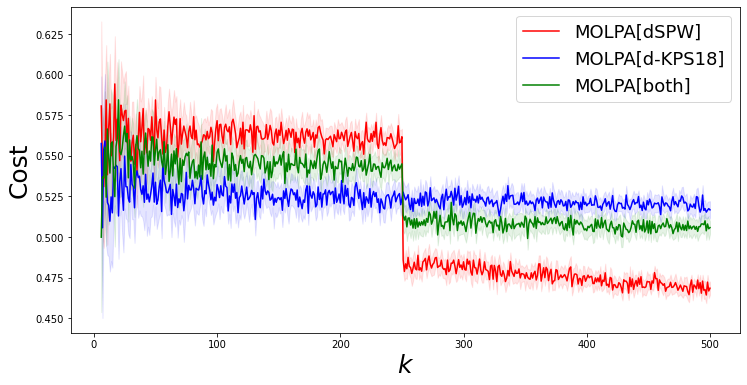

In [109]:
##### plt.rcParams["figure.figsize"] = (12,6)


avg_sol = np.mean(sol_vals, axis=1)
avg_min = np.mean(min_vals, axis=1)
ci_sol = 1.96 * np.std(sol_vals,axis=1)/np.sqrt(repeat)
ci_min = 1.96 * np.std(min_vals,axis=1)/np.sqrt(repeat)

avg_solg = np.mean(solg_vals, axis=1)
avg_ming = np.mean(ming_vals, axis=1)
ci_solg = 1.96 * np.std(solg_vals,axis=1)/np.sqrt(repeat)
ci_ming = 1.96 * np.std(ming_vals,axis=1)/np.sqrt(repeat)

avg_solm = np.mean(solm_vals, axis=1)
avg_minm = np.mean(minm_vals, axis=1)
ci_solm = 1.96 * np.std(solm_vals,axis=1)/np.sqrt(repeat)
ci_minm = 1.96 * np.std(minm_vals,axis=1)/np.sqrt(repeat)


#### Epoch 2

avg_sol_e2= np.mean(sol_vals_e2, axis=1)
ci_sol_e2 = 1.96 * np.std(sol_vals_e2,axis=1)/np.sqrt(repeat)

avg_solg_e2 = np.mean(solg_vals_e2, axis=1)
ci_solg_e2 = 1.96 * np.std(solg_vals_e2,axis=1)/np.sqrt(repeat)

avg_solm_e2 = np.mean(solm_vals_e2, axis=1)
ci_solm_e2 = 1.96 * np.std(solm_vals_e2,axis=1)/np.sqrt(repeat)

plt.clf()


# plt.boxplot(r_ratio.transpose());

positions = k_list #np.arange(1, len(k_list)+1)


## Epoch 1
s1 = 5
e1 = 250
# plt.plot(positions[s1:e1], avg_sol[s1:e1], label="MOLPA[dSPW]", color='r')
# plt.fill_between(positions[s1:e1], (avg_sol[s1:e1]-ci_sol[s1:e1]), (avg_sol[s1:e1]+ci_sol[s1:e1]), color='r', alpha=.1)

# plt.plot(positions[s1:e1], avg_solg[s1:e1], label="MOLPA[d-KPS18]", color='b')
# plt.fill_between(positions[s1:e1], (avg_solg[s1:e1]-ci_solg[s1:e1]), (avg_solg[s1:e1]+ci_solg[s1:e1]), color='b', alpha=.1)

# plt.plot(positions[s1:e1], avg_solm[s1:e1], label="MOLPA[both]", color='g')
# plt.fill_between(positions[s1:e1], (avg_solm[s1:e1]-ci_solm[s1:e1]), (avg_solm[s1:e1]+ci_solm[s1:e1]), color='g', alpha=.1)

# plt.show()

## Epoch 2
s2 = 250
e2 = 501
# plt.plot(positions[s2:e2], avg_sol_e2[s2:e2], label="MOLPA[dSPW]", color='r')
# plt.fill_between(positions[s2:e2], (avg_sol_e2[s2:e2]-ci_sol_e2[s2:e2]), (avg_sol_e2[s2:e2]+ci_sol_e2[s2:e2]), color='r', alpha=.1)

# plt.plot(positions[s2:e2], avg_solg_e2[s2:e2], label="MOLPA[d-KPS18]", color='b')
# plt.fill_between(positions[s2:e2], (avg_solg_e2[s2:e2]-ci_solg_e2[s2:e2]), (avg_solg_e2[s2:e2]+ci_solg_e2[s2:e2]), color='b', alpha=.1)

# plt.plot(positions[s2:e2], avg_solm_e2[s2:e2], label="MOLPA[both]", color='g')
# plt.fill_between(positions[s2:e2], (avg_solm_e2[s2:e2]-ci_solm_e2[s2:e2]), (avg_solm_e2[s2:e2]+ci_solm_e2[s2:e2]), color='g', alpha=.1)

# plt.show()

## Mixed case

plt.plot(positions[s1:e2], np.concatenate([avg_sol[s1:e1], avg_sol_e2[s2:e2]]), label="MOLPA[dSPW]", color='r')
plt.fill_between(positions[s1:e2], np.concatenate([avg_sol[s1:e1]-ci_sol[s1:e1],avg_sol_e2[s2:e2]-ci_sol_e2[s2:e2]]),
                                           np.concatenate([avg_sol[s1:e1]+ci_sol[s1:e1], avg_sol_e2[s2:e2]+ci_sol_e2[s2:e2]]), color='r', alpha=.1)

plt.plot(positions[s1:e2], np.concatenate([avg_solg[s1:e1], avg_solg_e2[s2:e2]]), label="MOLPA[d-KPS18]", color='b')
plt.fill_between(positions[s1:e2],np.concatenate([avg_solg[s1:e1]-ci_solg[s1:e1], avg_solg_e2[s2:e2]-ci_solg_e2[s2:e2]]),
                 np.concatenate([avg_solg[s1:e1]+ci_solg[s1:e1], avg_solg_e2[s2:e2]+ci_solg_e2[s2:e2]]), color='b', alpha=.1)

plt.plot(positions[s1:e2], np.concatenate([avg_solm[s1:e1], avg_solm_e2[s2:e2]]), label="MOLPA[both]", color='g')
plt.fill_between(positions[s1:e2], np.concatenate([avg_solm[s1:e1]-ci_solm[s1:e1], avg_solm_e2[s2:e2]-ci_solm_e2[s2:e2]]),
                 np.concatenate([avg_solm[s1:e1]+ci_solm[s1:e1], avg_solm_e2[s2:e2]+ci_solm_e2[s2:e2]]), color='g', alpha=.1)


# plt.plot(positions, avg_min, label="Min.", color='b')
# plt.fill_between(positions, (avg_min-ci_min), (avg_min+ci_min), color='b', alpha=.1)

# plt.plot(positions, avg_min + epsilon, label="Min. + $\epsilon$", color='gold')
# plt.fill_between(positions, (avg_min+epsilon-ci_min), (avg_min+epsilon+ci_min), color='gold', alpha=.1)

# plt.plot(positions, avg_ming + epsilon, label="Min. + $\epsilon$", color='gold')
# plt.fill_between(positions, (avg_min+epsilon-ci_min), (avg_min+epsilon+ci_min), color='gold', alpha=.1)

# formated_list = [elem for elem in k_list ]
# plt.xticks(positions, formated_list);
# plt.xticks(rotation=45);
plt.xlabel("$k$", fontsize=25)
plt.ylabel("Cost", fontsize=25)
plt.legend(loc='upper right', fontsize=18)
plt.savefig("plots/molpa2.pdf", bbox_inches='tight')

# Data Center formated plot [Neurips 2021]

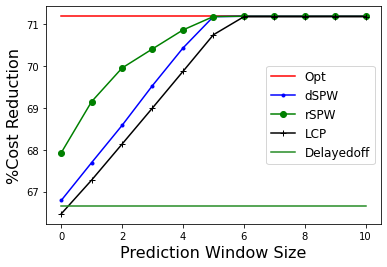

In [31]:
from numpy import genfromtxt
data = genfromtxt('data/datacenter.csv', delimiter=',')
x = data[0,1:]
opt = data[1,1:]
dSPW = data[2,1:]
rSPW = data[3,1:]
LCP = data[4,1:]
Delayedoff = data[5,1:]

plt.rcParams["figure.figsize"] = (6,4)


plt.plot(x, opt, label="Opt", color='r')
plt.plot(x, dSPW, label="dSPW", color='b', marker=".")
plt.plot(x, rSPW, label="rSPW", color='g', marker="o")
plt.plot(x, LCP, label="LCP", color='k', marker="+")
plt.plot(x, Delayedoff, label="Delayedoff", color='forestgreen')

plt.xlabel("Prediction Window Size", fontsize=16)
plt.ylabel("%Cost Reduction", fontsize=16)
plt.legend(fontsize=12)
plt.savefig("plots/olpa-all.pdf", bbox_inches='tight')


plt.savefig("plots/datacenter.pdf", bbox_inches='tight')

# Experiment 5: Comparison against Google

In [57]:
reload(a); reload(a_g); reload(i)
B = 20
w_list = np.linspace(0,0.999,10)
repeat = 10000
std = 50

alg_ratio = np.zeros((len(w_list), repeat))
alg_ratio_dim = np.zeros((len(w_list), repeat))

rand_ratio = np.zeros((len(w_list), repeat))
rand_ratio_dim = np.zeros((len(w_list), repeat))

google_ratio = np.zeros((len(w_list), repeat))
google_r_ratio = np.zeros((len(w_list), repeat))

t1 = time.time()
t_ = t1
for idx,w in enumerate(w_list):
    print("🔴 w = %-.2f 🕑 %-4.2fs      +%-4.2fs"%(w, time.time()-t1, time.time()-t_))
    for j in np.arange(repeat):
        ins = i.Instance(B=B, time_dependant=True, predictor_std= std)
#         ins = i.Instance(B=B, time_dependant=True, time_dim_func = True, dist="p")
        alg_d = a.DPOA(ins, w=w)
        rand_d = a.RPOA(ins, w=w)
        google =a_g.DPOA_google(ins,w)
        g_rand = a_g.RPOA_google(ins,w)
        
        ins.time_dependant = False
        alg = a.DPOA(ins, w=w)
        rand = a.RPOA(ins, w=w)

        opt = a.OPT(ins)
        
        alg_ratio[idx, j] = alg/opt
        alg_ratio_dim[idx,j] = alg_d/opt
        rand_ratio[idx,j] = rand/opt
        rand_ratio_dim[idx,j] = rand_d/opt
        
        google_ratio[idx, j] = google/opt
        google_r_ratio[idx, j] = g_rand/opt
        
        
print("Completed in %-4.2fs "%(time.time()-t1))

🔴 w = 0.00 🕑 0.00s      +0.00s
🔴 w = 0.11 🕑 5.25s      +5.25s
🔴 w = 0.22 🕑 10.10s      +10.10s
🔴 w = 0.33 🕑 14.53s      +14.53s
🔴 w = 0.44 🕑 18.54s      +18.54s
🔴 w = 0.56 🕑 22.14s      +22.14s
🔴 w = 0.67 🕑 25.26s      +25.26s
🔴 w = 0.78 🕑 27.99s      +27.99s
🔴 w = 0.89 🕑 30.35s      +30.35s
🔴 w = 1.00 🕑 32.46s      +32.46s
Completed in 34.45s 


In [119]:
# np.savez("data/algs-google-omega_std=90",
# alg_ratio = alg_ratio,
# alg_ratio_dim = alg_ratio_dim,
# rand_ratio = rand_ratio,
# rand_ratio_dim = rand_ratio_dim,
# google_ratio = google_ratio,
# google_r_ratio = google_r_ratio)

In [42]:
# f = np.load("data/algs-google-omega_std=10.npz")
# alg_ratio = f["alg_ratio"]
# alg_ratio_dim = f["alg_ratio_dim"]
# rand_ratio = f["rand_ratio"]
# rand_ratio_dim = f["rand_ratio_dim"]
# google_ratio = f["google_ratio"]
# google_r_ratio = f["google_r_ratio"]
# w_list = np.linspace(0,0.999,100)


Text(0, 0.5, 'Competitive Ratio')

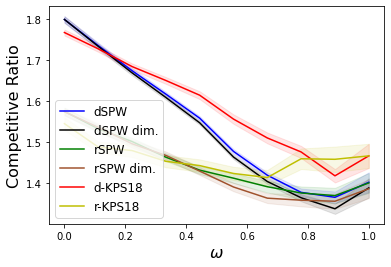

In [58]:

avg_ratio = np.mean(alg_ratio, axis=1)
ci = 1.96 * np.std(alg_ratio,axis=1)/np.sqrt(repeat)
avg_ratio_dim = np.mean(alg_ratio_dim, axis=1)
ci_dim = 1.96 * np.std(alg_ratio_dim,axis=1)/np.sqrt(repeat)

avg_r_ratio = np.mean(rand_ratio, axis=1)
ci_r = 1.96 * np.std(rand_ratio,axis=1)/np.sqrt(repeat)
avg_r_ratio_dim = np.mean(rand_ratio_dim, axis=1)
ci_r_dim = 1.96 * np.std(rand_ratio_dim,axis=1)/np.sqrt(repeat)

avg_ratio_g = np.mean(google_ratio, axis=1)
ci_g = 1.96 * np.std(google_ratio,axis=1)/np.sqrt(repeat)
avg_ratio_gr = np.mean(google_r_ratio, axis=1)
ci_gr = 1.96 * np.std(google_r_ratio,axis=1)/np.sqrt(repeat)

plt.clf()
# plt.boxplot(alg_ratio.transpose(), "DPOA")
# plt.boxplot(google_ratio.transpose(), "Google");

positions = w_list #np.arange(1, len(w_list)+1)

plt.plot(positions, avg_ratio, label="dSPW", color='b')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='b', alpha=.1)

plt.plot(positions, avg_ratio_dim, label="dSPW dim.", color='k')
plt.fill_between(positions, (avg_ratio_dim-ci_dim), (avg_ratio_dim+ci_dim), color='k', alpha=.1)

plt.plot(positions, avg_r_ratio, label="rSPW", color='g')
plt.fill_between(positions, (avg_r_ratio-ci_r), (avg_r_ratio+ci_r), color='g', alpha=.1)

plt.plot(positions, avg_r_ratio_dim, label="rSPW dim.", color='sienna')
plt.fill_between(positions, (avg_r_ratio_dim-ci_r_dim), (avg_r_ratio_dim+ci_r_dim), color='sienna', alpha=.1)

plt.plot(positions, avg_ratio_g, label="d-KPS18", color='r')
plt.fill_between(positions, (avg_ratio_g-ci_g), (avg_ratio_g+ci_g), color='r', alpha=.1)

plt.plot(positions, avg_ratio_gr, label="r-KPS18", color='y')
plt.fill_between(positions, (avg_ratio_gr-ci_gr), (avg_ratio_gr+ci_gr), color='y', alpha=.1)


# formated_list = ['%.2f' % elem for elem in w_list ]
# plt.xticks(positions, formated_list);

plt.legend(loc='lower left', fontsize=12)
plt.xlabel("$\omega$", fontsize=16)
plt.ylabel("Competitive Ratio", fontsize=16)
# plt.savefig("plots/compare-omega.pdf", bbox_inches='tight')
# plt.savefig("plots/google-omega.pdf", bbox_inches='tight')


### Against $\sigma$

In [67]:
reload(a); reload(a_g); reload(i)
w=0.5
repeat = 10000
std_list = np.arange(0,100,1)

alg_ratio = np.zeros((len(std_list), repeat))
alg_ratio_dim = np.zeros((len(std_list), repeat))
rand_ratio = np.zeros((len(std_list), repeat))
rand_ratio_dim = np.zeros((len(std_list), repeat))
google_ratio = np.zeros((len(std_list), repeat))
google_r_ratio = np.zeros((len(std_list), repeat))

t1 = time.time()
t_ = t1
for idx,std in enumerate(std_list):
    print("🔴 std = %-2d 🕑 %4.2fs      +%-4.2fs"%(std, time.time()-t1, time.time()-t_))
    for j in np.arange(repeat):
        ins = i.Instance(B=B, time_dependant=True, predictor_std= std)
        alg_d = a.DPOA(ins, w=w)
        rand_d = a.RPOA(ins, w=w)
        
        ins.time_dependant = False
        alg = a.DPOA(ins, w=w)
        rand = a.RPOA(ins, w=w)
        google =a_g.DPOA_google(ins,w)
        g_rand = a_g.RPOA_google(ins,w)
        opt = a.OPT(ins)
        
        alg_ratio[idx, j] = alg/opt
        alg_ratio_dim[idx,j] = alg_d/opt
        rand_ratio[idx,j] = rand/opt
        rand_ratio_dim[idx,j] = rand_d/opt
        
        google_ratio[idx, j] = google/opt
        google_r_ratio[idx, j] = g_rand/opt
print("Completed in %-4.2fs "%(time.time()-t1))


🔴 w = 0  🕑 0.00s      +0.00s
🔴 w = 1  🕑 2.67s      +2.67s
🔴 w = 2  🕑 5.80s      +5.80s
🔴 w = 3  🕑 8.89s      +8.89s
🔴 w = 4  🕑 11.99s      +11.99s
🔴 w = 5  🕑 15.14s      +15.14s
🔴 w = 6  🕑 18.24s      +18.24s
🔴 w = 7  🕑 21.36s      +21.36s
🔴 w = 8  🕑 24.50s      +24.50s
🔴 w = 9  🕑 27.58s      +27.58s
🔴 w = 10 🕑 30.63s      +30.63s
🔴 w = 11 🕑 33.70s      +33.70s
🔴 w = 12 🕑 36.75s      +36.75s
🔴 w = 13 🕑 39.82s      +39.82s
🔴 w = 14 🕑 42.88s      +42.88s
🔴 w = 15 🕑 45.93s      +45.93s
🔴 w = 16 🕑 49.00s      +49.00s
🔴 w = 17 🕑 52.07s      +52.07s
🔴 w = 18 🕑 55.11s      +55.11s
🔴 w = 19 🕑 58.16s      +58.16s
🔴 w = 20 🕑 61.20s      +61.20s
🔴 w = 21 🕑 64.21s      +64.21s
🔴 w = 22 🕑 67.27s      +67.27s
🔴 w = 23 🕑 70.34s      +70.34s
🔴 w = 24 🕑 73.41s      +73.41s
🔴 w = 25 🕑 76.51s      +76.51s
🔴 w = 26 🕑 79.59s      +79.59s
🔴 w = 27 🕑 82.78s      +82.78s
🔴 w = 28 🕑 85.96s      +85.96s
🔴 w = 29 🕑 89.04s      +89.04s
🔴 w = 30 🕑 92.11s      +92.11s
🔴 w = 31 🕑 95.17s      +95.17s
🔴 w = 32 🕑 98.16

In [68]:
# np.savez("data/algs-google-sigma",
# alg_ratio = alg_ratio,
# alg_ratio_dim = alg_ratio_dim,
# rand_ratio = rand_ratio,
# rand_ratio_dim = rand_ratio_dim,
# google_ratio = google_ratio,
# google_r_ratio = google_r_ratio)

In [147]:
f = np.load("data/algs-google-sigma_w=0.5.npz")
alg_ratio = f["alg_ratio"]
alg_ratio_dim = f["alg_ratio_dim"]
rand_ratio = f["rand_ratio"]
rand_ratio_dim = f["rand_ratio_dim"]
google_ratio = f["google_ratio"]
google_r_ratio = f["google_r_ratio"]

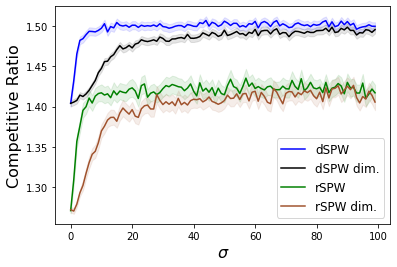

In [149]:
avg_ratio = np.mean(alg_ratio, axis=1)
ci = 1.96 * np.std(alg_ratio,axis=1)/np.sqrt(repeat)
avg_ratio_dim = np.mean(alg_ratio_dim, axis=1)
ci_dim = 1.96 * np.std(alg_ratio_dim,axis=1)/np.sqrt(repeat)

avg_r_ratio = np.mean(rand_ratio, axis=1)
ci_r = 1.96 * np.std(rand_ratio,axis=1)/np.sqrt(repeat)
avg_r_ratio_dim = np.mean(rand_ratio_dim, axis=1)
ci_r_dim = 1.96 * np.std(rand_ratio_dim,axis=1)/np.sqrt(repeat)

avg_ratio_g = np.mean(google_ratio, axis=1)
ci_g = 1.96 * np.std(google_ratio,axis=1)/np.sqrt(repeat)
avg_ratio_gr = np.mean(google_r_ratio, axis=1)
ci_gr = 1.96 * np.std(google_r_ratio,axis=1)/np.sqrt(repeat)

plt.clf()
# plt.boxplot(alg_ratio.transpose(), "DPOA")
# plt.boxplot(google_ratio.transpose(), "Google");

positions = std_list # np.arange(1, len(std_list)+1)
plt.plot(positions, avg_ratio, label="dSPW", color='b')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='b', alpha=.1)

plt.plot(positions, avg_ratio_dim, label="dSPW dim.", color='k')
plt.fill_between(positions, (avg_ratio_dim-ci_dim), (avg_ratio_dim+ci_dim), color='k', alpha=.1)

plt.plot(positions, avg_r_ratio, label="rSPW", color='g')
plt.fill_between(positions, (avg_r_ratio-ci_r), (avg_r_ratio+ci_r), color='g', alpha=.1)

plt.plot(positions, avg_r_ratio_dim, label="rSPW dim.", color='sienna', linestyle="-")
plt.fill_between(positions, (avg_r_ratio_dim-ci_r_dim), (avg_r_ratio_dim+ci_r_dim), color='sienna', alpha=.1)

# plt.plot(positions, avg_ratio_g, label="d-KPS18", color='r')
# plt.fill_between(positions, (avg_ratio_g-ci_g), (avg_ratio_g+ci_g), color='r', alpha=.1)

# plt.plot(positions, avg_ratio_gr, label="r-KPS18", color='y')
# plt.fill_between(positions, (avg_ratio_gr-ci_gr), (avg_ratio_gr+ci_gr), color='y', alpha=.1)


# formated_list = ['%d' % elem for elem in std_list ]
# plt.xticks(positions, formated_list);

plt.legend(loc='lower right', fontsize=12)
plt.xlabel("$\sigma$", fontsize=16)
plt.ylabel("Competitive Ratio", fontsize=16)
plt.savefig("plots/compare-std.pdf", bbox_inches='tight')
# plt.savefig("plots/google-std.pdf", bbox_inches='tight')
